# 使用六种算法对GSE数据集进行分类，并采用PCA、LDA降维技术

## 一、摘要
我的工作主要包括：
- 数据集的格式转化处理、探索性数据分析，通过分析数据集的特征分布、统计指标和相关性等信息，对数据集有了初步了解，并确定了要使用的特征。
- 然后，进行了数据集预处理，主要包括处理缺失值，以确保数据的质量和一致性，为后续的分类任务做好了准备。
- 接着，使用了PCA降维和LDA降维技术，将原始的高维数据转换为低维特征表示。这些降维技术减少了特征的数量，同时保留了数据集中的关键信息，为分类算法的训练和预测提供了更高效的特征表示。
- 在分类算法方面，尝试了多个常见的分类算法，包括KNN、SVM、决策树、朴素贝叶斯、逻辑回归和随机森林。使用了划分数据集、网格搜索、交叉验证等技术对这些算法进行了调参和评估。通过调整参数和评估指标，你找到了最佳模型，并对模型性能进行了评估和可视化。
- 最后综合多个算法分类结果，进行了对比分析，判断出了更为适合的降维方法和分类算法。
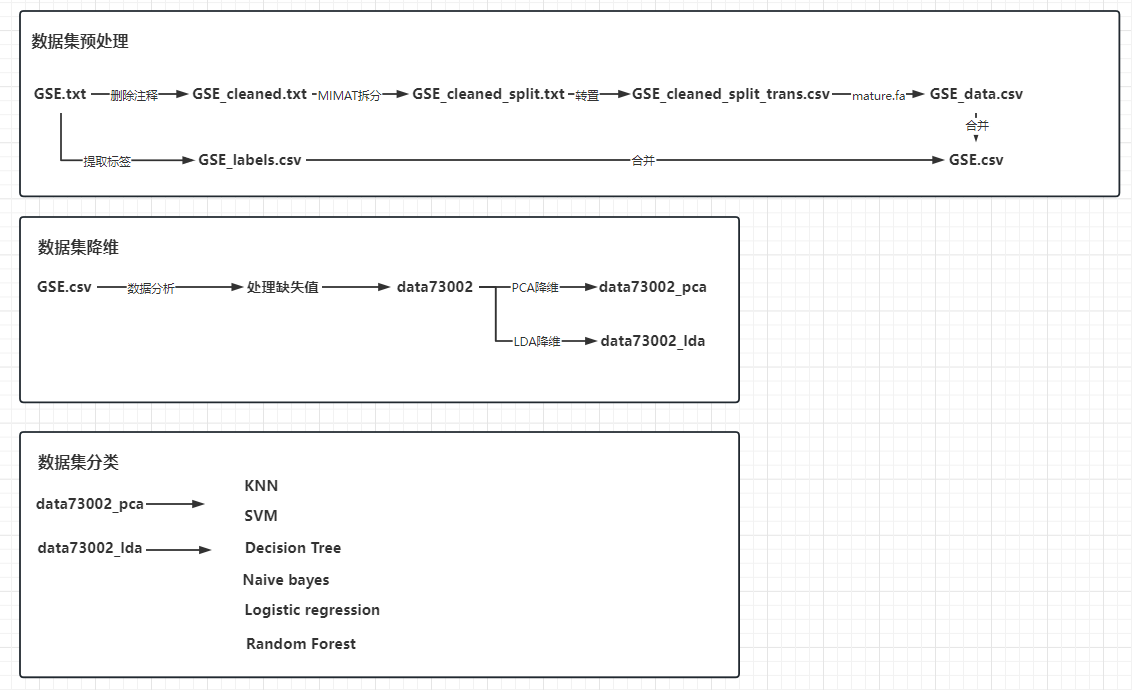
## 二、相关技术

### 2.1 PCA主成分分析

- 概念：
    - PCA(Principal Component Analysis)，即主成分分析方法，是一种使用最广泛的数据降维算法。PCA的主要思想是将n维特征映射到k维上，这k维是全新的正交特征也被称为主成分，是在原有n维特征的基础上重新构造出来的k维特征。PCA的工作就是从原始的空间中顺序地找一组相互正交的坐标轴，新的坐标轴的选择与数据本身是密切相关的。其中，第一个新坐标轴选择是原始数据中方差最大的方向，第二个新坐标轴选取是与第一个坐标轴正交的平面中使得方差最大的，第三个轴是与第1,2个轴正交的平面中方差最大的。依次类推，可以得到n个这样的坐标轴。通过这种方式获得的新的坐标轴，大部分方差都包含在前面k个坐标轴中，后面的坐标轴所含的方差几乎为0。于是可以忽略余下的坐标轴，只保留前面k个含有绝大部分方差的坐标轴。事实上，这相当于只保留包含绝大部分方差的维度特征，而忽略包含方差几乎为0的特征维度，实现对数据特征的降维处理。

- 协方差

    样本均值：$\bar{x}=\frac{1}{n} \sum_{i=1}^{N} x_{i}$

    样本方差：$S^{2}=\frac{1}{n-1} \sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}$

    样本X和样本Y的协方差：$\begin{array}{c}
\operatorname{Cov}(X, Y) = E[(X-E(X))(Y-E(Y))] \\ = \frac{1}{n-1} \sum_{i = 1}^{n}\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)
\end{array}$

    - 方差的计算公式是针对一维特征，即针对同一特征不同样本的取值来进行计算得到；而协方差则必须要求至少满足二维特征；方差是协方差的特殊情况。

    - 方差和协方差的除数是n-1,这是为了得到方差和协方差的无偏估计。

    - 协方差为正时，说明X和Y是正相关关系；协方差为负时，说明X和Y是负相关关系；协方差为0时，说明X和Y是相互独立。Cov(X,X)就是X的方差。当样本是n维数据时，它们的协方差实际上是协方差矩阵(对称方阵)。

### 2.2 LDA线性判别分析
- 概念：
    - LDA（线性判别分析）是一种经典的监督学习算法，用于降低数据维度并提取最有区分性的特征。LDA的目标是通过将样本投影到一个低维空间，使得同类样本尽可能接近，不同类样本尽可能分开。


- 原理：
    - 对于给定的数据集，LDA首先计算每个类别的均值向量（类别均值），用于描述每个类别在原始空间中的中心位置。
    - 接下来，计算类内散布矩阵（Sw），它衡量了每个类别内部样本的离散程度。Sw可以通过计算每个类别样本的协方差矩阵，并将它们相加得到。
    - 计算类间散布矩阵（Sb），它衡量了不同类别样本之间的离散程度。Sb可以通过计算类别均值之间的协方差矩阵得到。
    - 通过解决广义特征值问题（Generalized Eigenvalue Problem），找到Sw逆矩阵与Sb之间的特征向量，这些特征向量对应于最大的特征值。这些特征向量构成了投影矩阵，将数据从高维空间投影到低维空间。
    - 选择前K个最大的特征值对应的特征向量，构成降维后的特征空间。


- 与PCA相比，LDA有一些不同之处：
    - PCA是一种无监督学习算法，而LDA是一种监督学习算法。PCA只关注数据的方差和无关性，而LDA关注数据的类别信息和可分性。
    - PCA通过最大化数据的方差来找到最具代表性的主成分，而LDA通过最大化类间散布矩阵与类内散布矩阵的比值来找到最具判别性的特征向量。
    - PCA不考虑样本的类别信息，只关注整体数据的结构。而LDA则明确考虑了类别信息，并寻求在降维过程中最大化类别之间的差异。
    - PCA的降维结果是与数据的协方差矩阵相关的，而LDA的降维结果是与类别之间的离散程度和类别均值相关的。

## 三、数据集分析与预处理

### 3.1 GEO数据库

GEO数据库指的是Gene Expression Omnibus（GEO）数据库，是一个公共的、基因组学和表达数据的存储库。GEO数据库由美国国立卫生研究院（NIH）的国家生物技术信息中心（NCBI）维护和管理。GEO数据库收集和存储了来自各种生物学实验的高通量基因表达和功能基因组学数据。这些实验可以包括微阵列芯片实验、RNA测序（RNA-Seq）实验、蛋白质组学实验和其他相关的高通量实验。而本次实验便是对 GEO所下载的GSE73002数据集（与乳腺癌相关的基因表达数据集）与GSE137140数据集（与肺癌相关的基因表达数据集）进行分类实验，以探讨基因调控、疾病发生机制和药物治疗等方面的问题。

GEO数据库还提供了一系列的分析工具和资源，用于数据查询、比较分析和可视化。在进行正式实验之前，打算使用GEO2R对数据集进行简单的分析，但是存在运行失败的问题：

- 定义样本组：按照使用要求，先定义测试组(control->non cancer)，然后定义控制组(3组：breast cancer , prostate disease , benign breast disease) ，这样，对数折叠更改方向将遵循与对照组相比。

- 将样本分配给每个组：通过单击表标题对列进行排序后通过将光标拖到连续的样本上或使用 Ctrl 或 Shift 键，可以突出显示多行。 突出显示相关样本后，单击组名称以将这些样本分配给组。对每组重复此操作，得到分组结果如下：

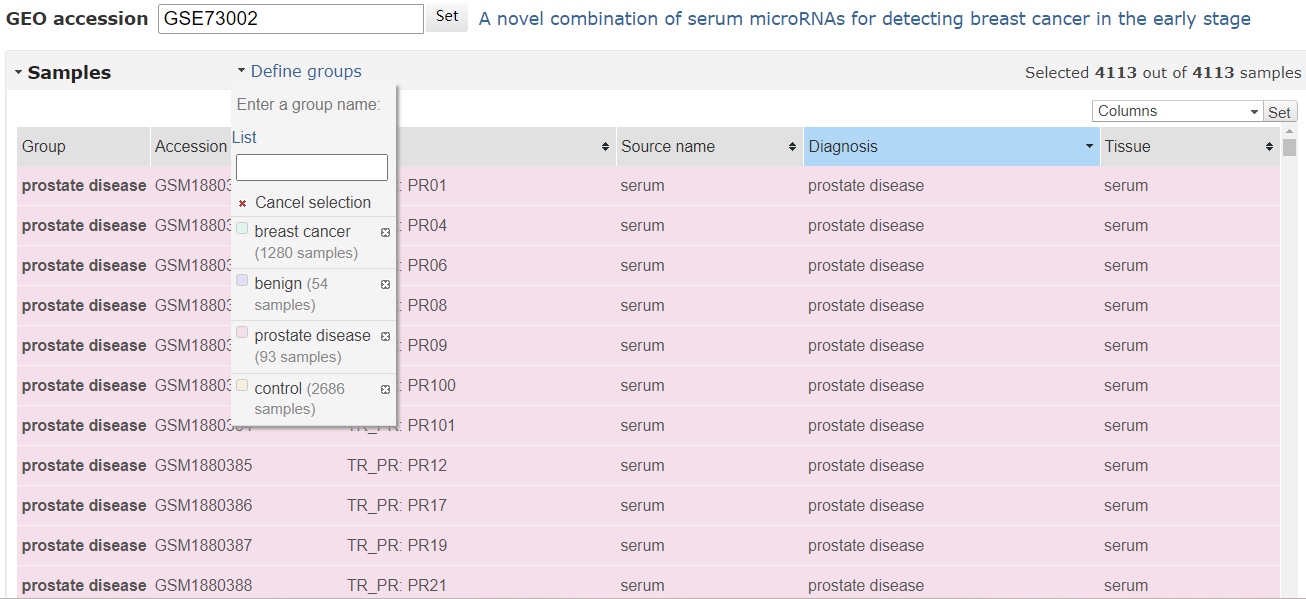

- 执行分析：将样本分配给组后，单击分析按钮并使用默认参数运行分析，但是出现了GEO2R 分析会失败的情况。<mark>由于GEO2R目前对作业处理施加了 10 分钟的截止时间，而10分钟内便报错了，所以应当不是因为样本过大分析无法完成。经查阅可能是因为输入数据的某些方面与GEOquery、limma 或 DESeq2 软件包不兼容。</mark>

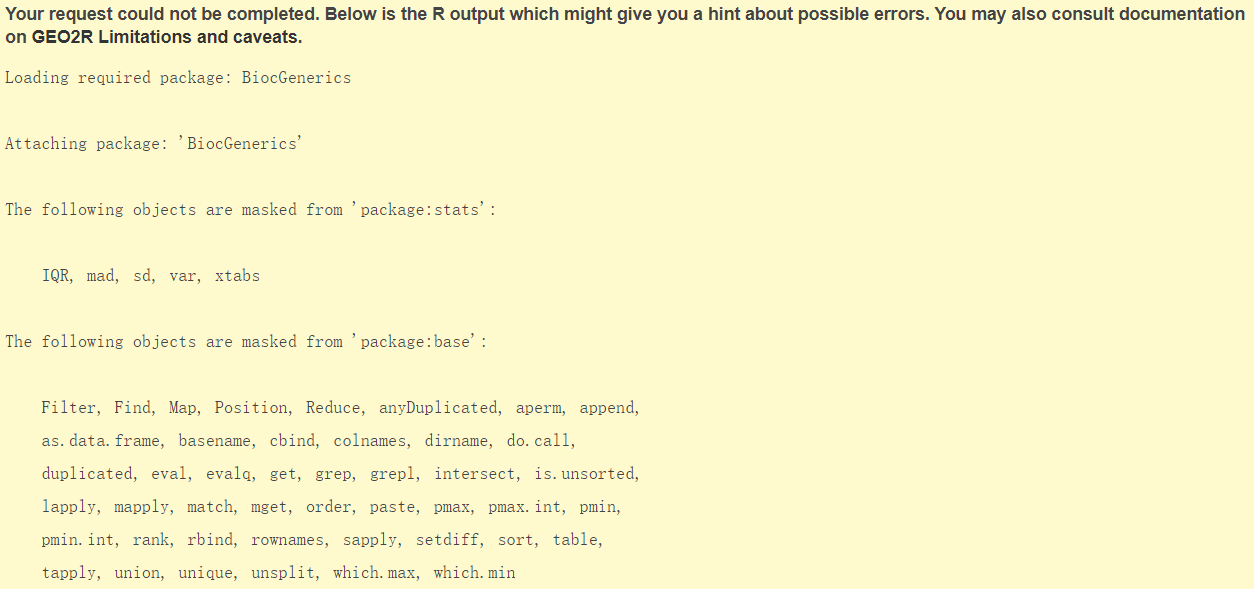

### 3.2 GSE73002数据集

#### 3.2.1 数据集介绍

- 数据集背景和来源：GSE73002数据集研究目的是在早期检测乳腺癌方面探索使用血清中的微小RNA（miRNA）的潜在价值。数据集的来源是日本的国立癌症中心生物库，包含了来自乳腺癌患者、非癌症对照组和其他类型癌症或良性疾病患者的血清样本。

- 数据集描述和特征：GSE73002数据集采用了非编码RNA芯片技术对miRNA进行分析。数据集包含了1280个乳腺癌患者的血清样本，以及来自非癌症对照组、其他癌症和良性疾病组的血清样本。研究通过高灵敏度的微阵列分析对血清miRNA的表达谱进行了全面评估，并鉴定出了一个由五个miRNA（miR-1246、miR-1307-3p、miR-4634、miR-6861-5p和miR-6875-5p）组成的组合，用于乳腺癌的检测。

- 数据集的目标和应用：该数据集的研究目标是探索早期检测乳腺癌的方法，并鉴定出可用于乳腺癌检测的miRNA组合。该数据集可用于乳腺癌的早期诊断和筛查研究。

- 数据质量和预处理：数据集中的血清miRNA表达数据经过高灵敏度的微阵列分析得到。数据集中的血清样本数量较大，涵盖了多个疾病类型和非癌症对照组，具有一定的代表性和可靠性。

- 数据集的可视化和摘要统计：数据集中的具体可视化和摘要统计信息未提供，但可以预期，该数据集可以用于绘制与乳腺癌相关的miRNA表达谱和进行相关统计分析，以揭示miRNA在乳腺癌中的作用和潜在机制。

In [3]:
import pandas as pd
import re
import csv
import matplotlib.pyplot as plt
import seaborn as sns

#### 3.2.2 格式预处理

- 删除GSE73002_series_matrix.txt中不需要的注解信息：该步骤的目的是去除GSE73002_series_matrix.txt中的注解信息，并将删除注解后的数据写入新文件GSE73002_cleaned.txt中，这样在后续的数据处理中不会受到无用信息的干扰。

In [4]:
# 1.删除GSE73002_series_matrix.txt中不需要的注解信息
with open('Data/GSE73002_series_matrix.txt', 'r') as file:
    content = file.readlines()
new_content = [] # 创建一个空的列表，用于存储删除注解信息后的行数据
# 遍历文件内容的每一行
for line in content:
    line = line.strip() # 去除行首尾的空白字符
    # 检查行是否以"!"开头，或者是否为空行
    if not line.startswith('!') and line != '':
        new_content.append(line + '\n')
# 将删除注解信息后的数据写入新的文件中
with open('Data/GSE73002_cleaned.txt', 'w') as file:
    file.writelines(new_content)

- "MIMAT0004806, MIMAT0022738, MIMAT0022740", split to three lines keep data：该步骤的目的是将GSE73002_cleaned.txt文件中以逗号分隔的多个值拆分成多行，并保留其他数据，这样使得数据结构更清晰，方便后续的数据分析处理。

In [5]:
# 2."MIMAT0004806, MIMAT0022738, MIMAT0022740", split to three lines keep data
with open('Data/GSE73002_cleaned.txt', 'r') as file:
    content = file.readlines()
new_content = [] # 创建一个空的列表，用于存储拆分后的行数据
# 遍历文件内容的每一行
for line in content:
    # 检查第一列是否包含逗号
    if ',' in line.split('\t')[0]:
        values = line.split('\t')[0].split(',') # 拆分第一列，并创建多行数据
        # 遍历新创建的多行数据，并替换第一列的值
        for value in values:
            new_line = line.replace(line.split('\t')[0], value.strip())
            new_content.append(new_line)
    # 如果第一列不包含逗号，则直接将该行数据添加到列表中
    else:
        new_content.append(line)
# 将拆分后的数据写入新的文件中
with open('Data/GSE73002_cleaned_split.txt', 'w') as file:
    file.writelines(new_content)

- 将Data/GSE73002_split.txt文件转置并转换为.csv文件：该步骤的目的是将GSE73002_split.txt文件转置为以样本为列、miRNA为行的数据格式，并将其保存为.csv文件，这样使得数据结构更清晰，方便后续的数据分析处理。

In [112]:
# 3.将Data/GSE73002_cleaned_split.txt文件转置并转换为.csv文件
with open('Data/GSE73002_cleaned_split.txt', 'r') as file:
    content = file.readlines()
transposed_data = zip(*[line.strip().split('\t') for line in content]) # 转置数据
transposed_data = [[value.strip('"') for value in row] for row in transposed_data] # 去除双引号
# 将转置后的数据保存为 CSV 文件
with open('Data/GSE73002_cleaned_split_trans.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(transposed_data)

- "MIMAT0000062" -> hsa-let-7a-5p via mature.fa：该步骤的目的是将"MIMAT0000062"这样的miRNA ID转换为"hsa-let-7a-5p"这样的miRNA名称，并将转换后的结果保存到新的文件中，这样使得miRNA的命名更易读、易懂，方便后续的数据分析处理。

In [113]:
# 4."MIMAT0000062" -> hsa-let-7a-5p via mature.fa
data = pd.read_csv("Data/GSE73002_cleaned_split_trans.csv")
mapping = {} # 创建一个字典，用于存储特征名称和替换名称的映射关系
with open("Data/mature.fa", "r") as f:
    # 遍历mature.fa文件的每一行
    for line in f:
        # 检查行是否以">"开头
        if line.startswith(">"):
            match = re.match(r">(\S+)\s+(\S+)", line) # 使用正则表达式匹配特征名称和替换名称
            # 如果匹配成功，则将特征名称和替换名称添加到字典中
            if match:
                replacement_name = match.group(1)
                feature_name = match.group(2)
                mapping[feature_name] = replacement_name
data.rename(columns=mapping, inplace=True) # 替换列名
data.to_csv("Data/GSE73002_data.csv", index=False) # 保存替换后的数据为新的CSV文件

- 将!Sample_characteristics_ch1: diagnosis从GSE73002_series_matrix.txt中提取出来：该步骤的目的是从GSE73002_series_matrix.txt文件中提取出所有的诊断标签，并将其保存为一个DataFrame，提取出的诊断标签可以作为后续数据分析的重要信息。

In [114]:
# 5.将!Sample_characteristics_ch1: diagnosis 从GSE73002_series_matrix.txt中提取出来
# 打开GSE73002_series_matrix.txt文件，并读取文件内容
with open('Data/GSE73002_series_matrix.txt', 'r') as file:
    content = file.readlines()
labels = [] # 创建一个空列表，用于存储提取出的标签
# 遍历文件内容，查找包含"diagnosis:"的行，并提取标签
for line in content:
    if line.startswith('!Sample_characteristics_ch1'):
        line = line.strip().split('\t')  # 去除行首尾的空白字符，并按制表符分隔行数据
        for item in line:
            if 'diagnosis: ' in item:
                label = item.replace('diagnosis: ', '')  # 去除标签中的前缀"diagnosis: "
                label = label.strip('"')  # 去除标签中的双引号
                labels.append(label)
df = pd.DataFrame(labels, columns=['diagnosis'])  # 将标签数据转为DataFrame，列名为'diagnosis'
df.to_csv('Data/GSE73002_labels.csv', index=False)  # 保存为.csv文件

- 将GSE73002_data.csv和GSE73002_labels.csv合并为GSE73002.csv：该步骤的目的是向GSE73002_data.csv文件中添加label，以便更便捷地查看、处理数据集。

In [115]:
# 6.将GSE73002_data.csv和GSE73002_labels.csv合并为GSE73002.csv
data = pd.read_csv('Data/GSE73002_data.csv')
labels = pd.read_csv('Data/GSE73002_labels.csv')
data = pd.concat([data, labels], axis=1) # 将数据和标签合并
data.to_csv('Data/GSE73002.csv', index=False) # 保存为.csv文件

#### 3.2.3 数据集分析

1. 数据集的整体结构：了解数据集的总体大小，包含多少个样本和特征，数据集的维度是多少。

- 分析结果可知：该数据集有4113个样本，2564个特征(包括diagnosis的label)；diagnosis已然成功合并到数据集中。

In [116]:
data = pd.DataFrame(pd.read_csv('Data/GSE73002.csv'))
print(data.shape) # 输出数据的行数和列数
data.head() # 输出数据的前5行

(4113, 2564)


ID_REF  hsa-let-7a-5p  hsa-let-7b-5p  hsa-let-7c-5p  hsa-let-7d-5p  \
0  GSM1876422       3.582417       3.582417       3.582417       3.582417   
1  GSM1876423       2.218250       2.218250       2.218250       2.218250   
2  GSM1876424       3.844989       4.320819       3.844989       5.023958   
3  GSM1876425       4.625125       4.625125       4.625125       4.625125   
4  GSM1876426       5.176016       5.176016       5.176016       5.176016   

   hsa-let-7e-5p  hsa-let-7f-5p  hsa-miR-15a-5p  hsa-miR-16-5p  hsa-miR-17-5p  \
0       3.582417       3.582417        3.582417       3.582417       3.582417   
1       2.218250       2.218250        2.218250       2.218250       2.218250   
2       3.844989       3.844989        5.506825       6.111806       3.844989   
3       4.625125       4.625125        4.625125       4.625125       4.625125   
4       5.176016       5.176016        5.176016       5.176016       5.176016   

   ...  hsa-miR-1199-5p  hsa-miR-1199-3p  hsa-miR-548ba  hsa-miR-7973  \
0  ...         5.235212         3.582417       3.582417      3.582417   
1  ...         5.677817         2.218250       2.218250      2.218250   
2  ...              NaN         3.844989       3.844989      3.844989   
3  ...         4.625125         4.625125       4.625125      4.625125   
4  ...         5.176016         5.176016       5.176016      5.176016   

   hsa-miR-7974  hsa-miR-7975  hsa-miR-7976  hsa-miR-7977  hsa-miR-7978  \
0      3.582417      6.344336      3.582417      7.444098      3.582417   
1      2.218250      7.606908      4.419750      7.980262      2.218250   
2      3.844989      7.987828      4.102383      8.650182      3.844989   
3      4.625125      7.076282      4.625125      8.035574      4.625125   
4      5.176016      8.547952      5.176016      8.663436      5.176016   

       diagnosis  
0  breast cancer  
1  breast cancer  
2  breast cancer  
3  breast cancer  
4  breast cancer  

[5 rows x 2564 columns]

- 特征的类型：确定每个特征的数据类型，包括数值型、类别型、文本型等。这可以帮助我们选择适当的数据处理和分析方法。

- 分析结果可知：数据集的大部分列的数据类型为float64，少数列的数据类型为object。数据集占用约80.5+ MB的内存空间。

In [117]:
data.info() # 输出数据的基本信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4113 entries, 0 to 4112
Columns: 2564 entries, ID_REF to diagnosis
dtypes: float64(2562), object(2)
memory usage: 80.5+ MB


- 是否存在缺失值：检查数据集中是否存在缺失值，并确定缺失值的数量和位置。缺失值对后续的数据分析和建模会产生影响，需要决定如何处理这些缺失值，可以选择删除缺失值、填充缺失值或使用其他方法进行处理。

- 分析结果可知：数据集存在较多缺失值。其中，列名为"ID_REF"和"diagnosis"的列没有缺失值（缺失值数量为0），而其他列中存在一些缺失值，具体数量在结果中给出。通过统计缺失值数量，可以帮助我们了解数据集中的缺失情况，有助于进一步的数据清洗和处理。

In [118]:
missing_values = data.isnull() # 检查缺失值
missing_count = missing_values.sum() # 统计缺失值数量
total_missing_count = missing_count.sum() # 统计所有缺失值的数量
print("缺失值数量：")
print(missing_count) # 输出缺失值数量
print("所有缺失值的数量：")
print(total_missing_count) # 输出缺失值数量

缺失值数量：
ID_REF           0
hsa-let-7a-5p    6
hsa-let-7b-5p    2
hsa-let-7c-5p    4
hsa-let-7d-5p    3
                ..
hsa-miR-7975     0
hsa-miR-7976     0
hsa-miR-7977     1
hsa-miR-7978     1
diagnosis        0
Length: 2564, dtype: int64
所有缺失值的数量：
2866


- 数据分布情况：对于数值型特征，可以通过绘制直方图、箱线图等方式来了解其分布情况，包括均值、方差、偏度、峰度等统计量。这有助于我们理解特征的数据分布情况和异常情况。

- 分析结果可知：根据给出的统计信息，我们可以初步判断数据不存在明显的偏斜，离散程度适中，且数据范围较大。然而，实际的数据分析和建模过程中，还需要进一步考虑其他因素，并结合具体任务和数据集的要求进行更详细的分析和处理。

In [119]:
data.describe() # 输出数据的描述性统计信息

hsa-let-7a-5p  hsa-let-7b-5p  hsa-let-7c-5p  hsa-let-7d-5p  \
count    4107.000000    4111.000000    4109.000000    4110.000000   
mean        2.982836       3.047676       2.923029       2.931046   
std         1.733033       1.698651       1.728830       1.706139   
min        -2.401673      -1.837547      -2.401673      -1.946982   
25%         1.700855       1.790138       1.651352       1.688525   
50%         2.670308       2.759214       2.616794       2.639186   
75%         4.315050       4.291230       4.247631       4.222052   
max         8.839304       9.250530      10.013088       9.762209   

       hsa-let-7e-5p  hsa-let-7f-5p  hsa-miR-15a-5p  hsa-miR-16-5p  \
count    4111.000000    4112.000000     4112.000000    4112.000000   
mean        2.746730       2.735580        2.861549       3.095412   
std         1.625469       1.636813        1.724334       1.880483   
min        -1.946982      -2.401673       -2.401673      -1.946982   
25%         1.550148       1.540619        1.590837       1.698673   
50%         2.459466       2.477585        2.541035       2.738591   
75%         3.930615       3.927764        4.162970       4.498050   
max         8.956988       8.106908       10.459156      11.538740   

       hsa-miR-17-5p  hsa-miR-17-3p  ...  hsa-miR-128-2-5p  hsa-miR-1199-5p  \
count    4110.000000    4109.000000  ...       4112.000000      4109.000000   
mean        3.036343       3.175510  ...         10.646573         5.098375   
std         1.723664       1.795759  ...          0.824113         0.693304   
min        -2.401673      -2.401673  ...          8.799764         1.439285   
25%         1.755874       1.849624  ...         10.025495         4.657885   
50%         2.767658       2.843047  ...         10.531078         5.096362   
75%         4.364296       4.569132  ...         11.233337         5.553564   
max        10.583701       9.651221  ...         13.816141         8.378299   

       hsa-miR-1199-3p  hsa-miR-548ba  hsa-miR-7973  hsa-miR-7974  \
count      4113.000000    4112.000000   4112.000000   4113.000000   
mean          3.685882       2.596067      2.639337      2.940122   
std           1.062602       1.585794      1.552561      1.390357   
min          -0.157776      -2.401673     -1.392469     -0.592881   
25%           2.911839       1.445895      1.494633      1.936565   
50%           3.715752       2.356551      2.375597      2.718464   
75%           4.345904       3.723086      3.738077      3.851501   
max           8.507029       7.811311      7.811311      8.006052   

       hsa-miR-7975  hsa-miR-7976  hsa-miR-7977  hsa-miR-7978  
count   4113.000000   4113.000000   4112.000000   4112.000000  
mean       7.388837      3.107303      7.909863      2.624178  
std        1.381139      1.257828      1.205616      1.585308  
min        3.275145     -0.506098      1.992937     -2.401673  
25%        6.306051      2.255312      7.048564      1.476735  
50%        7.279739      2.901183      7.900124      2.372914  
75%        8.492034      3.866309      8.851742      3.743718  
max       11.080220      8.797356     11.464810      9.501817  

[8 rows x 2562 columns]

- 特征之间的相关性：分析特征之间的相关性，可以使用相关系数矩阵、散点图等方式来展示特征之间的线性或非线性关系。这可以帮助我们了解特征之间的相互作用和重要性，为后续的特征选择或降维提供参考。

- 分析结果可知：许多特征存在高度依赖，如hsa-let-7a-5p与hsa-let-7b-5p的依赖系数高达0.931999。当高维度数据集中存在高度相关的特征时，需要进行特征选择或特征降维的处理，以提高模型的性能和效率，同时降低过拟合的风险。

In [120]:
correlation_matrix = data.corr() # 计算特征之间的相关性
print(correlation_matrix) # 输出相关系数矩阵

C:\Users\Admin\AppData\Local\Temp\ipykernel_20508\1525290831.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr() # 计算特征之间的相关性


               hsa-let-7a-5p  hsa-let-7b-5p  hsa-let-7c-5p  hsa-let-7d-5p  \
hsa-let-7a-5p       1.000000       0.931999       0.929974       0.922507   
hsa-let-7b-5p       0.931999       1.000000       0.915912       0.910617   
hsa-let-7c-5p       0.929974       0.915912       1.000000       0.949992   
hsa-let-7d-5p       0.922507       0.910617       0.949992       1.000000   
hsa-let-7e-5p       0.892973       0.868187       0.895815       0.891098   
...                      ...            ...            ...            ...   
hsa-miR-7974        0.803020       0.785824       0.807354       0.805345   
hsa-miR-7975        0.754642       0.747693       0.752694       0.745993   
hsa-miR-7976        0.725236       0.712570       0.740536       0.735555   
hsa-miR-7977        0.713755       0.706260       0.710501       0.705632   
hsa-miR-7978        0.857765       0.836928       0.869342       0.866836   

               hsa-let-7e-5p  hsa-let-7f-5p  hsa-miR-15a-5p  hsa-miR-16-5p 

- diagnosis特征分布：可以直观了解分类结果，以便与之后的分类算法的分类结果进行比较。

- 分析结果可知：non-cancer样本数量约为一半多，其次是breast cancer样本量有1000多，剩余的prostate disease和benign breast disease数量相当。

<Axes: >

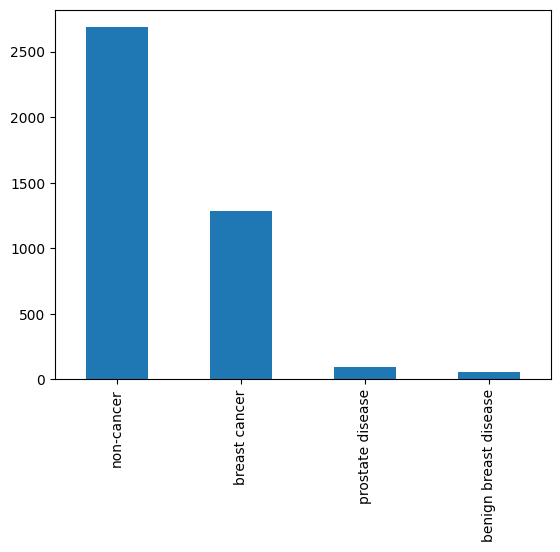

In [121]:
data['diagnosis'].value_counts().plot.bar() # 绘制diagnosis列的柱状图

#### 3.2.4 处理缺失值

1. 首先分析Data/GSE73002_data.csv 数据集每个样本的缺失值分布，并进行可视化分析；

- 分析结果可知：仅有2500左右的样本不含有缺失值。如果将含有缺失值的样本全部删除，会导致样本量减少，影响建模的可靠性和泛化能力。绝大部分样本的缺失值不超过4。对于缺失值数量较少的样本，可以采用填充的方法来处理缺失值。缺失值较多可能会导致样本的信息严重不完整，若对缺失值数量较大的样本进行填充，填充的数据可能存在较大误差。

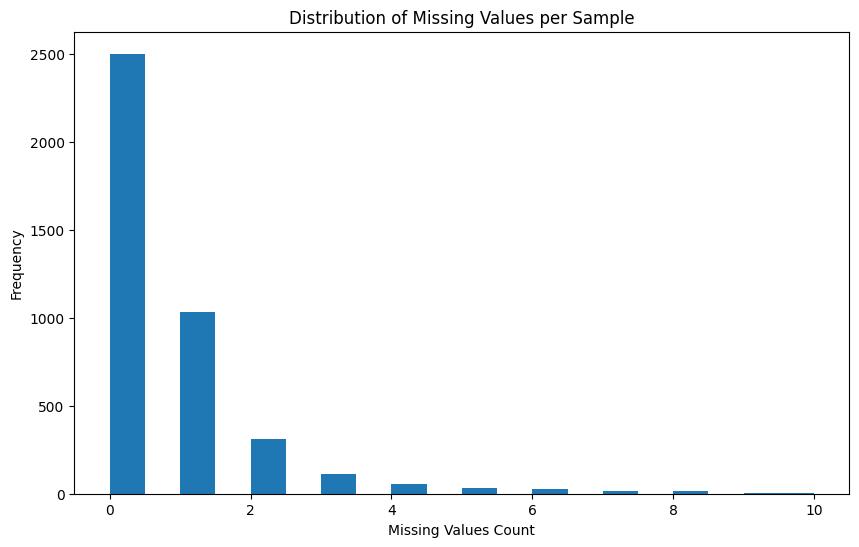

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

data73002 = pd.DataFrame(pd.read_csv('Data/GSE73002.csv'))
missing_values_per_sample = data73002.isnull().sum(axis=1) # 计算每个样本的缺失值数量

# 绘制缺失值数量的直方图
plt.figure(figsize=(10, 6))
plt.hist(missing_values_per_sample, bins=20)
plt.xlabel('Missing Values Count')
plt.ylabel('Frequency')
plt.title('Distribution of Missing Values per Sample')
plt.show()

2. 综合考量，决定<mark>删除Data/GSE73002.csv 数据集含有4个以上缺失值的样本，对于缺失值小于等于4的样本使用均值填充的方法进行填充。</mark>

In [34]:
missing_values_per_sample = data73002.isnull().sum(axis=1) # 计算每个样本的缺失值数量
data73002 = data73002[missing_values_per_sample <= 4] # 删除含有4个以上缺失值的样本

# 使用均值填充缺失值
mean_values = data73002.mean()
data73002 = data73002.fillna(mean_values)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8268\2599763944.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = data73002.mean()


3. 再次输出处理后的缺失值排序数列的，可见缺失值全部都被处理了。同时相较于4113的初始样本数量，处理后的数据集并未减少过多样本。

In [35]:
print(data73002.shape) # 打印处理后的数据集形状
data73002.isnull().sum().sort_values(ascending=False).head() # 检查是否还有缺失值
# data73002.head()

(4011, 2564)


ID_REF             0
hsa-miR-4743-5p    0
hsa-miR-4799-5p    0
hsa-miR-4799-3p    0
hsa-miR-4800-5p    0
dtype: int64

#### 3.2.5 PCA降维
1. 计算协方差矩阵：对预处理后的数据计算协方差矩阵，用于衡量不同特征之间的相关性。

- 需要确保数据集中不存在缺失值。这在上一小节中已经处理完成。

- 需要确保数据集中所有的特征都是数值类型。如果存在非数值类型的列，需要进行数据类型转换。但是在此处直接将唯一的非数值列ID_REF删除，因为其对数据并没有影响。


In [36]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

data73002_X = data73002.drop(['diagnosis'], axis=1) # 将diagnosis列删除
data73002_X = data73002_X.drop(['ID_REF'], axis=1) # 将ID_REF列删除

data73002_y = data73002['diagnosis'] # 将diagnosis列的值作为标签

data73002_X.head() # 输出数据的前5行

hsa-let-7a-5p  hsa-let-7b-5p  hsa-let-7c-5p  hsa-let-7d-5p  hsa-let-7e-5p  \
0       3.582417       3.582417       3.582417       3.582417       3.582417   
1       2.218250       2.218250       2.218250       2.218250       2.218250   
2       3.844989       4.320819       3.844989       5.023958       3.844989   
4       5.176016       5.176016       5.176016       5.176016       5.176016   
5       4.359434       4.359434       4.359434       4.359434       4.359434   

   hsa-let-7f-5p  hsa-miR-15a-5p  hsa-miR-16-5p  hsa-miR-17-5p  hsa-miR-17-3p  \
0       3.582417        3.582417       3.582417       3.582417       3.582417   
1       2.218250        2.218250       2.218250       2.218250       2.963735   
2       3.844989        5.506825       6.111806       3.844989       4.610318   
4       5.176016        5.176016       5.176016       5.176016       5.176016   
5       4.359434        4.359434       4.359434       4.359434       4.359434   

   ...  hsa-miR-128-2-5p  hsa-miR-1199-5p  hsa-miR-1199-3p  hsa-miR-548ba  \
0  ...         12.170751         5.235212         3.582417       3.582417   
1  ...         11.922791         5.677817         2.218250       2.218250   
2  ...         11.277825         5.098955         3.844989       3.844989   
4  ...         11.544950         5.176016         5.176016       5.176016   
5  ...         11.224594         5.209848         4.359434       4.359434   

   hsa-miR-7973  hsa-miR-7974  hsa-miR-7975  hsa-miR-7976  hsa-miR-7977  \
0      3.582417      3.582417      6.344336      3.582417      7.444098   
1      2.218250      2.218250      7.606908      4.419750      7.980262   
2      3.844989      3.844989      7.987828      4.102383      8.650182   
4      5.176016      5.176016      8.547952      5.176016      8.663436   
5      4.359434      4.359434      7.373268      4.359434      8.070585   

   hsa-miR-7978  
0      3.582417  
1      2.218250  
2      3.844989  
4      5.176016  
5      4.359434  

[5 rows x 2562 columns]

在计算协方差矩阵时，通常将数据集的特征放在矩阵的列上。因此，为了使计算正确，需要将数据集的特征部分进行转置，以确保每个特征占据矩阵的一列。这样做可以确保协方差矩阵的计算是基于特征之间的关系，而不是样本之间的关系。

- 分析结果：协方差矩阵对角线上的元素表示每个特征的方差。较大的方差意味着该特征具有更大的数据变化范围，可能包含更多的信息。非对角线上的元素表示两个特征之间的协方差。协方差可以告诉我们两个特征之间的线性关系，正值表示正相关，负值表示负相关。

In [37]:
# 1. 计算协方差矩阵
cov_matrix = np.cov(data73002_X.T) # data73002_X转置后计算协方差矩阵
print("Covariance Matrix:")
print(cov_matrix) # 打印协方差矩阵

variances = np.diag(cov_matrix) # 计算协方差矩阵的对角线元素（方差）
print("\nVariances:")
print(variances) # 打印对角线元素（方差）

Covariance Matrix:
[[2.98729561 2.72787631 2.76700901 ... 1.56632623 1.4886524  2.33876124]
 [2.72787631 2.87769126 2.67685707 ... 1.5094481  1.44573749 2.23816806]
 [2.76700901 2.67685707 2.96555946 ... 1.59761295 1.48099976 2.36392161]
 ...
 [1.56632623 1.5094481  1.59761295 ... 1.57448813 0.83460955 1.68784964]
 [1.4886524  1.44573749 1.48099976 ... 0.83460955 1.45654881 1.22755503]
 [2.33876124 2.23816806 2.36392161 ... 1.68784964 1.22755503 2.49864845]]

Variances:
[2.98729561 2.87769126 2.96555946 ... 1.57448813 1.45654881 2.49864845]


2. 特征值分解：对协方差矩阵进行特征值分解，得到特征值和对应的特征向量。特征值：特征值表示协方差矩阵在相应特征向量方向上的方差。特征值的大小可以衡量数据在相应特征向量方向上的方差程度。较大的特征值意味着该特征向量方向上的方差较大，对数据的解释能力更强。特征向量：特征向量描述了协方差矩阵的线性结构。每个特征向量都对应一个特征值，表示了数据在该方向上的重要性。特征向量定义了新的特征空间的基向量，通过线性组合这些特征向量，可以将数据映射到新的低维空间。

In [38]:
# 2. 计算特征值和特征向量
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix) # 进行特征值分解

# 输出特征值和特征向量
print("特征值：")
print(eigenvalues)
print("\n特征向量: ")
print(eigenvectors)

特征值：
[4.07743652e+03+0.j 9.14734480e+01+0.j 6.24573141e+01+0.j ...
 8.73685730e-03+0.j 8.44284175e-03+0.j 7.66249678e-03+0.j]

特征向量: 
[[-2.40043933e-02+0.j -4.41457777e-05+0.j  5.48169182e-02+0.j ...
  -8.19066685e-04+0.j -1.53962873e-03+0.j  1.56774865e-04+0.j]
 [-2.29834848e-02+0.j -4.89684512e-03+0.j  5.56290879e-02+0.j ...
   1.48706154e-02+0.j -1.27122217e-02+0.j  8.00337761e-03+0.j]
 [-2.42000881e-02+0.j  5.16191888e-04+0.j  5.04117600e-02+0.j ...
  -2.09913492e-02+0.j  1.27906208e-02+0.j  4.78606266e-03+0.j]
 ...
 [-1.73510927e-02+0.j -2.82382543e-02+0.j -2.75292446e-02+0.j ...
   5.82556460e-03+0.j -7.02721384e-03+0.j  5.68791671e-03+0.j]
 [-1.28246243e-02+0.j -1.28214089e-02+0.j  7.21004520e-02+0.j ...
  -5.86241713e-03+0.j -1.31492363e-02+0.j -9.37582331e-03+0.j]
 [-2.42714764e-02+0.j  1.40593676e-02+0.j -6.75131277e-03+0.j ...
   3.94382940e-02+0.j  2.62114176e-02+0.j  2.39405992e-02+0.j]]


3. 选择主成分：根据特征值的大小，选择保留的主成分个数或设定保留的解释方差比例。

- <mark>方差贡献率方法</mark>：可以计算每个主成分的方差贡献率，并将贡献率排序，选择累计贡献率较高的值。观察曲线上的拐点或剧烈下降的点。这些点通常表示主成分数量的一个自然分界。

d:\Program Files\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


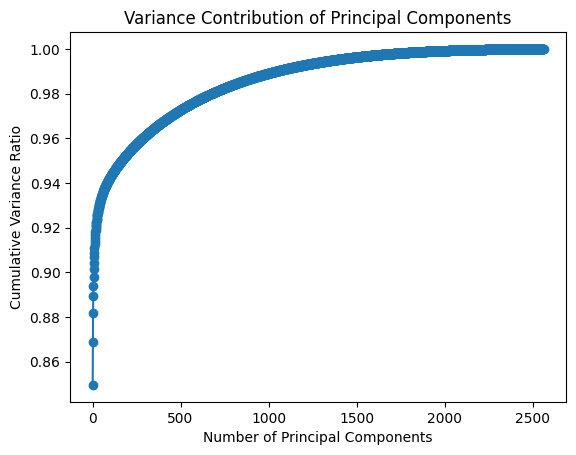

In [39]:
# 3. 计算主成分
total_variance = np.sum(eigenvalues) # 计算总方差

variance_ratio = eigenvalues / total_variance # 计算每个主成分的方差贡献率

sorted_variance_ratio = np.sort(variance_ratio)[::-1] # 按方差贡献率从大到小排序

cumulative_variance_ratio = np.cumsum(sorted_variance_ratio) # 计算累计方差贡献率

# 绘制方差贡献率图
plt.plot(range(1, len(sorted_variance_ratio)+1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Ratio')
plt.title('Variance Contribution of Principal Components')
# plt.xlim(0, 40)  # 设置x轴范围
plt.show()

逐步缩小X轴范围，可以得到以下两张图。
- 分析结果可知：拐点并不清晰明了，为了进一步得出准确的结果，需要结合其方法进一步选择成分数量。

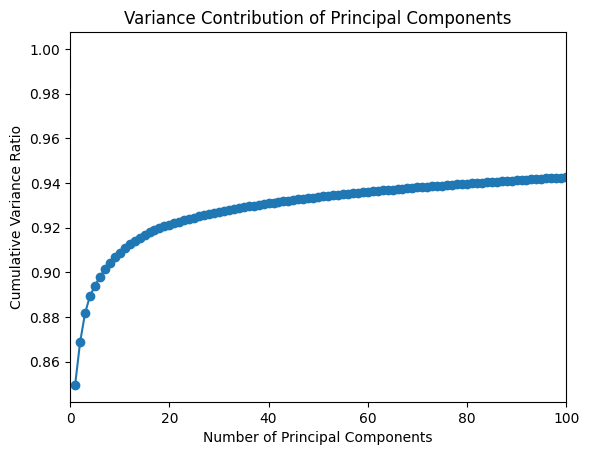

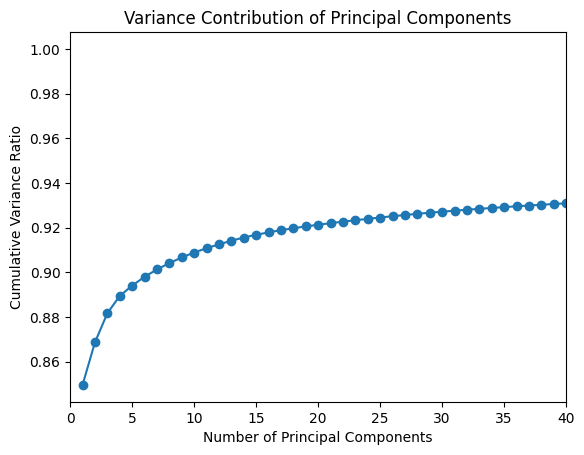

- <mark>Kaiser准则</mark>：保留所有主成分方差大于1的主成分。因为特征值大于1表示该主成分解释的方差大于一个原始变量的方差，意味着该主成分能够提供更多的信息，对数据的解释能力更强。
- 分析结果可知：Kaiser准则推荐选择主成分数量为60，我将采取这个结果进行PCA降维。

In [40]:
# 根据Kaiser准则选择主成分数量
n_components = 0
# 遍历特征值, 如果特征值大于1，则将主成分数量加1
for i in range(len(eigenvalues)):
    if eigenvalues[i] > 1:
        n_components += 1

print("选择的主成分数量为：", n_components)

选择的主成分数量为： 60


4. 降维转换：下面使用进行PCA降维，n_components参数指定了降维后保留的主成分数量为60。

In [41]:
# 4. 使用PCA进行降维
pca = PCA(n_components=60) # 创建PCA对象，并指定要保留的主成分数量为kaiser准则计算所得的61

data73002_pca = pca.fit_transform(data73002_X) # 对数据进行降维

print("Dimension after PCA:", data73002_pca.shape) # 打印降维后的数据维度
data73002_pca = pd.DataFrame(data73002_pca) # 将降维后的数据转换为DataFrame

Dimension after PCA: (4011, 60)


#### 3.2.6 LDA降维

1. 计算类别均值：对于每个类别，计算其样本在每个特征上的均值，得到各个类别的均值向量，以确定数据集中不同类别之间的差异性。

- 在使用LDA进行降维时，需要确保数据集包含类别标签，并根据类别标签进行计算和转换。

In [42]:
# 1.计算类别均值
import numpy as np

data73002_X = data73002.drop(['diagnosis'], axis=1) # 将diagnosis列删除
data73002_X = data73002_X.drop(['ID_REF'], axis=1) # 将ID_REF列删除

data73002_y = data73002['diagnosis'] # 将diagnosis列的值作为标签

class_means = [] # 创建一个空列表，用于存储每个类别的均值向量
classes = np.unique(data73002_y) # 获取所有类别
# 计算每个类别的均值向量
for c in classes:
    class_data = data73002_X[data73002_y == c] # 获取属于当前类别的数据
    class_mean = np.mean(class_data, axis=0) # 计算当前类别的均值向量
    class_means.append(class_mean) # 将均值向量添加到列表中

class_means = np.array(class_means) # 将类别均值向量转换为数组

# 打印每个类别的均值向量
for i, class_mean in enumerate(class_means):
    print("Class", i+1, "mean:", class_mean)

Class 1 mean: [4.67817871 4.55763406 4.46476981 ... 4.19517076 9.07279126 4.13468979]
Class 2 mean: [4.76154686 4.76493602 4.69595374 ... 4.34257019 9.01128351 4.2610349 ]
Class 3 mean: [2.03276882 2.12313956 1.9732429  ... 2.54893718 7.31073467 1.84828115]
Class 4 mean: [4.69059671 4.90251541 4.57733414 ... 1.24173532 9.19721463 1.09822174]


2. 计算类内散布矩阵（within-class scatter matrix）：计算各个类别内部样本的协方差矩阵，然后将这些协方差矩阵加权求和，得到类内散布矩阵。

- 初始化类内散布矩阵Sw为全零矩阵，维度为特征的数量乘以特征的数量。
- 对于每个类别，计算该类别的协方差矩阵，并将其与该类别样本数目相乘，然后累加到类内散布矩阵Sw上。
- 最后得到的类内散布矩阵Sw即为所求。

In [43]:
# 2. 计算类内散布矩阵Sw
Sw = np.zeros((data73002_X.shape[1], data73002_X.shape[1])) # 创建一个空的类内散布矩阵Sw

# 计算类内散布矩阵Sw
for c, class_mean in enumerate(class_means):
    class_data = data73002_X[data73002_y == classes[c]] # 获取属于当前类别的数据
    class_cov = np.cov(class_data.T) # 计算当前类别的协方差矩阵
    class_scatter = class_cov * (class_data.shape[0] - 1) # 计算当前类别的散布矩阵
    Sw += class_scatter # 将当前类别的散布矩阵累加到类内散布矩阵Sw中

# 打印类内散布矩阵Sw
print("Within-class scatter matrix (Sw):")
print(Sw)


Within-class scatter matrix (Sw):
[[5238.11919476 4391.3043899  4390.68171995 ... 2344.22078389
  1721.79494126 3915.96370666]
 [4391.3043899  5175.26758962 4221.41819476 ... 2284.61819793
  1668.19029432 3725.97997034]
 [4390.68171995 4221.41819476 5221.31846664 ... 2478.76116567
  1715.42150367 4034.19308759]
 ...
 [2344.22078389 2284.61819793 2478.76116567 ... 3203.67289077
   926.6226781  2754.81222914]
 [1721.79494126 1668.19029432 1715.42150367 ...  926.6226781
  3159.03894323 1541.62451626]
 [3915.96370666 3725.97997034 4034.19308759 ... 2754.81222914
  1541.62451626 4757.07105911]]


3. 计算类间散布矩阵（between-class scatter matrix）：计算各个类别均值向量之间的差异，并对差异矩阵进行加权求和，得到类间散布矩阵。

- 计算整个数据集的均值向量。
- 初始化类间散布矩阵Sb为全零矩阵，维度为特征的数量乘以特征的数量。
- 对于每个类别，计算该类别的样本数目乘以类别均值向量与整个数据集均值向量之间的乘积，然后累加到类间散布矩阵Sb上。
- 最后得到的类间散布矩阵Sb即为所求。

In [44]:
# 3. 计算类间散布矩阵Sb
import numpy as np

overall_mean = np.mean(data73002_X, axis=0) # 计算总体均值向量

Sb = np.zeros((data73002_X.shape[1], data73002_X.shape[1])) # 创建一个空的类间散布矩阵Sb

# 计算类间散布矩阵Sb
for c, class_mean in enumerate(class_means):
    n = data73002_X[data73002_y == classes[c]].shape[0] # 获取属于当前类别的样本数量
    mean_diff = class_mean - overall_mean # 计算当前类别的均值向量与总体均值向量的差
    class_scatter = n * np.outer(mean_diff, mean_diff.T) # 计算当前类别的散布矩阵
    Sb += class_scatter # 将当前类别的散布矩阵累加到类间散布矩阵Sb中

# 打印类间散布矩阵Sb
print("Between-class scatter matrix (Sb):")
print(Sb)

Between-class scatter matrix (Sb):
[[6740.93620251 6547.47962185 6705.02440147 ... 3936.74740523
  4247.70117828 5462.46885863]
 [6547.47962185 6364.27434786 6512.77866831 ... 3768.26867108
  4129.21702394 5249.07393887]
 [6705.02440147 6512.77866831 6670.57496196 ... 3927.66677387
  4223.38753962 5445.13254858]
 ...
 [3936.74740523 3768.26867108 3927.66677387 ... 3110.02451722
  2420.16163741 4013.46484445]
 [4247.70117828 4129.21702394 4223.38753962 ... 2420.16163741
  2681.72179742 3380.87115666]
 [5462.46885863 5249.07393887 5445.13254858 ... 4013.46484445
  3380.87115666 5262.50923187]]


4. 计算特征值和特征向量：对于类内散布矩阵和类间散布矩阵，进行特征值分解，得到特征值和相应的特征向量。
- 分析结果可知：<mark>除了non-cancer外的类别的样本数量太少，导致了协方差矩阵计算失败。因为特征维度超过样本数量时，类内散布矩阵Sw会变为奇异矩阵，无法求逆。</mark>

    所以下面将避开计算协方差矩阵，转而用方差贡献率来选定主成分。

In [134]:
# 4. 计算Sw-1*Sb的特征值和特征向量
# eigenvalues, eigenvectors = np.linalg.eig(np.dot(np.linalg.inv(Sw), Sb))

运行上述第四步的代码，将会得到如下报错：

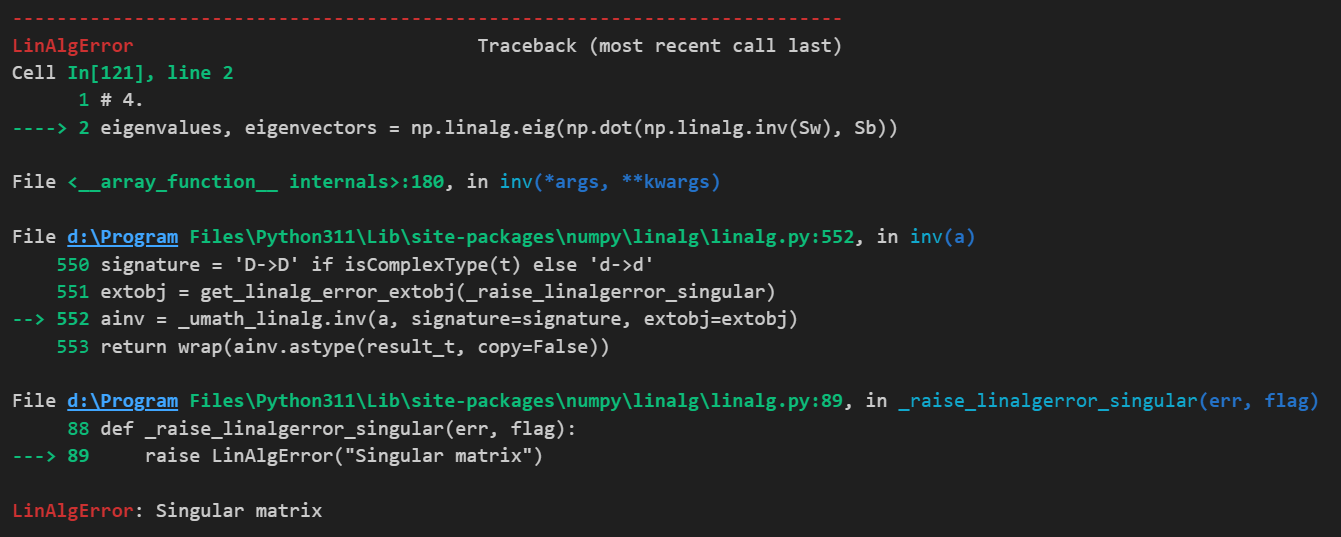

进行数据集的特征删除和标准化，并保留所有的主成分进行LDA降维。将n_components参数设置为None表示不指定降维后的特征维度数量，即不限制降维后的维度数量，获取所有可能的主成分，从而获得完整的LDA变换结果。

- 在LDA算法中，需要使用数值型的类别标签作为输入。

- 对数据进行标准化以消除不同特征之间的量纲差异，使得它们具有相似的尺度。这是因为LDA是基于协方差矩阵的算法，如果特征具有不同的尺度，可能会对结果产生偏差。通过标准化，可以确保每个特征的均值为0，方差为1，使得它们在相同的尺度上进行比较，更好地适应LDA算法的要求。

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 1. 数据集特征删除与标准化
X = data73002.drop(['diagnosis', 'ID_REF'], axis=1) # 将diagnosis列和ID_REF列删除
y = data73002['diagnosis'] # 将diagnosis列的值作为标签

le = LabelEncoder() # 创建LabelEncoder对象
y = le.fit_transform(y) # 将标签编码为整数

scaler = StandardScaler() # 创建StandardScaler对象
X = scaler.fit_transform(X) # 对数据进行标准化

lda = LDA(n_components=None) # 创建LDA对象
X_lda = lda.fit_transform(X, y) # 对数据进行降维
print(X_lda.shape)

(4011, 3)


- 方差贡献率：通过累积方差贡献率确定要保留的主成分数量，使其达到或超过0.9。

In [46]:
# 2. 计算方差贡献率
explained_variance_ratio = lda.explained_variance_ratio_ # 获取每个主成分的方差贡献率
cumulative_variance_ratio = np.cumsum(explained_variance_ratio) # 计算累计方差贡献率

num_components = np.sum(cumulative_variance_ratio >= 0.9) + 1  # 计算保留90%方差所需的主成分数量，将结果加1以解释Python的0索引

- 可视化方差贡献率图像

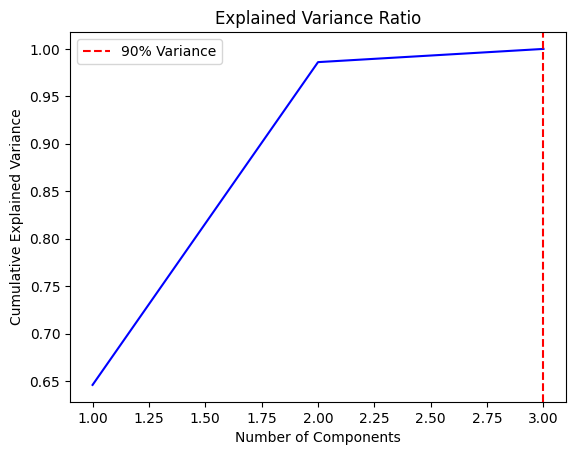

Number of components to retain 90% variance: 3


In [47]:
# 3. 可视化方差贡献率
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, 'b-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.axvline(x=num_components, color='r', linestyle='--', label='90% Variance')
plt.legend()
plt.show()

print(f"Number of components to retain 90% variance: {num_components}")

- LDA降维：根据方差贡献率的结果，主成分设置为3进行LDA降维。

In [48]:
# 4. 使用LDA进行降维
lda = LDA(n_components=3) # 创建LDA对象
lda.fit(X, y) # 对数据进行降维
X_lda = lda.transform(X) # 对数据进行降维

data73002_lda = pd.DataFrame(X_lda) # 将降维后的数据转换为DataFrame
print("Dimension after LDA:", data73002_lda.shape) # 打印降维后的数据维度

Dimension after LDA: (4011, 3)


- 结果可视化：对LDA降维结果进行可视化

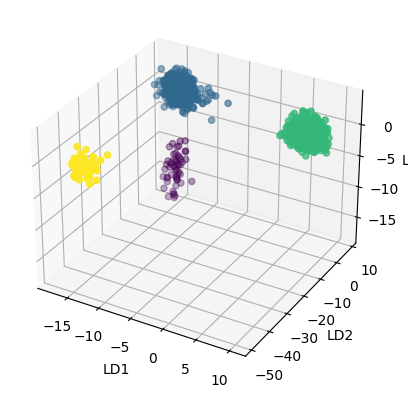

In [49]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 5. 结果可视化
fig = plt.figure() # 创建一个空白的3D图像对象
ax = fig.add_subplot(111, projection='3d') # 将3D图像对象添加到画布上

ax.scatter(X_lda[:, 0], X_lda[:, 1], X_lda[:, 2], c=y) # 绘制散点图

# 设置坐标轴标签
ax.set_xlabel('LD1')
ax.set_ylabel('LD2')
ax.set_zlabel('LD3')

plt.show()

### 3.3 GSE137140数据集

<mark>由于操作与GSE73002数据集类似，不再赘述同样的操作，只强调存在差异的地方。</mark>

#### 3.3.1 数据集介绍

- 数据集背景和来源：GSE137140数据集目的是通过血清中的微小RNA（miRNA）进行血液检测，以区分肺癌和非癌症患者。数据集的来源是由3924个样本组成的血清miRNA数据，包括1566个术前肺癌样本、180个术后肺癌样本和1774个非癌症对照组样本。

- 数据集描述和特征：GSE137140数据集采用了基于芯片的表达谱分析技术，对血清miRNA进行了检测。研究发现一种血清miRNA组合可以有效区分肺癌患者和非癌症患者，具有较高的分类器能力。

- 数据集的目标和应用：该数据集的研究目标是开发一种基于血清miRNA的血液检测方法，用于区分肺癌和非癌症患者。该数据集可用于肺癌的早期诊断和筛查，为肺癌的临床管理和治疗提供辅助决策。

- 数据集的可视化和摘要统计：数据集中的具体可视化和摘要统计信息未提供，但可以预期，该数据集可以用于绘制与肺癌相关的miRNA表达谱和进行相关统计分析，以揭示miRNA在肺癌中的作用和潜在机制。

#### 3.3.2 格式预处理

In [140]:
# 1.删除GSE137140_series_matrix.txt中不需要的注解信息
with open('Data/GSE137140_series_matrix.txt', 'r') as file:
    content = file.readlines()
new_content = [] # 创建一个空的列表，用于存储删除注解信息后的行数据
# 遍历文件内容的每一行
for line in content:
    line = line.strip() # 去除行首尾的空白字符
    # 检查行是否以"!"开头，或者是否为空行
    if not line.startswith('!') and line != '':
        new_content.append(line + '\n')
# 将删除注解信息后的数据写入新的文件中
with open('Data/GSE137140_cleaned.txt', 'w') as file:
    file.writelines(new_content)

In [141]:
# 2."MIMAT0022722, MIMAT0022733, MIMAT0022739", split to three lines keep data
with open('Data/GSE137140_cleaned.txt', 'r') as file:
    content = file.readlines()
new_content = [] # 创建一个空的列表，用于存储拆分后的行数据
# 遍历文件内容的每一行
for line in content:
    # 检查第一列是否包含逗号
    if ',' in line.split('\t')[0]:
        values = line.split('\t')[0].split(',') # 拆分第一列，并创建多行数据
        # 遍历新创建的多行数据，并替换第一列的值
        for value in values:
            new_line = line.replace(line.split('\t')[0], value.strip())
            new_content.append(new_line)
    # 如果第一列不包含逗号，则直接将该行数据添加到列表中
    else:
        new_content.append(line)
# 将拆分后的数据写入新的文件中
with open('Data/GSE137140_cleaned_split.txt', 'w') as file:
    file.writelines(new_content)

In [142]:
# 3.将Data/GSE137140_cleaned_split.txt文件转置并转换为.csv文件
with open('Data/GSE137140_cleaned_split.txt', 'r') as file:
    content = file.readlines()
transposed_data = zip(*[line.strip().split('\t') for line in content]) # 转置数据
transposed_data = [[value.strip('"') for value in row] for row in transposed_data] # 去除双引号
# 将转置后的数据保存为 CSV 文件
with open('Data/GSE137140_cleaned_split_trans.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(transposed_data)

In [143]:
# 4."MIMAT0000062" -> hsa-let-7a-5p via mature.fa
data = pd.read_csv("Data/GSE137140_cleaned_split_trans.csv")
mapping = {} # 创建一个字典，用于存储特征名称和替换名称的映射关系
with open("Data/mature.fa", "r") as f:
    # 遍历mature.fa文件的每一行
    for line in f:
        # 检查行是否以">"开头
        if line.startswith(">"):
            match = re.match(r">(\S+)\s+(\S+)", line) # 使用正则表达式匹配特征名称和替换名称
            # 如果匹配成功，则将特征名称和替换名称添加到字典中
            if match:
                replacement_name = match.group(1)
                feature_name = match.group(2)
                mapping[feature_name] = replacement_name
data.rename(columns=mapping, inplace=True) # 替换列名
data.to_csv("Data/GSE137140_data.csv", index=False) # 保存替换后的数据为新的CSV文件

In [144]:
# 5.将!Sample_characteristics_ch1: disease state 从GSE137140_series_matrix.txt中提取出来
# 打开GSE137140_series_matrix.txt文件，并读取文件内容
with open('Data/GSE137140_series_matrix.txt', 'r') as file:
    content = file.readlines()
labels = [] # 创建一个空列表，用于存储提取出的标签
# 遍历文件内容，查找包含"diagnosis:"的行，并提取标签
for line in content:
    if line.startswith('!Sample_characteristics_ch1'):
        line = line.strip().split('\t')  # 去除行首尾的空白字符，并按制表符分隔行数据
        for item in line:
            if 'disease state: ' in item:
                label = item.replace('disease state: ', '')  # 去除标签中的前缀"disease state: "
                label = label.strip('"')  # 去除标签中的双引号
                labels.append(label)
df = pd.DataFrame(labels, columns=['disease state'])  # 将标签数据转为DataFrame，列名为'disease state'
df.to_csv('Data/GSE137140_labels.csv', index=False)  # 保存为.csv文件

In [145]:
# 6.将GSE137140_data.csv和GSE137140_labels.csv合并为GSE137140.csv
data = pd.read_csv('Data/GSE137140_data.csv')
labels = pd.read_csv('Data/GSE137140_labels.csv')
data = pd.concat([data, labels], axis=1) # 将数据和标签合并
data.to_csv('Data/GSE137140.csv', index=False) # 保存为.csv文件

#### 3.3.3 数据集分析

1. 数据集的整体结构

- 分析结果可知：该数据集有3924个样本，2590个特征；disease state已然成功合并到数据集中。

In [146]:
data = pd.DataFrame(pd.read_csv('Data/GSE137140.csv'))
print(data.shape) # 输出数据的行数和列数
data.head() # 输出数据的前5行

(3924, 2590)


ID_REF  hsa-let-7a-5p  hsa-let-7b-5p  hsa-let-7c-5p  hsa-let-7d-5p  \
0  GSM4067570       4.393092       6.306405       5.736186       3.923085   
1  GSM4067571       3.817744      -1.240936       3.740098       2.193073   
2  GSM4067572       3.779668       3.997013       0.503678       3.724792   
3  GSM4067573       5.537473       1.593298       3.843516       5.464836   
4  GSM4067574       5.953741       3.073890       0.853141       4.977867   

   hsa-let-7e-5p  hsa-let-7f-5p  hsa-miR-15a-5p  hsa-miR-16-5p  hsa-miR-17-5p  \
0       4.903123      -0.152745       -0.152745      -0.152745       3.958537   
1       2.147514       3.169063        3.485990       3.674215       5.033756   
2       1.606391       3.221160        2.860850       4.332943       4.093647   
3       0.530399       2.489050        3.275917       0.530399       5.951552   
4       0.853141       6.203541        0.853141       0.853141       0.853141   

   ...  hsa-miR-1249-5p  MIMAT0032110  hsa-miR-548ad-5p  hsa-miR-548ae-5p  \
0  ...         5.312396     -0.152745         -0.152745         -0.152745   
1  ...         6.919166     -1.240936         -1.240936         -1.240936   
2  ...         6.632532     -1.531527         -1.531527         -1.531527   
3  ...         7.903956      4.832157          0.530399          0.530399   
4  ...         8.361825      0.853141          0.853141          0.853141   

   hsa-miR-4485-5p  hsa-miR-8485  hsa-miR-9500  hsa-miR-548bb-5p  \
0         7.239878      3.096798     -0.152745         -0.152745   
1         6.827426      4.358254      2.766291         -1.240936   
2         5.173705      4.844177      1.146725         -1.531527   
3         6.444462      4.290578      0.530399          4.570456   
4         3.301567      0.853141      0.853141          0.853141   

   hsa-miR-548bb-3p       disease state  
0          0.252979  Non-cancer control  
1         -1.240936  Non-cancer control  
2         -1.531527  Non-cancer control  
3          4.113035  Non-cancer control  
4          0.853141  Non-cancer control  

[5 rows x 2590 columns]

2. 特征的类型

- 分析结果可知：数据集的大部分列的数据类型为float64，少数列的数据类型为object。数据集占用约77.5+ MB的内存空间。

In [147]:
data.info() # 输出数据的基本信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3924 entries, 0 to 3923
Columns: 2590 entries, ID_REF to disease state
dtypes: float64(2588), object(2)
memory usage: 77.5+ MB


3. 是否存在缺失值

- 分析结果可知：数据集不存在缺失值。

In [148]:
missing_values = data.isnull() # 检查缺失值
missing_count = missing_values.sum() # 统计缺失值数量
total_missing_count = missing_count.sum() # 统计所有缺失值的数量
print("缺失值数量：")
print(missing_count) # 输出缺失值数量
print("所有缺失值的数量：")
print(total_missing_count) # 输出缺失值数量

缺失值数量：
ID_REF              0
hsa-let-7a-5p       0
hsa-let-7b-5p       0
hsa-let-7c-5p       0
hsa-let-7d-5p       0
                   ..
hsa-miR-8485        0
hsa-miR-9500        0
hsa-miR-548bb-5p    0
hsa-miR-548bb-3p    0
disease state       0
Length: 2590, dtype: int64
所有缺失值的数量：
0


4. 数据分布情况

In [149]:
data.describe() # 输出数据的描述性统计信息

hsa-let-7a-5p  hsa-let-7b-5p  hsa-let-7c-5p  hsa-let-7d-5p  \
count    3924.000000    3924.000000    3924.000000    3924.000000   
mean        1.601977       1.759668       1.150322       1.404120   
std         3.334213       3.114480       3.304065       3.334268   
min        -6.021000      -5.551000      -5.820079      -5.551000   
25%        -1.090083      -0.556756      -1.561420      -1.125393   
50%         1.864743       2.145500       1.216000       1.528214   
75%         4.460722       4.239006       3.888412       4.072838   
max        11.622779      10.211756       9.998137       9.959000   

       hsa-let-7e-5p  hsa-let-7f-5p  hsa-miR-15a-5p  hsa-miR-16-5p  \
count    3924.000000    3924.000000     3924.000000    3924.000000   
mean        0.519992       0.241472        0.773199       2.084687   
std         3.004283       2.960145        3.227095       3.147211   
min        -5.820079      -6.021000       -5.551000      -6.021000   
25%        -1.903395      -2.271000       -2.000152      -0.277411   
50%         0.380552       0.099969        0.700247       2.513381   
75%         2.852472       2.375000        3.503381       4.611514   
max         9.444259      10.497957       10.307270       9.492000   

       hsa-miR-17-5p  hsa-miR-17-3p  ...  hsa-miR-301b-5p  hsa-miR-1249-5p  \
count    3924.000000    3924.000000  ...      3924.000000      3924.000000   
mean        1.691044       3.686626  ...        -0.596168         7.084534   
std         3.042512       2.965575  ...         2.604725         1.266503   
min        -6.021000      -6.021000  ...        -5.820079        -1.842316   
25%        -0.464387       2.046252  ...        -2.939479         6.839290   
50%         2.030500       3.829269  ...        -0.555107         7.270744   
75%         4.149596       6.275022  ...         0.896241         7.669202   
max        10.507512       9.332823  ...         9.353058        10.910372   

       MIMAT0032110  hsa-miR-548ad-5p  hsa-miR-548ae-5p  hsa-miR-4485-5p  \
count   3924.000000       3924.000000       3924.000000      3924.000000   
mean       0.391545         -0.977019         -0.977019         6.048979   
std        2.488954          2.330088          2.330088         1.088461   
min       -4.772944         -6.021000         -6.021000        -1.143489   
25%       -1.313596         -3.062750         -3.062750         5.617000   
50%        0.327362         -0.764359         -0.764359         6.105390   
75%        2.076964          0.385417          0.385417         6.604879   
max        9.237506          7.449376          7.449376         9.464561   

       hsa-miR-8485  hsa-miR-9500  hsa-miR-548bb-5p  hsa-miR-548bb-3p  
count   3924.000000   3924.000000       3924.000000       3924.000000  
mean       4.137764      2.969210         -0.545853         -0.778316  
std        1.903556      2.026304          2.434391          2.699283  
min       -3.676000     -4.112000         -6.021000         -6.021000  
25%        4.097321      2.080269         -2.720013         -3.152250  
50%        4.671000      3.475500         -0.426965         -0.800566  
75%        5.059016      4.230911          0.854003          0.693806  
max        9.591148      9.002949          9.645729          9.177109  

[8 rows x 2588 columns]

5. 特征之间的相关性

- 分析结果可知：该数据集的依赖程度相较于GSE73002明显下降，但也有一些特征存在高度依赖，如hsa-let-7d-5p和hsa-let-7c-5p的依赖系数为hsa-let-7c-5p。

In [150]:
correlation_matrix = data.corr() # 计算特征之间的相关性
print(correlation_matrix) # 输出相关系数矩阵

C:\Users\Admin\AppData\Local\Temp\ipykernel_20508\1525290831.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr() # 计算特征之间的相关性


                  hsa-let-7a-5p  hsa-let-7b-5p  hsa-let-7c-5p  hsa-let-7d-5p  \
hsa-let-7a-5p          1.000000       0.699734       0.664514       0.639794   
hsa-let-7b-5p          0.699734       1.000000       0.636529       0.624057   
hsa-let-7c-5p          0.664514       0.636529       1.000000       0.702939   
hsa-let-7d-5p          0.639794       0.624057       0.702939       1.000000   
hsa-let-7e-5p          0.563488       0.546602       0.538279       0.506373   
...                         ...            ...            ...            ...   
hsa-miR-4485-5p        0.234291       0.243385       0.255366       0.236188   
hsa-miR-8485           0.133521       0.194472       0.133383       0.152189   
hsa-miR-9500           0.036777       0.055557       0.063012       0.077304   
hsa-miR-548bb-5p       0.308574       0.307299       0.338512       0.293647   
hsa-miR-548bb-3p       0.527681       0.525574       0.543586       0.491199   

                  hsa-let-7e-5p  hsa-le

6. diagnosis特征分布

- 分析结果可知：non-cancer control样本数量约为一半多，其次是lung cancer pre-operation样本量有1500多，lung cancer post-operation样本数量最少。

<Axes: >

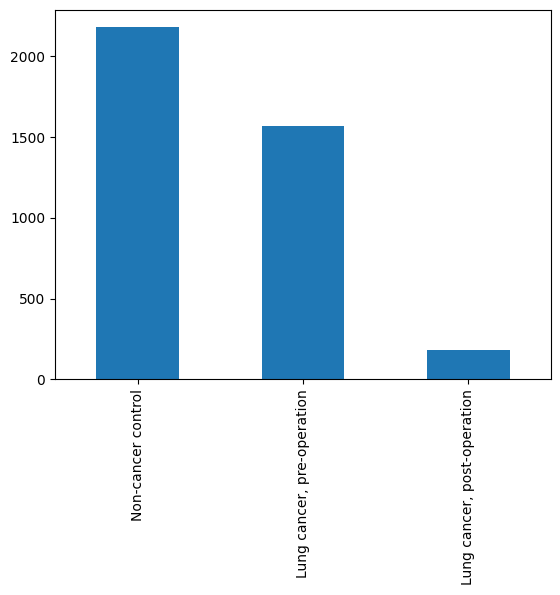

In [151]:
data['disease state'].value_counts().plot.bar() # 绘制disease state列的柱状图

#### 3.3.4 PCA降维

1. 计算协方差矩阵

In [12]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier


data137140 = pd.DataFrame(pd.read_csv('Data/GSE137140.csv'))

data137140_X = data137140.drop(['disease state'], axis=1) # 将disease state列删除
data137140_X = data137140_X.drop(['ID_REF'], axis=1) # 将ID_REF列删除

data137140_y = data137140['disease state'] # 将disease state列的值作为标签

data137140_X.head() # 输出数据的前5行

hsa-let-7a-5p  hsa-let-7b-5p  hsa-let-7c-5p  hsa-let-7d-5p  hsa-let-7e-5p  \
0       4.393092       6.306405       5.736186       3.923085       4.903123   
1       3.817744      -1.240936       3.740098       2.193073       2.147514   
2       3.779668       3.997013       0.503678       3.724792       1.606391   
3       5.537473       1.593298       3.843516       5.464836       0.530399   
4       5.953741       3.073890       0.853141       4.977867       0.853141   

   hsa-let-7f-5p  hsa-miR-15a-5p  hsa-miR-16-5p  hsa-miR-17-5p  hsa-miR-17-3p  \
0      -0.152745       -0.152745      -0.152745       3.958537      -0.152745   
1       3.169063        3.485990       3.674215       5.033756       4.379048   
2       3.221160        2.860850       4.332943       4.093647       3.982986   
3       2.489050        3.275917       0.530399       5.951552       2.069957   
4       6.203541        0.853141       0.853141       0.853141       6.480174   

   ...  hsa-miR-301b-5p  hsa-miR-1249-5p  MIMAT0032110  hsa-miR-548ad-5p  \
0  ...        -0.152745         5.312396     -0.152745         -0.152745   
1  ...         1.314120         6.919166     -1.240936         -1.240936   
2  ...        -1.353647         6.632532     -1.531527         -1.531527   
3  ...         0.530399         7.903956      4.832157          0.530399   
4  ...         3.142655         8.361825      0.853141          0.853141   

   hsa-miR-548ae-5p  hsa-miR-4485-5p  hsa-miR-8485  hsa-miR-9500  \
0         -0.152745         7.239878      3.096798     -0.152745   
1         -1.240936         6.827426      4.358254      2.766291   
2         -1.531527         5.173705      4.844177      1.146725   
3          0.530399         6.444462      4.290578      0.530399   
4          0.853141         3.301567      0.853141      0.853141   

   hsa-miR-548bb-5p  hsa-miR-548bb-3p  
0         -0.152745          0.252979  
1         -1.240936         -1.240936  
2         -1.531527         -1.531527  
3          4.570456          4.113035  
4          0.853141          0.853141  

[5 rows x 2588 columns]

协方差矩阵对角线上的元素表示每个特征的方差。

In [13]:
# 1. 计算协方差矩阵
cov_matrix = np.cov(data137140_X.T) # data137140_X转置后计算协方差矩阵
print("Covariance Matrix:")
print(cov_matrix) # 打印协方差矩阵

variances = np.diag(cov_matrix) # 计算协方差矩阵的对角线元素（方差）
print("\nVariances:")
print(variances) # 打印对角线元素（方差）

Covariance Matrix:
[[11.11697837  7.2662737   7.32059305 ...  0.2484679   2.50462819
   4.74911775]
 [ 7.2662737   9.69998292  6.55016425 ...  0.35061446  2.32989947
   4.41842398]
 [ 7.32059305  6.55016425 10.91684766 ...  0.42187078  2.72277931
   4.8480273 ]
 ...
 [ 0.2484679   0.35061446  0.42187078 ...  4.10590599  0.58517501
   0.18488884]
 [ 2.50462819  2.32989947  2.72277931 ...  0.58517501  5.92625999
   2.95239736]
 [ 4.74911775  4.41842398  4.8480273  ...  0.18488884  2.95239736
   7.28612804]]

Variances:
[11.11697837  9.69998292 10.91684766 ...  4.10590599  5.92625999
  7.28612804]


2. 对协方差矩阵进行特征值分解，得到特征值和对应的特征向量。

In [14]:
# 2. 计算特征值和特征向量
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix) # 进行特征值分解

# 输出特征值和特征向量
print("特征值：")
print(eigenvalues)
print("\n特征向量: ")
print(eigenvectors)

特征值：
[ 4.76276339e+03+0.00000000e+00j  8.73951052e+02+0.00000000e+00j
  4.71584669e+02+0.00000000e+00j ... -4.39602199e-16+0.00000000e+00j
 -5.87699039e-16+1.84682804e-16j -5.87699039e-16-1.84682804e-16j]

特征向量: 
[[ 3.02103501e-02+0.00000000e+00j  2.54111886e-03+0.00000000e+00j
   3.45008475e-02+0.00000000e+00j ...  1.03364752e-16+0.00000000e+00j
  -5.01971460e-17+2.46787209e-17j -5.01971460e-17-2.46787209e-17j]
 [ 2.82779657e-02+0.00000000e+00j -3.24123916e-03+0.00000000e+00j
   3.93452986e-02+0.00000000e+00j ...  4.13385477e-16+0.00000000e+00j
   6.11827229e-17+1.92042761e-16j  6.11827229e-17-1.92042761e-16j]
 [ 3.26037450e-02+0.00000000e+00j  3.85777918e-03+0.00000000e+00j
   3.71396969e-02+0.00000000e+00j ...  1.99901011e-16+0.00000000e+00j
   5.35784132e-17-7.22380970e-17j  5.35784132e-17+7.22380970e-17j]
 ...
 [ 5.50446823e-03+0.00000000e+00j -3.37548875e-02+0.00000000e+00j
  -5.90660999e-03+0.00000000e+00j ... -3.15281164e-16+0.00000000e+00j
  -2.25935506e-16-1.71876852e-16j -2.

3. 选择主成分

- 方差贡献率方法
- 分析结果可知：图像虽然在100左右存在拐点，但其共享率过低仅有0.5+，所以并不适合选取拐点作为成分分析的数量。

d:\Program Files\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


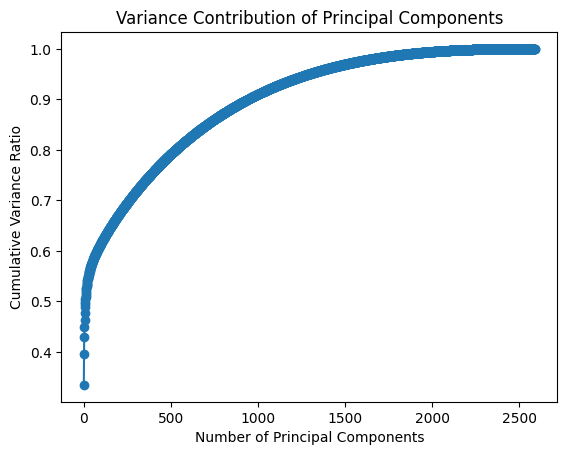

In [16]:
import matplotlib.pyplot as plt
# 3. 计算主成分
total_variance = np.sum(eigenvalues) # 计算总方差

variance_ratio = eigenvalues / total_variance # 计算每个主成分的方差贡献率

sorted_variance_ratio = np.sort(variance_ratio)[::-1] # 按方差贡献率从大到小排序

cumulative_variance_ratio = np.cumsum(sorted_variance_ratio) # 计算累计方差贡献率

# 绘制方差贡献率图
plt.plot(range(1, len(sorted_variance_ratio)+1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Ratio')
plt.title('Variance Contribution of Principal Components')
# plt.xlim(500, 2000)  # 设置x轴范围
plt.show()

- Kaiser准则

In [17]:
# 根据Kaiser准则选择主成分数量
n_components = 0
# 遍历特征值, 如果特征值大于1，则将主成分数量加1
for i in range(len(eigenvalues)):
    if eigenvalues[i] > 1:
        n_components += 1

print("选择的主成分数量为：", n_components)

选择的主成分数量为： 1560


4. 降维转换：下面使用进行PCA降维，n_components参数指定了降维后保留的主成分数量为1560。

In [18]:
# 4. 使用PCA进行降维
pca = PCA(n_components=1560) # 创建PCA对象，并指定要保留的主成分数量为kaiser准则计算所得的61

data137140_pca = pca.fit_transform(data137140_X) # 对数据进行降维

print("Dimension after PCA:", data137140_pca.shape) # 打印降维后的数据维度
data137140_pca = pd.DataFrame(data137140_pca) # 将降维后的数据转换为DataFrame

Dimension after PCA: (3924, 1560)


#### 3.3.5 LDA降维


- 进行数据集的特征删除和标准化，并保留所有的主成分进行LDA降维。

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 1. 数据集特征删除与标准化
data137140 = pd.DataFrame(pd.read_csv('Data/GSE137140.csv')) # 读取数据

X = data137140.drop(['disease state', 'ID_REF'], axis=1) # 将disease state列和ID_REF列删除
y = data137140['disease state'] # 将diagnosis列的值作为标签

le = LabelEncoder() # 创建LabelEncoder对象
y = le.fit_transform(y) # 将标签编码为整数

scaler = StandardScaler() # 创建StandardScaler对象
X = scaler.fit_transform(X) # 对数据进行标准化

lda = LDA(n_components=None) # 创建LDA对象
X_lda = lda.fit_transform(X, y) # 对数据进行降维
print(X_lda.shape)

(3924, 2)


- 方差贡献率：通过累积方差贡献率确定要保留的主成分数量，使其达到或超过0.9。

In [20]:
# 2. 计算方差贡献率
explained_variance_ratio = lda.explained_variance_ratio_ # 获取每个主成分的方差贡献率
cumulative_variance_ratio = np.cumsum(explained_variance_ratio) # 计算累计方差贡献率

num_components = np.sum(cumulative_variance_ratio >= 0.9) + 1  # 计算保留90%方差所需的主成分数量，将结果加1以解释Python的0索引

- 方差贡献率可视化

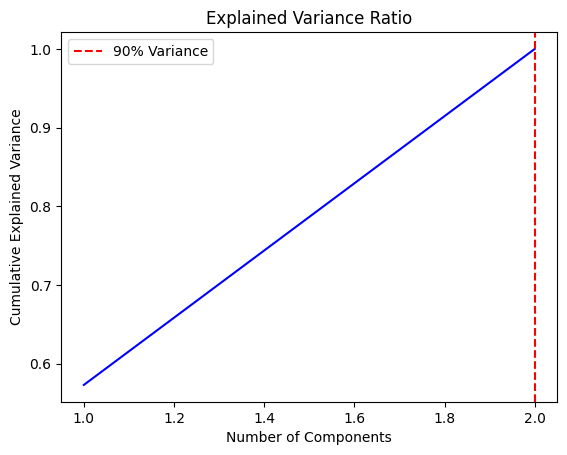

Number of components to retain 90% variance: 2


In [21]:
# 3. 可视化方差贡献率
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, 'b-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.axvline(x=num_components, color='r', linestyle='--', label='90% Variance')
plt.legend()
plt.show()

print(f"Number of components to retain 90% variance: {num_components}")

- LDA降维：根据方差贡献率的结果，主成分设置为2进行LDA降维。

In [22]:
# 4. 使用LDA进行降维
lda = LDA(n_components=2) # 创建LDA对象
lda.fit(X, y) # 对数据进行降维
X_lda = lda.transform(X) # 对数据进行降维

data137140_lda = pd.DataFrame(X_lda) # 将降维后的数据转换为DataFrame
print("Dimension after LDA:", data137140_lda.shape) # 打印降维后的数据维度

Dimension after LDA: (3924, 2)


- 结果可视化：对LDA降维结果进行可视化。

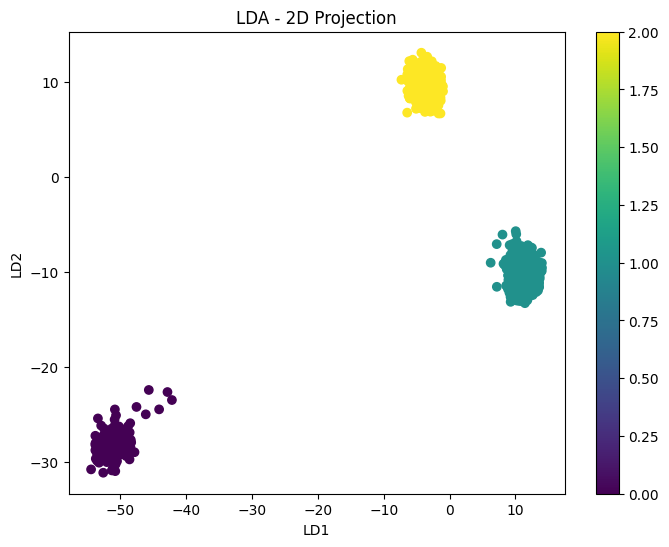

In [23]:
import matplotlib.pyplot as plt

# 5. 可视化降维结果
plt.figure(figsize=(8, 6))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='viridis')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA - 2D Projection')
plt.colorbar()
plt.show()

## 四、KNN分类算法

### 4.1 KNN算法基础

- 概念：k-最近邻算法，也称为 KNN 或 k-NN，是一种非参数的监督学习分类器，它使用邻近性对单个数据点的分组进行分类或预测。KNN 是一种惰性学习和，因为它在提供训练数据时不执行任何训练。相反，它只是在训练期间存储数据，不执行任何计算。在对数据集执行查询之前，它不会生成模型。
- 步骤：
    - 加载数据
    - 选择 K 值
    - 对于数据中的每个数据点：
        - 查找到所有训练数据样本的欧氏距离
        - 将距离存储在有序列表中并对其进行排序
        - 从排序列表中选择前 K 个条目
        - 根据所选点中存在的大多数类标记测试点

### 4.2 PCA降维处理后的GSE73002数据集

1. 创建KNN分类器对象：提取数据集中的特征和标签，并使用KNeighborsClassifier类创建一个KNN分类器对象。

In [163]:
# 1. 提取数据集中的特征和标签，创建KNN分类器
from sklearn.neighbors import KNeighborsClassifier

X = data73002_pca # 将降维后的数据作为特征
y = data73002['diagnosis'] # 将diagnosis列的值作为标签

knn = KNeighborsClassifier() # 创建KNN分类器

2. 调参：class KNeighborsClassifier(KNeighborsMixin, ClassifierMixin, NeighborsBase) KNN分类器的主要超参数为n_neighbors，所以下面使用两种方法对其进行调参。

- K折交叉验证：将数据集分成K个相等大小的子集，其中K-1个子集用于训练模型，而剩余的1个子集用于评估模型的性能。这个过程会重复K次，每次选择不同的子集作为验证集，最终得到K个性能评估结果的平均值作为模型的性能指标。

In [164]:
# 2. 使用K折交叉验证进行参数调优
from sklearn.model_selection import cross_val_score

ks = range(1, 10) # 设置K的取值范围

mean_scores = [] # 创建一个空列表，用于存储每个K值对应的平均准确率
std_scores = [] # 创建一个空列表，用于存储每个K值对应的准确率标准差

# 遍历K的取值范围
for k in ks:
    knn.n_neighbors = k
    # 使用K折交叉验证计算准确率
    scores = cross_val_score(knn, X, y, cv=5) # 使用KNN分类器对数据进行5折交叉验证
    mean_scores.append(np.mean(scores)) # 计算平均准确率
    std_scores.append(np.std(scores)) # 计算准确率标准差

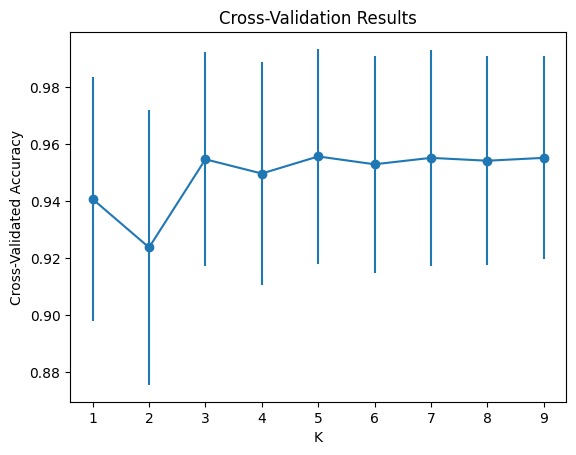

In [165]:
# 3. 可视化K折交叉验证调参结果
import numpy as np
import matplotlib.pyplot as plt

# 可视化调参结果
plt.errorbar(ks, mean_scores, yerr=std_scores, fmt='-o')
plt.xlabel("K")
plt.ylabel("Cross-Validated Accuracy")
plt.title("Cross-Validation Results")
plt.show()

- 分析结果可知：K折交叉验证所得的最佳K值为5。

In [166]:
# 4. 打印调参结果
best_k = ks[np.argmax(mean_scores)] # 获取平均准确率最高的K值
best_accuracy = np.max(mean_scores) # 获取平均准确率最高的准确率
print("Best K:", best_k)
print("Best accuracy:", best_accuracy)

Best K: 5
Best accuracy: 0.9556159414663838


- 网格搜索：通过遍历给定的超参数组合，针对每一组超参数进行模型训练和评估，最终找到最佳的超参数组合，使模型性能达到最优。

In [167]:
# 5. 使用网格搜索进行参数调优
from sklearn.model_selection import GridSearchCV

# 使用网格搜索进行调参
param_grid = {'n_neighbors': range(1, 10)} # 设置参数范围

grid_search = GridSearchCV(knn, param_grid, cv=5) # 创建网格搜索对象
grid_search.fit(X, y) # 使用网格搜索对象对数据进行拟合

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=9),
             param_grid={'n_neighbors': range(1, 10)})

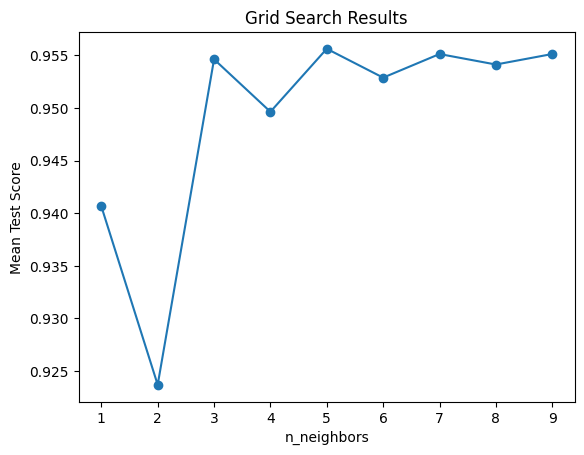

In [168]:
# 6. 可视化网格搜索调参结果
param_values = [param['n_neighbors'] for param in grid_search.cv_results_['params']]
mean_scores = grid_search.cv_results_['mean_test_score']
plt.plot(param_values, mean_scores, '-o')
plt.xlabel("n_neighbors")
plt.ylabel("Mean Test Score")
plt.title("Grid Search Results")
plt.show()

- 分析结果可知：网格搜索所得的K值为5。

In [169]:
# 7. 打印调参结果
best_params = grid_search.best_params_ # 获取平均准确率最高的参数
best_accuracy = grid_search.best_score_ # 获取平均准确率最高的准确率
print("Best parameters:", best_params)
print("Best accuracy:", best_accuracy)

Best parameters: {'n_neighbors': 5}
Best accuracy: 0.9556159414663838


3. 将n_neighbors设置为上面两种调参方法共同所得的5，进行KNN分类。

In [170]:
# 8. 使用最优参数构建KNN分类器,及结果可视化
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

# 构建最终的KNN分类器
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

y_pred = knn.predict(X) # 对数据进行预测

# 打印评估指标
print("kNN Classification Report:")
print(classification_report(y, y_pred)) # 打印分类报告
print("Accuracy:", accuracy_score(y, y_pred)) # 计算并打印accuracy
print("Precision:", precision_score(y, y_pred, average='macro')) # 计算并打印precision
print("Recall:", recall_score(y, y_pred, average='macro')) # 计算并打印recall
print("F1-score:", f1_score(y, y_pred, average='macro')) # 计算并打印F1-score

kNN Classification Report:
                       precision    recall  f1-score   support

benign breast disease       0.80      0.15      0.25        53
        breast cancer       0.96      0.98      0.97      1251
           non-cancer       0.99      1.00      0.99      2614
     prostate disease       0.98      0.99      0.98        93

             accuracy                           0.98      4011
            macro avg       0.93      0.78      0.80      4011
         weighted avg       0.98      0.98      0.98      4011

Accuracy: 0.9805534779356769
Precision: 0.9321535682805284
Recall: 0.779590604263224
F1-score: 0.8004496370398692


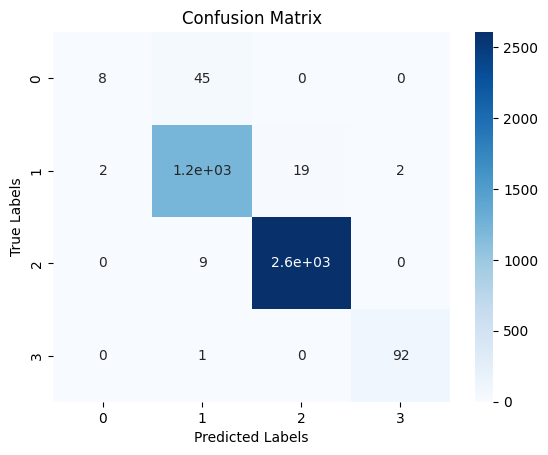

In [171]:
# 绘制混淆矩阵
confusion = confusion_matrix(y, y_pred)
sns.heatmap(confusion, annot=True, cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### 4.3 LDA降维处理后的GSE73002数据集

1. 创建KNN分类器对象

In [172]:
# 1. 提取数据集中的特征和标签，创建KNN分类器
from sklearn.neighbors import KNeighborsClassifier

X = data73002_lda # 将降维后的数据作为特征
y = data73002['diagnosis'] # 将diagnosis列的值作为标签

knn = KNeighborsClassifier() # 创建KNN分类器

2. 调参
- K折交叉

In [173]:
# 2. 使用K折交叉验证进行参数调优
from sklearn.model_selection import cross_val_score

ks = range(1, 10) # 设置K的取值范围

mean_scores = [] # 创建一个空列表，用于存储每个K值对应的平均准确率
std_scores = [] # 创建一个空列表，用于存储每个K值对应的准确率标准差

# 遍历K的取值范围
for k in ks:
    knn.n_neighbors = k
    # 使用K折交叉验证计算准确率
    scores = cross_val_score(knn, X, y, cv=5) # 使用KNN分类器对数据进行5折交叉验证
    mean_scores.append(np.mean(scores)) # 计算平均准确率
    std_scores.append(np.std(scores)) # 计算准确率标准差

- 分析结果可知：K折交叉验证建议K = 1。

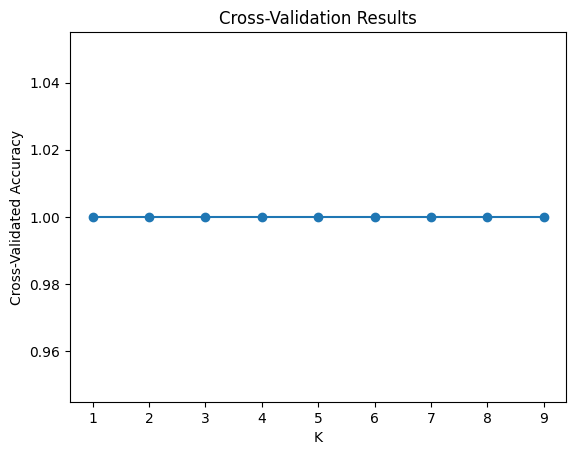

In [174]:
# 3. 可视化K折交叉验证调参结果
import numpy as np
import matplotlib.pyplot as plt

# 可视化调参结果
plt.errorbar(ks, mean_scores, yerr=std_scores, fmt='-o')
plt.xlabel("K")
plt.ylabel("Cross-Validated Accuracy")
plt.title("Cross-Validation Results")
plt.show()

In [175]:
# 4. 打印调参结果
best_k = ks[np.argmax(mean_scores)] # 获取平均准确率最高的K值
best_accuracy = np.max(mean_scores) # 获取平均准确率最高的准确率
print("Best K:", best_k)
print("Best accuracy:", best_accuracy)

Best K: 1
Best accuracy: 1.0


- 网格搜索

In [176]:
# 5. 使用网格搜索进行参数调优
from sklearn.model_selection import GridSearchCV

# 使用网格搜索进行调参
param_grid = {'n_neighbors': range(1, 10)} # 设置参数范围

grid_search = GridSearchCV(knn, param_grid, cv=5) # 创建网格搜索对象
grid_search.fit(X, y) # 使用网格搜索对象对数据进行拟合

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=9),
             param_grid={'n_neighbors': range(1, 10)})

- 分析结果可知：网格搜索建议K = 1。

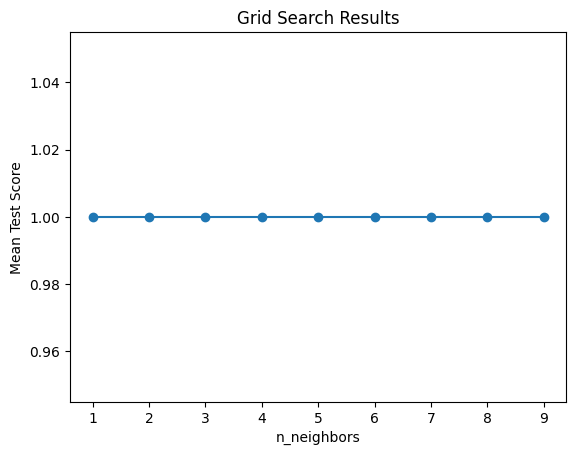

In [177]:
# 6. 可视化网格搜索调参结果
param_values = [param['n_neighbors'] for param in grid_search.cv_results_['params']]
mean_scores = grid_search.cv_results_['mean_test_score']
plt.plot(param_values, mean_scores, '-o')
plt.xlabel("n_neighbors")
plt.ylabel("Mean Test Score")
plt.title("Grid Search Results")
plt.show()

In [178]:
# 7. 打印调参结果
best_params = grid_search.best_params_ # 获取平均准确率最高的参数
best_accuracy = grid_search.best_score_ # 获取平均准确率最高的准确率
print("Best parameters:", best_params)
print("Best accuracy:", best_accuracy)

Best parameters: {'n_neighbors': 1}
Best accuracy: 1.0


3. 将n_neighbors设置为上面两种调参方法共同所得的1，进行KNN分类。

In [179]:
# 8. 使用最优参数构建KNN分类器,及结果可视化
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 构建最终的KNN分类器
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

y_pred = knn.predict(X) # 对数据进行预测

# 打印评估指标
print("kNN Classification Report:")
print(classification_report(y, y_pred)) # 打印分类报告
print("Accuracy:", accuracy_score(y, y_pred)) # 计算并打印accuracy
print("Precision:", precision_score(y, y_pred, average='macro')) # 计算并打印precision
print("Recall:", recall_score(y, y_pred, average='macro')) # 计算并打印recall
print("F1-score:", f1_score(y, y_pred, average='macro')) # 计算并打印F1-score

kNN Classification Report:
                       precision    recall  f1-score   support

benign breast disease       1.00      1.00      1.00        53
        breast cancer       1.00      1.00      1.00      1251
           non-cancer       1.00      1.00      1.00      2614
     prostate disease       1.00      1.00      1.00        93

             accuracy                           1.00      4011
            macro avg       1.00      1.00      1.00      4011
         weighted avg       1.00      1.00      1.00      4011

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


- 分析结果可知：<mark>LDA处理后的数据集进行KNN分类时出现了过拟合的情况。</mark>

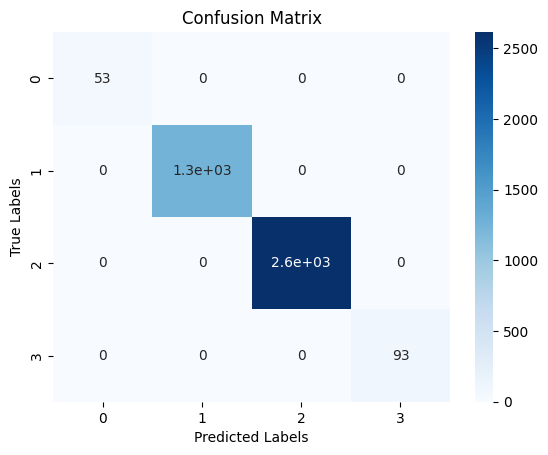

In [180]:
# 绘制混淆矩阵
confusion = confusion_matrix(y, y_pred)
sns.heatmap(confusion, annot=True, cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### 4.4 PCA降维处理后的GSE137140数据集

1. 创建KNN分类器对象：提取数据集中的特征和标签，并使用KNeighborsClassifier类创建一个KNN分类器对象。

In [181]:
# 1. 提取数据集中的特征和标签，创建KNN分类器
from sklearn.neighbors import KNeighborsClassifier

X = data137140_pca # 将降维后的数据作为特征
y = data137140['disease state'] # 将disease state列的值作为标签

knn = KNeighborsClassifier() # 创建KNN分类器

2. 调参
- K折交叉验证

In [182]:
# 2. 使用K折交叉验证进行参数调优
from sklearn.model_selection import cross_val_score

ks = range(1, 10) # 设置K的取值范围

mean_scores = [] # 创建一个空列表，用于存储每个K值对应的平均准确率
std_scores = [] # 创建一个空列表，用于存储每个K值对应的准确率标准差

# 遍历K的取值范围
for k in ks:
    knn.n_neighbors = k
    # 使用K折交叉验证计算准确率
    scores = cross_val_score(knn, X, y, cv=5) # 使用KNN分类器对数据进行5折交叉验证
    mean_scores.append(np.mean(scores)) # 计算平均准确率
    std_scores.append(np.std(scores)) # 计算准确率标准差

- 分析结果可知：K折交叉验证得到的K=8。

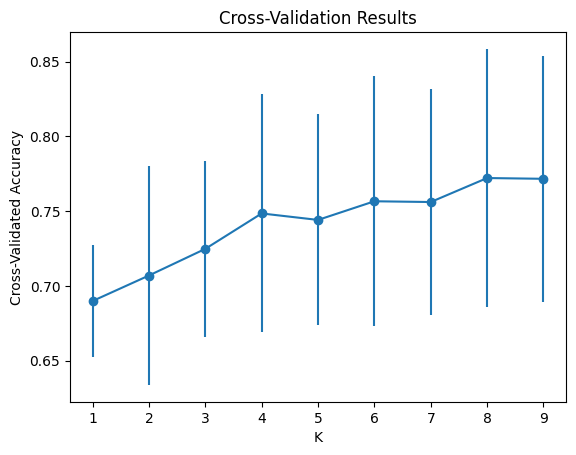

In [183]:
# 3. 可视化K折交叉验证调参结果
import numpy as np
import matplotlib.pyplot as plt

# 可视化调参结果
plt.errorbar(ks, mean_scores, yerr=std_scores, fmt='-o')
plt.xlabel("K")
plt.ylabel("Cross-Validated Accuracy")
plt.title("Cross-Validation Results")
plt.show()

In [184]:
# 4. 打印调参结果
best_k = ks[np.argmax(mean_scores)] # 获取平均准确率最高的K值
best_accuracy = np.max(mean_scores) # 获取平均准确率最高的准确率
print("Best K:", best_k)
print("Best accuracy:", best_accuracy)

Best K: 8
Best accuracy: 0.772181853633173


- 网格搜索

In [185]:
# 5. 使用网格搜索进行参数调优
from sklearn.model_selection import GridSearchCV

# 使用网格搜索进行调参
param_grid = {'n_neighbors': range(1, 10)} # 设置参数范围

grid_search = GridSearchCV(knn, param_grid, cv=5) # 创建网格搜索对象
grid_search.fit(X, y) # 使用网格搜索对象对数据进行拟合

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=9),
             param_grid={'n_neighbors': range(1, 10)})

- 分析结果可知：网格搜索得到K=8。

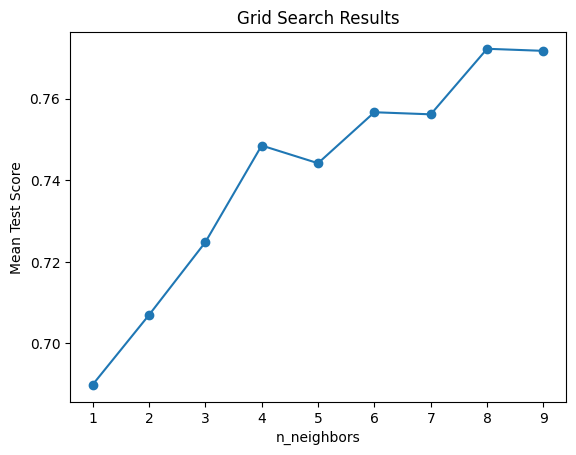

In [186]:
# 6. 可视化网格搜索调参结果
param_values = [param['n_neighbors'] for param in grid_search.cv_results_['params']]
mean_scores = grid_search.cv_results_['mean_test_score']
plt.plot(param_values, mean_scores, '-o')
plt.xlabel("n_neighbors")
plt.ylabel("Mean Test Score")
plt.title("Grid Search Results")
plt.show()

In [187]:
# 7. 打印调参结果
best_params = grid_search.best_params_ # 获取平均准确率最高的参数
best_accuracy = grid_search.best_score_ # 获取平均准确率最高的准确率
print("Best parameters:", best_params)
print("Best accuracy:", best_accuracy)

Best parameters: {'n_neighbors': 8}
Best accuracy: 0.772181853633173


3. 将n_neighbors设置为上面两种调参方法共同所得的8，进行KNN分类。

In [188]:
# 8. 使用最优参数构建KNN分类器,及结果可视化
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 构建最终的KNN分类器
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X, y)

y_pred = knn.predict(X) # 对数据进行预测

# 打印评估指标
print("kNN Classification Report:")
print(classification_report(y, y_pred)) # 打印分类报告
print("Accuracy:", accuracy_score(y, y_pred)) # 计算并打印accuracy
print("Precision:", precision_score(y, y_pred, average='macro')) # 计算并打印precision
print("Recall:", recall_score(y, y_pred, average='macro')) # 计算并打印recall
print("F1-score:", f1_score(y, y_pred, average='macro')) # 计算并打印F1-score

kNN Classification Report:
                             precision    recall  f1-score   support

Lung cancer, post-operation       1.00      1.00      1.00       180
 Lung cancer, pre-operation       0.83      0.88      0.85      1566
         Non-cancer control       0.91      0.87      0.89      2178

                   accuracy                           0.88      3924
                  macro avg       0.91      0.92      0.91      3924
               weighted avg       0.88      0.88      0.88      3924

Accuracy: 0.8802242609582059
Precision: 0.9133223399787544
Recall: 0.9164652445739175
F1-score: 0.9145991784305852


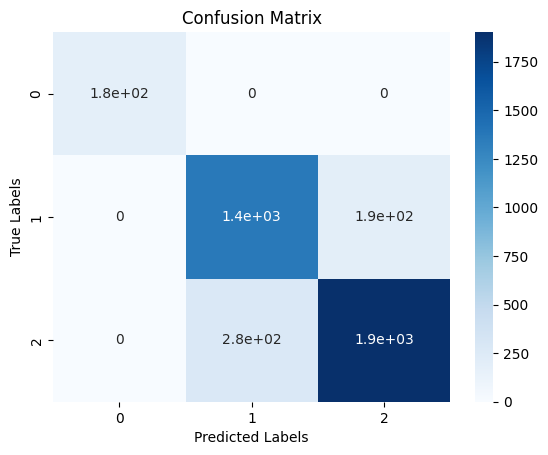

In [189]:
# 绘制混淆矩阵
confusion = confusion_matrix(y, y_pred)
sns.heatmap(confusion, annot=True, cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### 4.5 LDA降维处理之后的GSE137149数据集

1. 创建KNN分类器对象：提取数据集中的特征和标签，并使用KNeighborsClassifier类创建一个KNN分类器对象。

In [190]:
# 1. 提取数据集中的特征和标签，创建KNN分类器
from sklearn.neighbors import KNeighborsClassifier

X = data137140_lda # 将降维后的数据作为特征
y = data137140['disease state'] # 将disease state列的值作为标签

knn = KNeighborsClassifier() # 创建KNN分类器

2. 调参
- K折交叉验证

In [191]:
# 2. 使用K折交叉验证进行参数调优
from sklearn.model_selection import cross_val_score

ks = range(1, 10) # 设置K的取值范围

mean_scores = [] # 创建一个空列表，用于存储每个K值对应的平均准确率
std_scores = [] # 创建一个空列表，用于存储每个K值对应的准确率标准差

# 遍历K的取值范围
for k in ks:
    knn.n_neighbors = k
    # 使用K折交叉验证计算准确率
    scores = cross_val_score(knn, X, y, cv=5) # 使用KNN分类器对数据进行5折交叉验证
    mean_scores.append(np.mean(scores)) # 计算平均准确率
    std_scores.append(np.std(scores)) # 计算准确率标准差

- 分析结果可知：K折交叉验证得到的K=1。

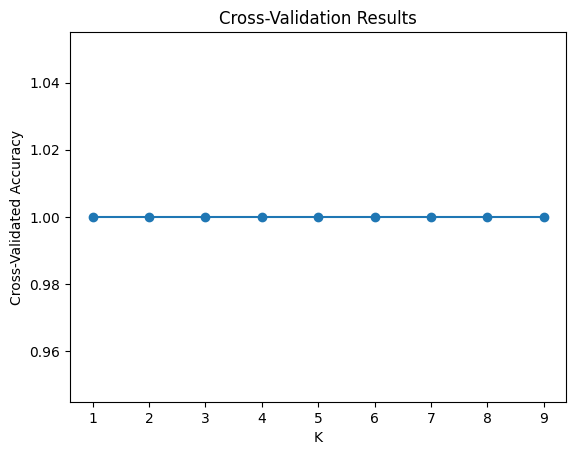

In [192]:
# 3. 可视化K折交叉验证调参结果
import numpy as np
import matplotlib.pyplot as plt

# 可视化调参结果
plt.errorbar(ks, mean_scores, yerr=std_scores, fmt='-o')
plt.xlabel("K")
plt.ylabel("Cross-Validated Accuracy")
plt.title("Cross-Validation Results")
plt.show()

In [193]:
# 4. 打印调参结果
best_k = ks[np.argmax(mean_scores)] # 获取平均准确率最高的K值
best_accuracy = np.max(mean_scores) # 获取平均准确率最高的准确率
print("Best K:", best_k)
print("Best accuracy:", best_accuracy)

Best K: 1
Best accuracy: 1.0


- 网格搜索

In [194]:
# 5. 使用网格搜索进行参数调优
from sklearn.model_selection import GridSearchCV

# 使用网格搜索进行调参
param_grid = {'n_neighbors': range(1, 10)} # 设置参数范围

grid_search = GridSearchCV(knn, param_grid, cv=5) # 创建网格搜索对象
grid_search.fit(X, y) # 使用网格搜索对象对数据进行拟合

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=9),
             param_grid={'n_neighbors': range(1, 10)})

- 分析结果可知：网格搜索得到的K=1。

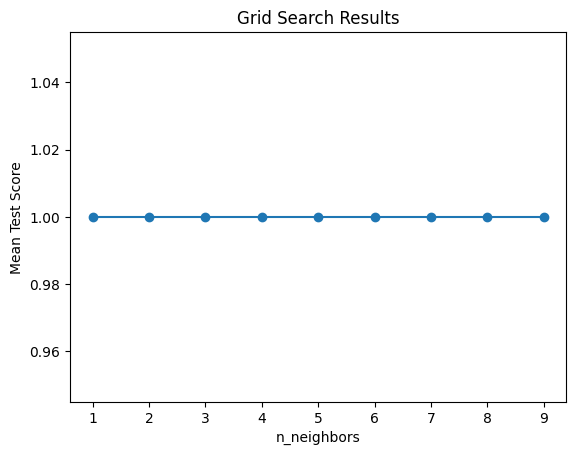

In [195]:
# 6. 可视化网格搜索调参结果
param_values = [param['n_neighbors'] for param in grid_search.cv_results_['params']]
mean_scores = grid_search.cv_results_['mean_test_score']
plt.plot(param_values, mean_scores, '-o')
plt.xlabel("n_neighbors")
plt.ylabel("Mean Test Score")
plt.title("Grid Search Results")
plt.show()

In [196]:
# 7. 打印调参结果
best_params = grid_search.best_params_ # 获取平均准确率最高的参数
best_accuracy = grid_search.best_score_ # 获取平均准确率最高的准确率
print("Best parameters:", best_params)
print("Best accuracy:", best_accuracy)

Best parameters: {'n_neighbors': 1}
Best accuracy: 1.0


3. 将n_neighbors设置为上面两种调参方法共同所得的1，进行KNN分类。

In [197]:
# 8. 使用最优参数构建KNN分类器,及结果可视化
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 构建最终的KNN分类器
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

y_pred = knn.predict(X) # 对数据进行预测

# 打印评估指标
print("kNN Classification Report:")
print(classification_report(y, y_pred)) # 打印分类报告
print("Accuracy:", accuracy_score(y, y_pred)) # 计算并打印accuracy
print("Precision:", precision_score(y, y_pred, average='macro')) # 计算并打印precision
print("Recall:", recall_score(y, y_pred, average='macro')) # 计算并打印recall
print("F1-score:", f1_score(y, y_pred, average='macro')) # 计算并打印F1-score

kNN Classification Report:
                             precision    recall  f1-score   support

Lung cancer, post-operation       1.00      1.00      1.00       180
 Lung cancer, pre-operation       1.00      1.00      1.00      1566
         Non-cancer control       1.00      1.00      1.00      2178

                   accuracy                           1.00      3924
                  macro avg       1.00      1.00      1.00      3924
               weighted avg       1.00      1.00      1.00      3924

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


- 分析结果可知：<mark>LDA处理后的数据集进行KNN分类时出现了过拟合的情况。</mark>

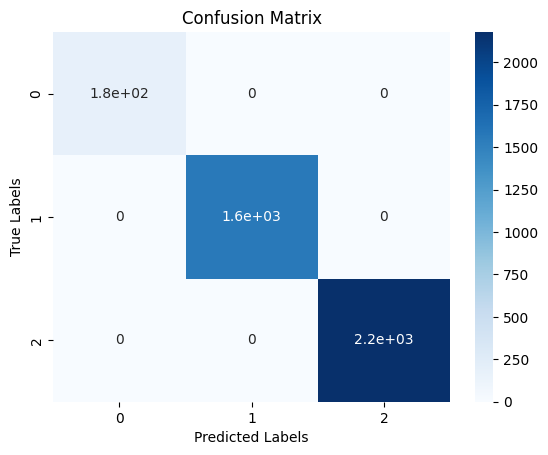

In [198]:
# 绘制混淆矩阵
confusion = confusion_matrix(y, y_pred)
sns.heatmap(confusion, annot=True, cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### 4.6 KNN算法总结
- 对数据质量和特征缩放敏感：KNN算法对数据质量敏感，异常值或噪声点可能会对结果产生较大影响。此外，由于KNN算法使用距离度量，特征的尺度差异较大时，需要对数据进行特征缩放，以避免某些特征对距离计算的影响较大。
- 需要选择合适的K值：KNN算法中的K值需要人为选择，选择不同的K值会对分类结果产生影响。较小的K值可能会导致对噪声敏感，产生过拟合，而较大的K值可能会导致模型过于简单，产生欠拟合。
- LDA处理后的数据集发生了过拟合的原因包括：数据集只有4011个样本，相对较少。在样本数量有限的情况下，模型更容易过度拟合训练数据。KNN算法本身就容易受到数据噪声和局部特征的影响，当样本数量较少时，KNN算法可能更容易过拟合。

## 五、SVM分类算法
### 5.1 SVM算法基础
- 概念：SVM是一种基于统计学习理论的分类算法，它的目标是找到一个最优的超平面（或者在非线性情况下是一个最优的决策边界），将不同类别的样本分隔开。

- 原理：
    - 线性可分情况：在二分类情况下，SVM通过找到一个能够将两个类别分开的超平面来进行分类。这个超平面是使得两个类别样本间的间隔最大的平面。
    - 线性不可分情况：对于线性不可分的情况，SVM引入了核函数（Kernel Function）将输入空间映射到一个高维特征空间，使得在高维特征空间中存在一个线性可分的超平面。

- 步骤：
    - 数据准备：将训练数据集标记为正样本和负样本，并进行必要的预处理（例如特征缩放）。
    - 寻找最优超平面：SVM的目标是寻找一个最优超平面，使得正样本和负样本之间的间隔最大化。间隔被定义为离超平面最近的样本点到超平面的距离。
    - 支持向量选择：在训练过程中，只有一部分样本点被用作训练最优超平面，它们被称为支持向量。这些样本点位于超平面附近，对决策边界的确定起关键作用。
    - 核函数的选择（非线性情况下）：如果数据不是线性可分的，需要使用核函数将数据映射到高维特征空间。常用的核函数包括线性核、多项式核和径向基函数（RBF）核等。
    - 参数优化：SVM中的参数包括正则化参数C和核函数的参数（如果使用核函数）。通过交叉验证等方法来选择最优的参数组合。

### 5.2 PCA降维处理后的GSE73002数据集

1. 提取数据集中的特征和标签，划分数据集：划分数据集的目的是为了能够客观地评估模型的性能，并验证模型在未知数据上的表现。它有助于防止模型对训练数据过拟合，并提供了一种合理的方式来选择最佳的模型参数。

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV

# 1. 提取数据集中的特征和标签，创建SVM分类器
X = data73002_pca # 将降维后的数据作为特征
y = data73002['diagnosis'] # 将diagnosis列的值作为标签

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 将数据集划分为训练集和测试集

2. 调参
- 网格搜索

In [200]:
# 2. 使用网格搜索进行参数调优
from sklearn.metrics import accuracy_score

# 定义超参数的范围
param_grid = {'C': [0.01, 0.1, 1, 10],
              'gamma': [0.0001, 0.001, 0.01, 0.1]}

svm = SVC() # 创建SVM分类器
grid_search = GridSearchCV(svm, param_grid, cv=5) # 创建网格搜索对象

grid_search.fit(X_train, y_train) # 使用网格搜索对象对数据进行拟合

# 获取最佳参数
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# 训练最佳参数的SVM分类器
svm_best = SVC(**best_params)
svm_best.fit(X_train, y_train)

# 预测测试集数据
y_pred = svm_best.predict(X_test)

# 打印准确率等评估指标
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best parameters: {'C': 10, 'gamma': 0.001}
Accuracy: 0.975093399750934


- 分析结果可知：Best parameters: {'C': 10, 'gamma': 0.001}

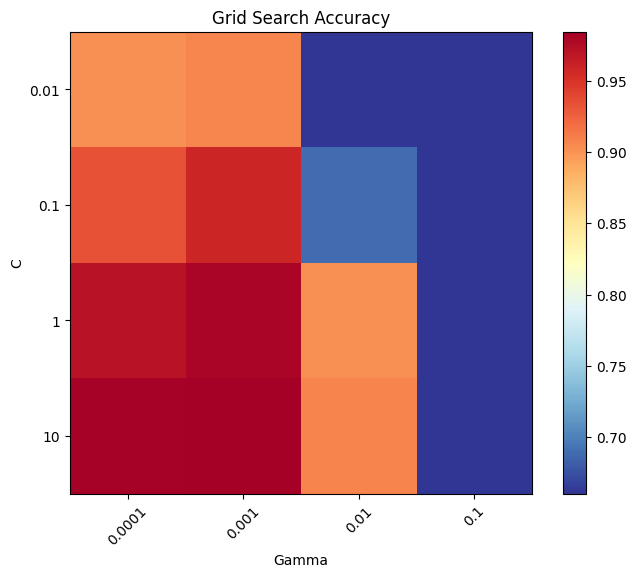

In [201]:
# 3. 可视化网格搜索调参结果
scores = grid_search.cv_results_['mean_test_score']
scores = np.array(scores).reshape(len(param_grid['C']), len(param_grid['gamma']))

# 绘制热力图
plt.figure(figsize=(8, 6))
plt.imshow(scores, cmap=plt.cm.RdYlBu_r)
plt.colorbar()
plt.xticks(np.arange(len(param_grid['gamma'])), param_grid['gamma'], rotation=45)
plt.yticks(np.arange(len(param_grid['C'])), param_grid['C'])
plt.xlabel('Gamma')
plt.ylabel('C')
plt.title('Grid Search Accuracy')
plt.show()

3. 根据Best parameters: {'C': 10, 'gamma': 0.001}进行SVM分类。 

In [206]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import seaborn as sns

# 4. 使用最优参数构建SVM分类器并打印评估指标

svm = SVC(C=10, gamma=0.001) # 创建 SVM 分类器对象
svm.fit(X_train, y_train) # 使用训练集进行训练
y_pred = svm.predict(X_test) # 使用测试集进行预测

# 打印评估指标
print("SVM Classification Report:")
print(classification_report(y_test, y_pred)) # 打印分类报告
print("Accuracy:", accuracy_score(y_test, y_pred)) # 计算并打印accuracy
print("Precision:", precision_score(y_test, y_pred, average='macro',zero_division=1)) # 计算并打印precision
print("Recall:", recall_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印recall
print("F1-score:", f1_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印F1-score

SVM Classification Report:
                       precision    recall  f1-score   support

benign breast disease       0.00      0.00      0.00        12
        breast cancer       0.95      0.98      0.96       273
           non-cancer       0.99      1.00      0.99       496
     prostate disease       1.00      1.00      1.00        22

             accuracy                           0.98       803
            macro avg       0.74      0.74      0.74       803
         weighted avg       0.96      0.98      0.97       803

Accuracy: 0.975093399750934
Precision: 0.7350394739657251
Recall: 0.7434974299893655
F1-score: 0.739215935272028


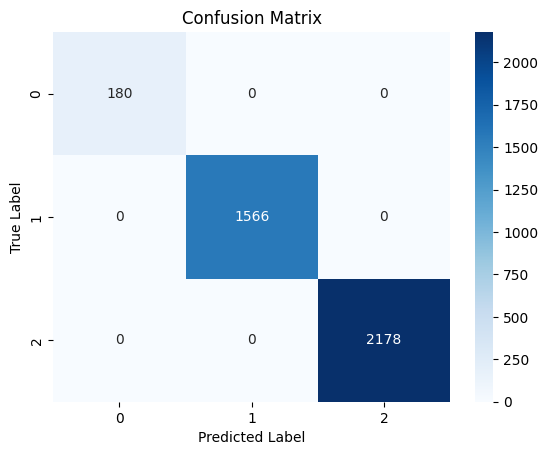

In [207]:
# 5. 可视化分类结果的混淆矩阵
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### 5.3 LDA降维处理后的GSE73002数据集

1. 提取数据集中的特征和标签，划分数据集。

In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV

# 1. 提取数据集中的特征和标签，创建SVM分类器
X = data73002_lda # 将降维后的数据作为特征
y = data73002['diagnosis'] # 将diagnosis列的值作为标签

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 将数据集划分为训练集和测试集

2. 调参
- 网格搜索

In [209]:
# 2. 使用网格搜索进行参数调优
from sklearn.metrics import accuracy_score

# 定义超参数的范围
param_grid = {'C': [0.01, 0.1, 1, 10],
              'gamma': [0.0001, 0.001, 0.01, 0.1]}

svm = SVC() # 创建SVM分类器
grid_search = GridSearchCV(svm, param_grid, cv=5) # 创建网格搜索对象

grid_search.fit(X_train, y_train) # 使用网格搜索对象对数据进行拟合

# 获取最佳参数
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# 训练最佳参数的SVM分类器
svm_best = SVC(**best_params)
svm_best.fit(X_train, y_train)

# 预测测试集数据
y_pred = svm_best.predict(X_test)

# 打印准确率等评估指标
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best parameters: {'C': 0.1, 'gamma': 0.01}
Accuracy: 1.0


- 分析结果可知：Best parameters: {'C': 0.1, 'gamma': 0.01}

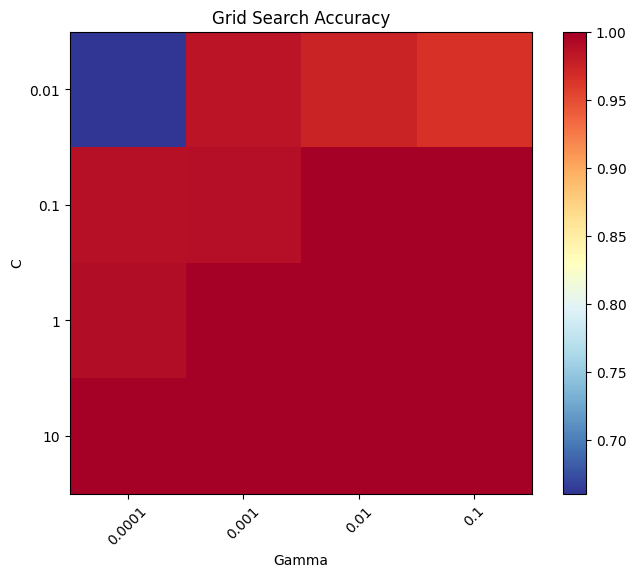

In [210]:
# 3. 可视化网格搜索调参结果
scores = grid_search.cv_results_['mean_test_score']
scores = np.array(scores).reshape(len(param_grid['C']), len(param_grid['gamma']))

# 绘制热力图
plt.figure(figsize=(8, 6))
plt.imshow(scores, cmap=plt.cm.RdYlBu_r)
plt.colorbar()
plt.xticks(np.arange(len(param_grid['gamma'])), param_grid['gamma'], rotation=45)
plt.yticks(np.arange(len(param_grid['C'])), param_grid['C'])
plt.xlabel('Gamma')
plt.ylabel('C')
plt.title('Grid Search Accuracy')
plt.show()

3. 根据Best parameters: {'C': 0.1, 'gamma': 0.01}进行SVM分类。 

In [211]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import seaborn as sns
import warnings

# 4. 使用最优参数构建SVM分类器并打印评估指标

svm = SVC(C=0.1, gamma=0.01) # 创建 SVM 分类器对象
svm.fit(X_train, y_train) # 使用训练集进行训练
y_pred = svm.predict(X_test) # 使用测试集进行预测

# 忽略precision计算时的警告
warnings.filterwarnings("ignore", category=UserWarning)

# 打印评估指标
print("SVM Classification Report:")
print(classification_report(y_test, y_pred)) # 打印分类报告
print("Accuracy:", accuracy_score(y_test, y_pred)) # 计算并打印accuracy
print("Precision:", precision_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印precision
print("Recall:", recall_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印recall
print("F1-score:", f1_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印F1-score

SVM Classification Report:
                       precision    recall  f1-score   support

benign breast disease       1.00      1.00      1.00        12
        breast cancer       1.00      1.00      1.00       273
           non-cancer       1.00      1.00      1.00       496
     prostate disease       1.00      1.00      1.00        22

             accuracy                           1.00       803
            macro avg       1.00      1.00      1.00       803
         weighted avg       1.00      1.00      1.00       803

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


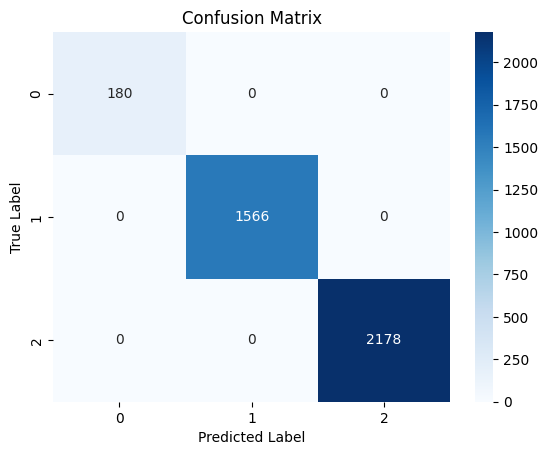

In [212]:
# 5. 可视化分类结果的混淆矩阵
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### 5.4 PCA降维处理后的GSE137140数据集

1. 提取数据集中的特征和标签，划分数据集。

In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV

# 1. 提取数据集中的特征和标签，创建SVM分类器
X = data137140_pca # 将降维后的数据作为特征
y = data137140['disease state'] # 将disease state列的值作为标签

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 将数据集划分为训练集和测试集

2. 调参
- 网格搜索

In [214]:
# 2. 使用网格搜索进行参数调优
from sklearn.metrics import accuracy_score

# 定义超参数的范围
param_grid = {'C': [0.01, 0.1, 1, 10],
              'gamma': [0.0001, 0.001, 0.01, 0.1]}

svm = SVC() # 创建SVM分类器
grid_search = GridSearchCV(svm, param_grid, cv=5) # 创建网格搜索对象

grid_search.fit(X_train, y_train) # 使用网格搜索对象对数据进行拟合

# 获取最佳参数
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# 训练最佳参数的SVM分类器
svm_best = SVC(**best_params)
svm_best.fit(X_train, y_train)

# 预测测试集数据
y_pred = svm_best.predict(X_test)

# 打印准确率等评估指标
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best parameters: {'C': 10, 'gamma': 0.0001}
Accuracy: 0.9974522292993631


- 分析结果可知：Best parameters: {'C': 10, 'gamma': 0.0001}

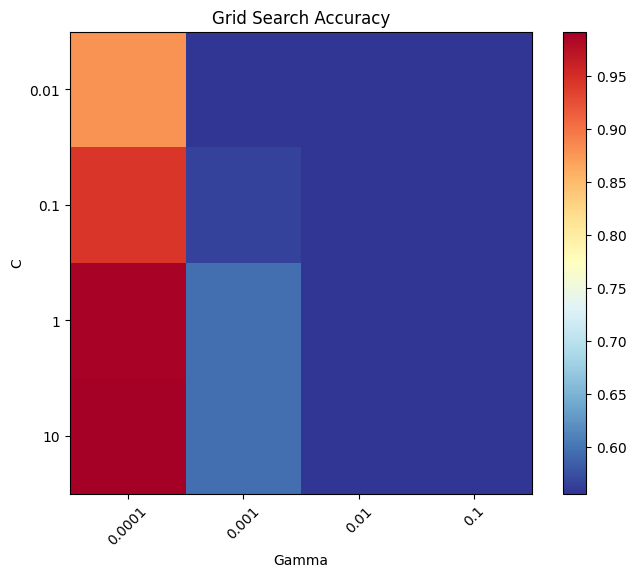

In [215]:
# 3. 可视化网格搜索调参结果
scores = grid_search.cv_results_['mean_test_score']
scores = np.array(scores).reshape(len(param_grid['C']), len(param_grid['gamma']))

# 绘制热力图
plt.figure(figsize=(8, 6))
plt.imshow(scores, cmap=plt.cm.RdYlBu_r)
plt.colorbar()
plt.xticks(np.arange(len(param_grid['gamma'])), param_grid['gamma'], rotation=45)
plt.yticks(np.arange(len(param_grid['C'])), param_grid['C'])
plt.xlabel('Gamma')
plt.ylabel('C')
plt.title('Grid Search Accuracy')
plt.show()

3. 根据Best parameters: {'C': 10, 'gamma': 0.0001}进行SVM分类。 

In [216]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import seaborn as sns

# 4. 使用最优参数构建SVM分类器并打印评估指标

svm = SVC(C=10, gamma=0.0001) # 创建 SVM 分类器对象
svm.fit(X_train, y_train) # 使用训练集进行训练
y_pred = svm.predict(X_test) # 使用测试集进行预测

warnings.filterwarnings("ignore", category=UserWarning) # 忽略precision计算时的警告
# 打印评估指标
print("SVM Classification Report:")
print(classification_report(y_test, y_pred)) # 打印分类报告
print("Accuracy:", accuracy_score(y_test, y_pred)) # 计算并打印accuracy
print("Precision:", precision_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印precision
print("Recall:", recall_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印recall
print("F1-score:", f1_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印F1-score

SVM Classification Report:
                             precision    recall  f1-score   support

Lung cancer, post-operation       1.00      1.00      1.00        38
 Lung cancer, pre-operation       0.99      1.00      1.00       315
         Non-cancer control       1.00      1.00      1.00       432

                   accuracy                           1.00       785
                  macro avg       1.00      1.00      1.00       785
               weighted avg       1.00      1.00      1.00       785

Accuracy: 0.9974522292993631
Precision: 0.9978969505783386
Recall: 0.9984567901234568
F1-score: 0.9981717524743751


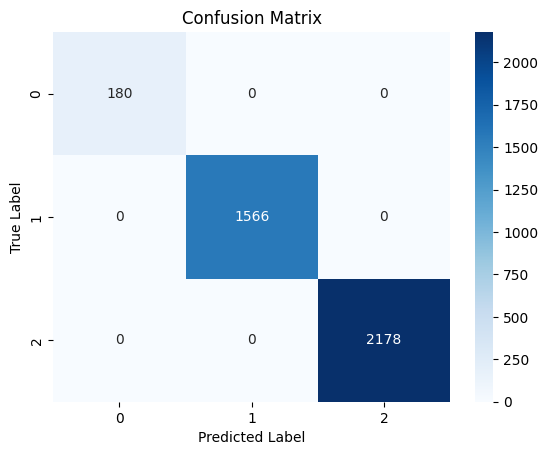

In [217]:
# 5. 可视化分类结果的混淆矩阵
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### 5.5 LDA降维处理后的GSE137140数据集

1. 提取数据集中的特征和标签，划分数据集。

In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV

# 1. 提取数据集中的特征和标签，创建SVM分类器
X = data137140_lda # 将降维后的数据作为特征
y = data137140['disease state'] # 将disease state列的值作为标签

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 将数据集划分为训练集和测试集

2. 调参
- 网格搜索

In [219]:
# 2. 使用网格搜索进行参数调优
from sklearn.metrics import accuracy_score

# 定义超参数的范围
param_grid = {'C': [0.01, 0.1, 1, 10],
              'gamma': [0.0001, 0.001, 0.01, 0.1]}

svm = SVC() # 创建SVM分类器
grid_search = GridSearchCV(svm, param_grid, cv=5) # 创建网格搜索对象

grid_search.fit(X_train, y_train) # 使用网格搜索对象对数据进行拟合

# 获取最佳参数
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# 训练最佳参数的SVM分类器
svm_best = SVC(**best_params)
svm_best.fit(X_train, y_train)

# 预测测试集数据
y_pred = svm_best.predict(X_test)

# 打印准确率等评估指标
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best parameters: {'C': 0.01, 'gamma': 0.001}
Accuracy: 1.0


- 分析结果可知：Best parameters: {'C': 0.01, 'gamma': 0.001}

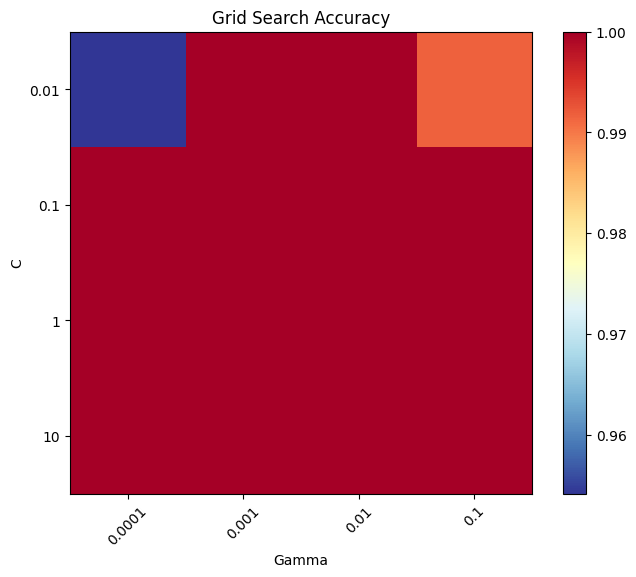

In [220]:
# 3. 可视化网格搜索调参结果
scores = grid_search.cv_results_['mean_test_score']
scores = np.array(scores).reshape(len(param_grid['C']), len(param_grid['gamma']))

# 绘制热力图
plt.figure(figsize=(8, 6))
plt.imshow(scores, cmap=plt.cm.RdYlBu_r)
plt.colorbar()
plt.xticks(np.arange(len(param_grid['gamma'])), param_grid['gamma'], rotation=45)
plt.yticks(np.arange(len(param_grid['C'])), param_grid['C'])
plt.xlabel('Gamma')
plt.ylabel('C')
plt.title('Grid Search Accuracy')
plt.show()

3. 根据Best parameters: {'C': 0.01, 'gamma': 0.001}进行SVM分类。 

In [221]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import seaborn as sns

# 4. 使用最优参数构建SVM分类器并打印评估指标

svm = SVC(C=0.01, gamma=0.001) # 创建 SVM 分类器对象
svm.fit(X_train, y_train) # 使用训练集进行训练
y_pred = svm.predict(X_test) # 使用测试集进行预测

warnings.filterwarnings("ignore", category=UserWarning) # 忽略precision计算时的警告
# 打印评估指标
print("SVM Classification Report:")
print(classification_report(y_test, y_pred)) # 打印分类报告
print("Accuracy:", accuracy_score(y_test, y_pred)) # 计算并打印accuracy
print("Precision:", precision_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印precision
print("Recall:", recall_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印recall
print("F1-score:", f1_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印F1-score

SVM Classification Report:
                             precision    recall  f1-score   support

Lung cancer, post-operation       1.00      1.00      1.00        38
 Lung cancer, pre-operation       1.00      1.00      1.00       315
         Non-cancer control       1.00      1.00      1.00       432

                   accuracy                           1.00       785
                  macro avg       1.00      1.00      1.00       785
               weighted avg       1.00      1.00      1.00       785

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


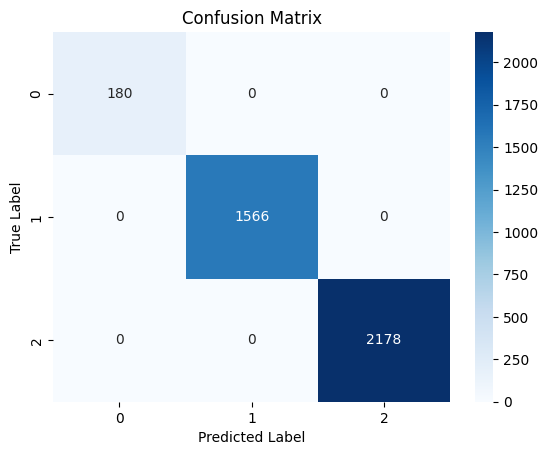

In [222]:
# 5. 可视化分类结果的混淆矩阵
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### 5.6 SVM算法总结

- 由于SVM是借助二次规划来求解支持向量，而求解二次规划将涉及m阶矩阵的计算（m为样本的个数），<mark>当m数目很大时该矩阵的存储和计算将耗费大量的机器内存和运算时间。实际运行时间也证明了这一点。(PCA降维后的GSE137140数据集网格搜索跑了六分半)</mark>
- 当使用网格搜索对SVM分类器的超参数进行调优时，发现了超参数值与训练数据过拟合，结果精度很高（为1），但在新数据上表现不佳。因此，在训练集上获得高准确率分数并不一定意味着模型在测试集或真实世界数据上表现良好。

## 六、决策树分类算法
### 6.1 决策树算法基础
- 概念：决策树分类算法是一种基于树结构的监督学习算法，用于解决分类问题。它通过构建一棵决策树来对输入数据进行分类，每个决策树节点表示一个特征，每个分支代表一个特征取值，而叶节点代表一个类别。

- 原理：决策树算法基于特征选择和决策树生成的原理。它通过对特征空间的划分，使得每个划分区域内的样本都属于同一类别。

- 步骤：
    - 特征选择：根据某个准则（如信息增益、基尼系数等），选择最佳的特征作为当前节点的划分特征。
    - 决策树生成：根据选择的特征划分数据集，并递归地生成子节点，直到满足终止条件（如节点中的样本属于同一类别或达到树的最大深度）。
    - 决策树修剪：对生成的决策树进行修剪，以防止过拟合。

### 6.2 PCA降维处理后的GSE73002数据集

1. 提取数据集中的特征和标签，创建决策树分类器

In [223]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# 1. 提取数据集中的特征和标签，创建决策树分类器
X = data73002_pca
y = data73002['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier() # 创建决策树分类器

2. 调参
- 网格搜索

In [224]:
# 2. 使用网格搜索进行参数调优
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(clf, param_grid, cv=5) # 创建网格搜索对象
grid_search.fit(X_train, y_train) # 使用网格搜索对象对数据进行拟合

print("Best params: ", grid_search.best_params_) # 打印最佳参数
print("Best score: ", grid_search.best_score_) # 打印最佳准确率

y_pred = grid_search.predict(X_test) # 使用测试集进行预测

accuracy = accuracy_score(y_test, y_pred) # 计算准确率
print("Accuracy: ", accuracy) # 打印准确率


Best params:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best score:  0.9554259553559712
Accuracy:  0.937733499377335


3. 可视化网格搜索调参结果
- 分析结果可知：网格搜索得到的结果为：{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}

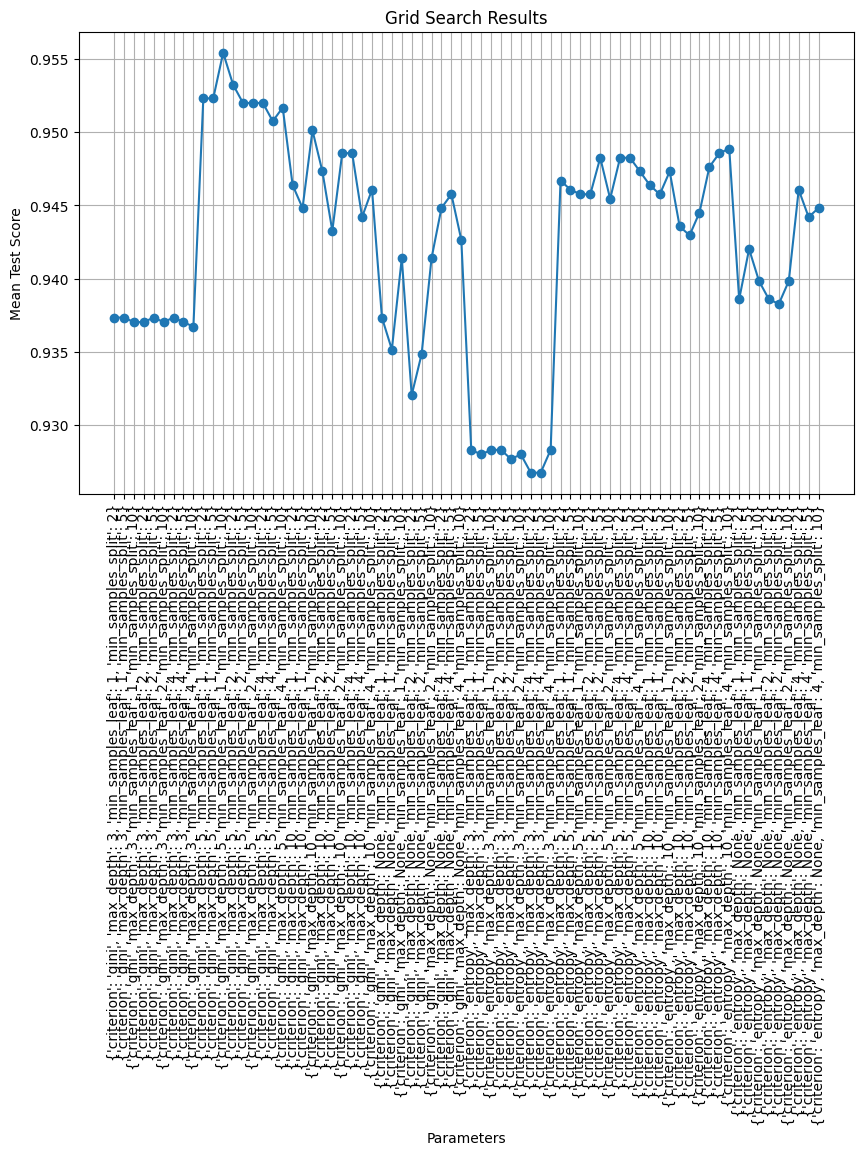

In [225]:
# 3. 可视化网格搜索调参结果
mean_scores = grid_search.cv_results_['mean_test_score'] # 获取平均准确率
params = grid_search.cv_results_['params'] # 获取参数

plt.figure(figsize=(10, 6))
plt.plot(range(len(mean_scores)), mean_scores, marker='o')
plt.xticks(range(len(mean_scores)), params, rotation=90)
plt.xlabel('Parameters')
plt.ylabel('Mean Test Score')
plt.title('Grid Search Results')
plt.grid(True)
plt.show()

4. 将网格搜索所得的{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}作为参数构建决策树。

In [227]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 4. 使用最优参数构建决策树分类器并打印评估指标
dt = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=1, min_samples_split=10) # 创建决策树分类器

dt.fit(X_train, y_train) # 在训练集上进行拟合
y_pred = dt.predict(X_test) # 在测试集上进行预测

print(classification_report(y_test, y_pred)) # 打印评估指标
print("Accuracy:", accuracy_score(y_test, y_pred)) # 计算并打印accuracy
print("Precision:", precision_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印precision
print("Recall:", recall_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印recall
print("F1-score:", f1_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印F1-score

                       precision    recall  f1-score   support

benign breast disease       0.00      0.00      0.00        12
        breast cancer       0.89      0.93      0.91       273
           non-cancer       0.96      0.97      0.96       496
     prostate disease       1.00      0.86      0.93        22

             accuracy                           0.94       803
            macro avg       0.71      0.69      0.70       803
         weighted avg       0.92      0.94      0.93       803

Accuracy: 0.937733499377335
Precision: 0.9630711095843353
Recall: 0.6908570260384777
F1-score: 0.7005742067293352


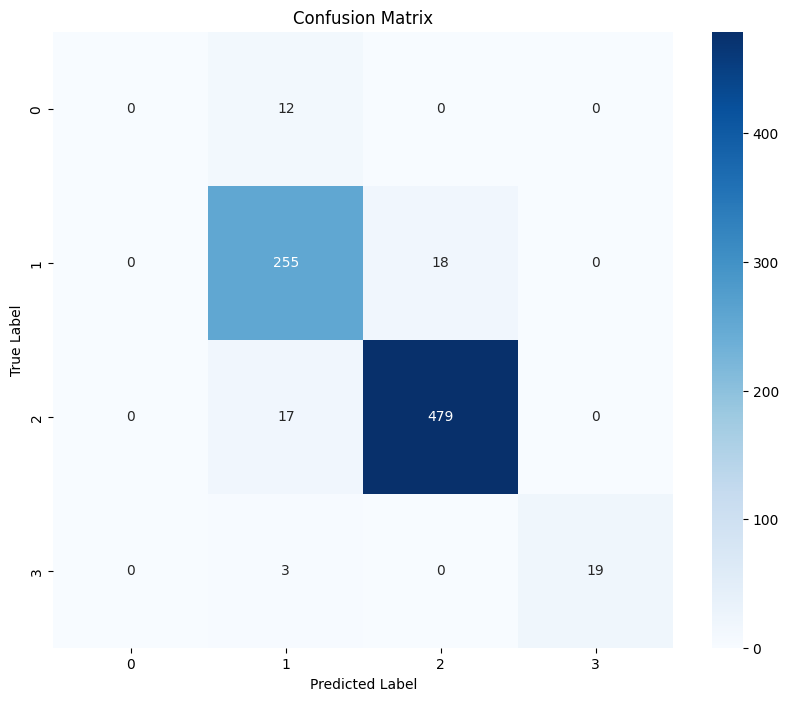

In [228]:
# 5. 可视化分类结果的混淆矩阵
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### 6.3 LDA降维处理后的GSE73002数据集

1. 提取数据集中的特征和标签，创建决策树分类器

In [229]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# 1. 提取数据集中的特征和标签，创建决策树分类器
X = data73002_lda
y = data73002['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier() # 创建决策树分类器

2. 调参
- 网格搜索

In [230]:
# 2. 使用网格搜索进行参数调优
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(clf, param_grid, cv=5) # 创建网格搜索对象
grid_search.fit(X_train, y_train) # 使用网格搜索对象对数据进行拟合
print("Best params: ", grid_search.best_params_) # 打印最佳参数
print("Best score: ", grid_search.best_score_) # 打印最佳准确率

y_pred = grid_search.predict(X_test) # 使用测试集进行预测
accuracy = accuracy_score(y_test, y_pred) # 计算准确率
print("Accuracy: ", accuracy) # 打印准确率

Best params:  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score:  1.0
Accuracy:  1.0


3. 可视化网格搜索调参结果
- 分析结果可知：网格搜索得到的结果为：{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

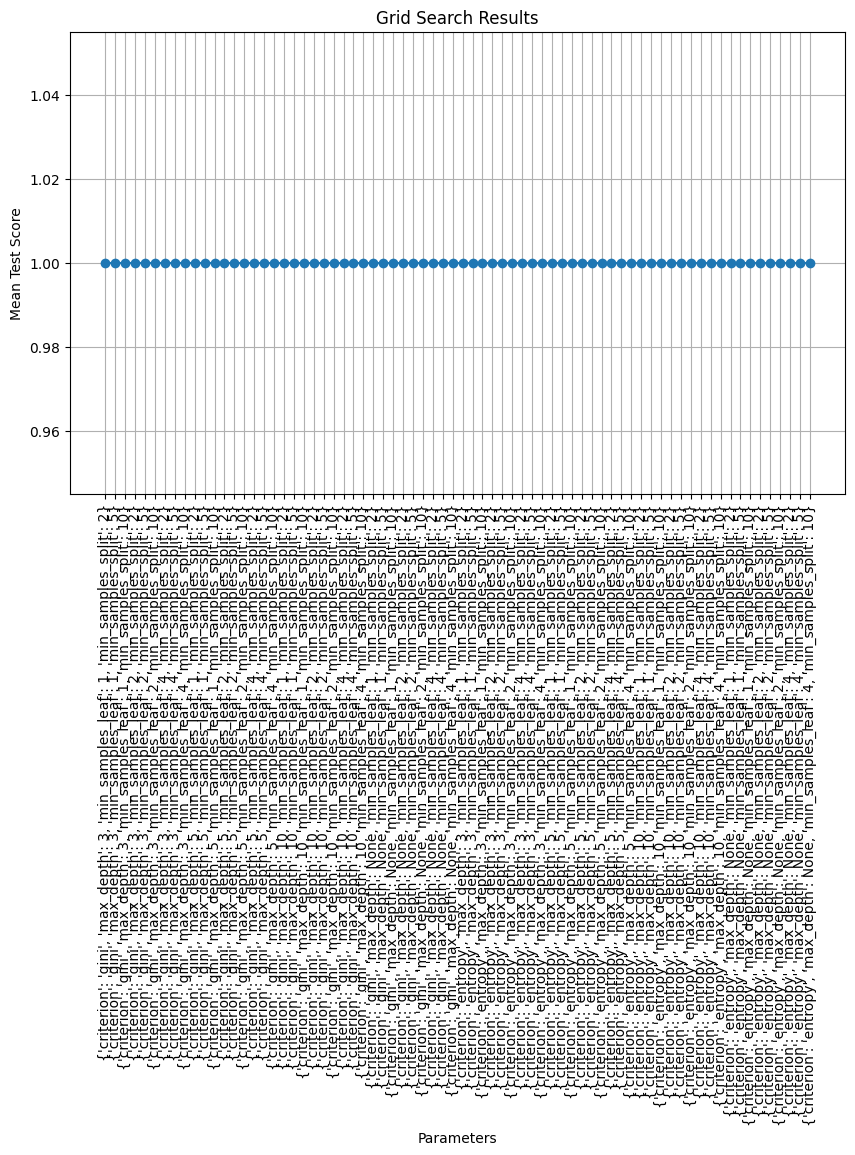

In [231]:
# 3. 可视化网格搜索调参结果
mean_scores = grid_search.cv_results_['mean_test_score'] # 获取平均准确率
params = grid_search.cv_results_['params'] # 获取参数

plt.figure(figsize=(10, 6))
plt.plot(range(len(mean_scores)), mean_scores, marker='o')
plt.xticks(range(len(mean_scores)), params, rotation=90)
plt.xlabel('Parameters')
plt.ylabel('Mean Test Score')
plt.title('Grid Search Results')
plt.grid(True)
plt.show()

4. 将网格搜索所得的{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}作为参数构建决策树。

In [232]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 4. 使用最优参数构建决策树分类器并打印评估指标
dt = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=1, min_samples_split=2) # 创建决策树分类器

dt.fit(X_train, y_train) # 在训练集上进行拟合
y_pred = dt.predict(X_test) # 在测试集上进行预测

warnings.filterwarnings("ignore", category=UserWarning) # 忽略precision计算时的警告
print(classification_report(y_test, y_pred)) # 打印评估指标
print("Accuracy:", accuracy_score(y_test, y_pred)) # 计算并打印accuracy
print("Precision:", precision_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印precision
print("Recall:", recall_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印recall
print("F1-score:", f1_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印F1-score

                       precision    recall  f1-score   support

benign breast disease       1.00      1.00      1.00        12
        breast cancer       1.00      1.00      1.00       273
           non-cancer       1.00      1.00      1.00       496
     prostate disease       1.00      1.00      1.00        22

             accuracy                           1.00       803
            macro avg       1.00      1.00      1.00       803
         weighted avg       1.00      1.00      1.00       803

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


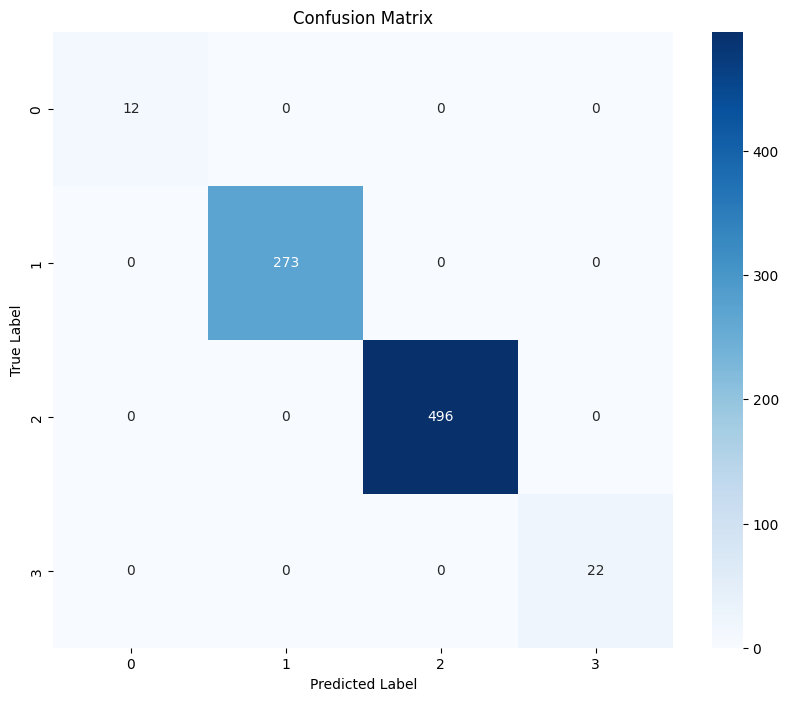

In [233]:
# 5. 可视化分类结果的混淆矩阵
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### 6.4 PCA降维处理后的GSE137140数据集

1. 提取数据集中的特征和标签，创建决策树分类器

In [234]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# 1. 提取数据集中的特征和标签，创建决策树分类器
X = data137140_pca
y = data137140['disease state']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier() # 创建决策树分类器

2. 调参
- 网格搜索

In [235]:
# 2. 使用网格搜索进行参数调优
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(clf, param_grid, cv=5) # 创建网格搜索对象
grid_search.fit(X_train, y_train) # 使用网格搜索对象对数据进行拟合
print("Best params: ", grid_search.best_params_) # 打印最佳参数
print("Best score: ", grid_search.best_score_) # 打印最佳准确率


y_pred = grid_search.predict(X_test) # 使用测试集进行预测
accuracy = accuracy_score(y_test, y_pred) # 计算准确率
print("Accuracy: ", accuracy) # 打印准确率

Best params:  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best score:  0.9334186653663691
Accuracy:  0.9388535031847134


3. 可视化网格搜索调参结果
- 分析结果可知：网格搜索得到的结果为：{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}

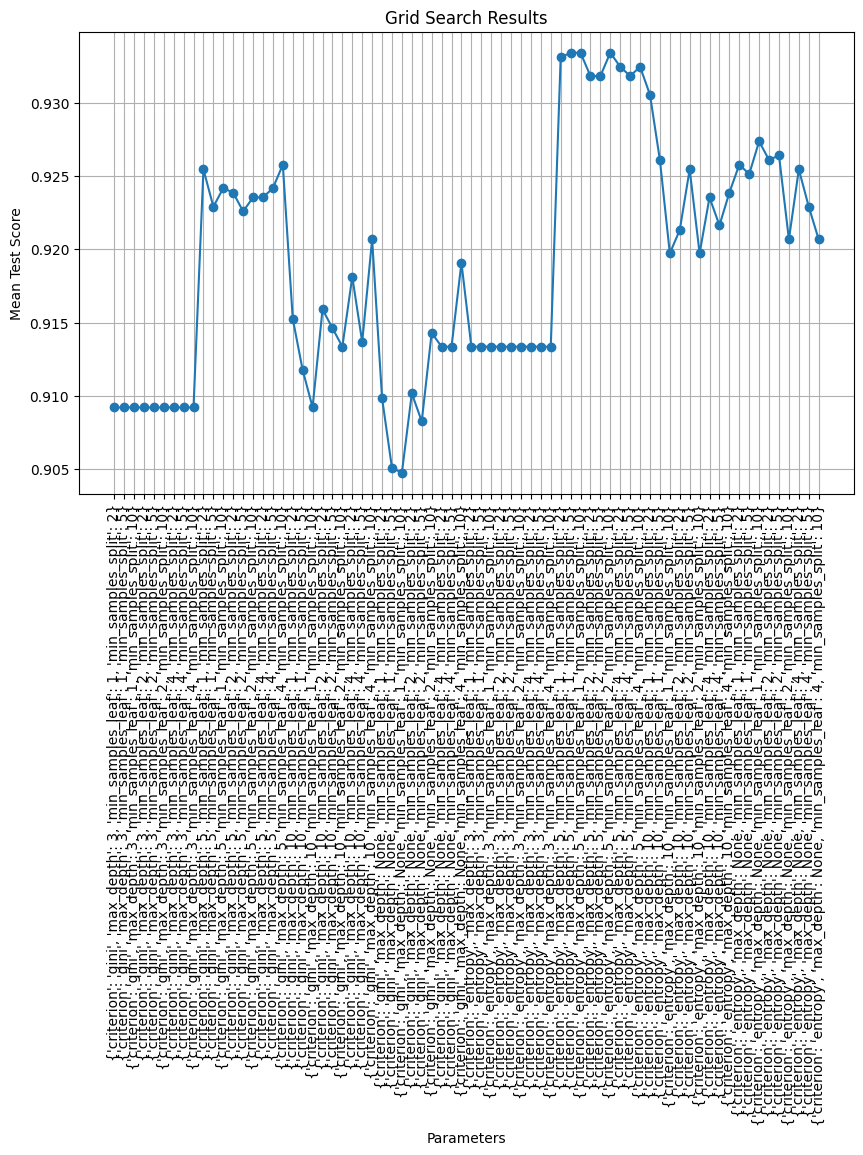

In [236]:
# 3. 可视化网格搜索调参结果
mean_scores = grid_search.cv_results_['mean_test_score'] # 获取平均准确率
params = grid_search.cv_results_['params'] # 获取参数

plt.figure(figsize=(10, 6))
plt.plot(range(len(mean_scores)), mean_scores, marker='o')
plt.xticks(range(len(mean_scores)), params, rotation=90)
plt.xlabel('Parameters')
plt.ylabel('Mean Test Score')
plt.title('Grid Search Results')
plt.grid(True)
plt.show()

4. 将网格搜索所得的{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}作为参数构建决策树。

In [237]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 4. 使用最优参数构建决策树分类器并打印评估指标
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2, min_samples_split=10) # 创建决策树分类器

dt.fit(X_train, y_train) # 在训练集上进行拟合
y_pred = dt.predict(X_test) # 在测试集上进行预测

print(classification_report(y_test, y_pred)) # 打印评估指标
print("Accuracy:", accuracy_score(y_test, y_pred)) # 计算并打印accuracy
print("Precision:", precision_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印precision
print("Recall:", recall_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印recall
print("F1-score:", f1_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印F1-score


                             precision    recall  f1-score   support

Lung cancer, post-operation       1.00      0.95      0.97        38
 Lung cancer, pre-operation       0.92      0.93      0.93       315
         Non-cancer control       0.94      0.94      0.94       432

                   accuracy                           0.94       785
                  macro avg       0.96      0.94      0.95       785
               weighted avg       0.94      0.94      0.94       785

Accuracy: 0.9388535031847134
Precision: 0.9562448884215445
Recall: 0.9406571985519353
F1-score: 0.9482108690969451


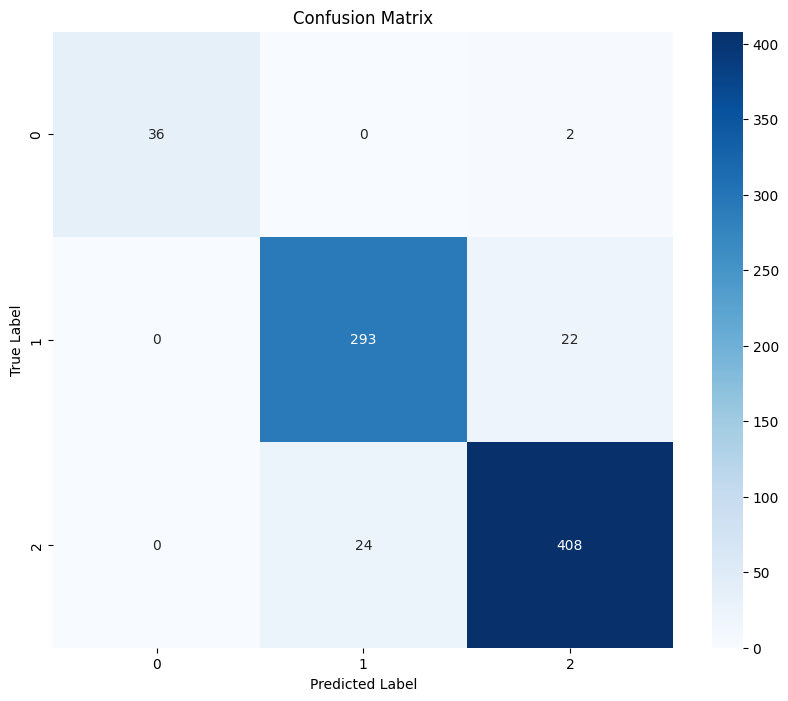

In [238]:
# 5. 可视化分类结果的混淆矩阵
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### 6.5 LDA降维处理后的GSE137140数据集

1. 提取数据集中的特征和标签，创建决策树分类器

In [239]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# 1. 提取数据集中的特征和标签，创建决策树分类器
X = data137140_lda
y = data137140['disease state']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier() # 创建决策树分类器

2. 调参
- 网格搜索

In [240]:
# 2. 使用网格搜索进行参数调优
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(clf, param_grid, cv=5) # 创建网格搜索对象
grid_search.fit(X_train, y_train) # 使用网格搜索对象对数据进行拟合
print("Best params: ", grid_search.best_params_) # 打印最佳参数
print("Best score: ", grid_search.best_score_) # 打印最佳准确率


y_pred = grid_search.predict(X_test) # 使用测试集进行预测
accuracy = accuracy_score(y_test, y_pred) # 计算准确率
print("Accuracy: ", accuracy) # 打印准确率

Best params:  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score:  1.0
Accuracy:  1.0


3. 可视化网格搜索调参结果
- 分析结果可知：网格搜索得到的结果为：{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

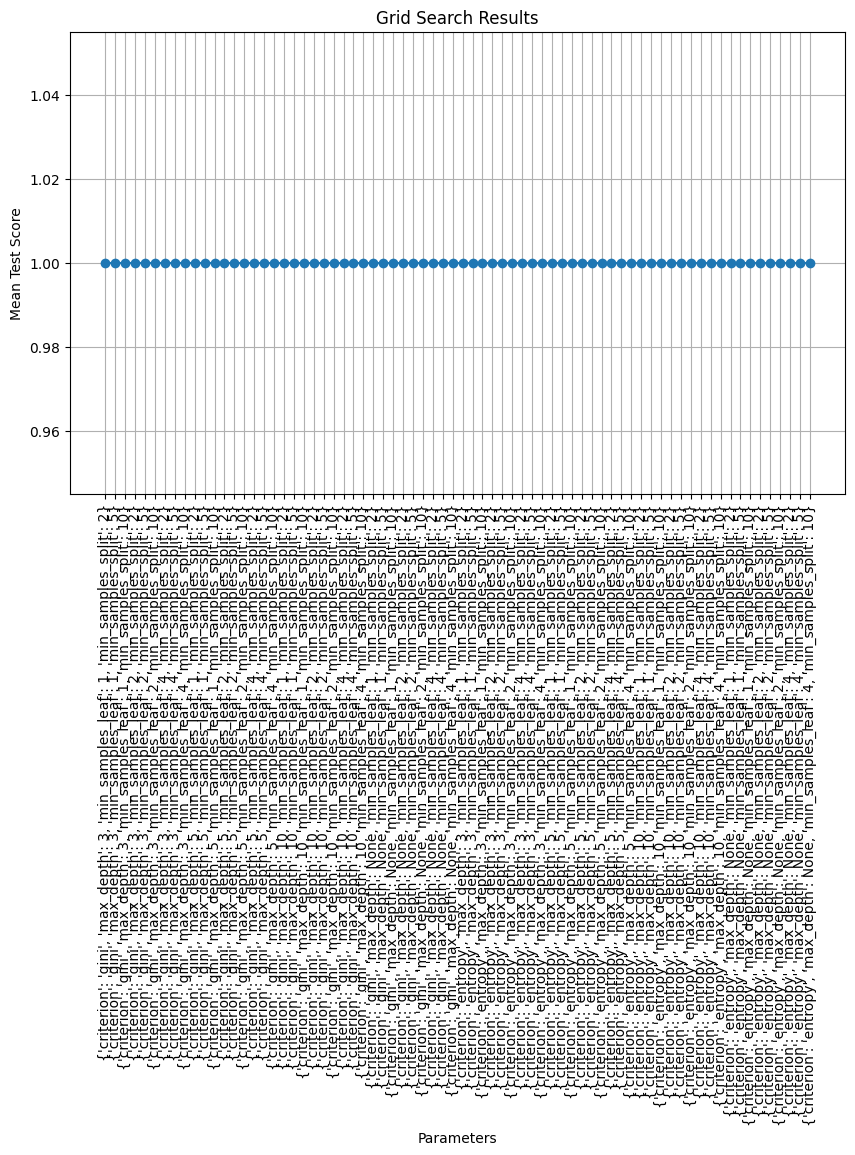

In [241]:
# 3. 可视化网格搜索调参结果
mean_scores = grid_search.cv_results_['mean_test_score'] # 获取平均准确率
params = grid_search.cv_results_['params'] # 获取参数

plt.figure(figsize=(10, 6))
plt.plot(range(len(mean_scores)), mean_scores, marker='o')
plt.xticks(range(len(mean_scores)), params, rotation=90)
plt.xlabel('Parameters')
plt.ylabel('Mean Test Score')
plt.title('Grid Search Results')
plt.grid(True)
plt.show()

4. 将网格搜索所得的{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}作为参数构建决策树。

In [242]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 4. 使用最优参数构建决策树分类器并打印评估指标
dt = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=1, min_samples_split=2) # 创建决策树分类器

dt.fit(X_train, y_train) # 在训练集上进行拟合
y_pred = dt.predict(X_test) # 在测试集上进行预测

print(classification_report(y_test, y_pred)) # 打印评估指标
print("Accuracy:", accuracy_score(y_test, y_pred)) # 计算并打印accuracy
print("Precision:", precision_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印precision
print("Recall:", recall_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印recall
print("F1-score:", f1_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印F1-score

                             precision    recall  f1-score   support

Lung cancer, post-operation       1.00      1.00      1.00        38
 Lung cancer, pre-operation       1.00      1.00      1.00       315
         Non-cancer control       1.00      1.00      1.00       432

                   accuracy                           1.00       785
                  macro avg       1.00      1.00      1.00       785
               weighted avg       1.00      1.00      1.00       785

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


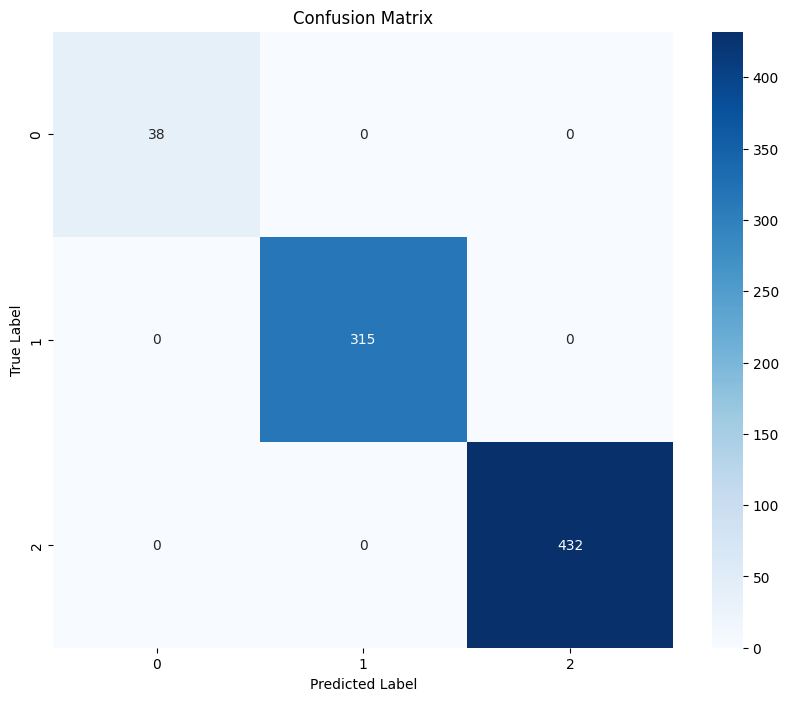

In [243]:
# 5. 可视化分类结果的混淆矩阵
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### 6.6 决策树算法总结
- 处理非线性关系：决策树能够处理非线性关系，对于非线性问题效果较好。
- 决策树算法容易产生过拟合的问题，特别是在处理高维数据或包含大量特征的数据时。决策树算法容易产生过拟合的问题是因为决策树容易过于复杂，并且能够完美地适应训练数据。当决策树的深度过大或者叶子节点过少时，很容易出现过拟合现象，即模型在训练集上的表现很好，但是在测试集上的性能却很差。这是因为决策树在训练过程中可能会对一些噪声或者非常规数据进行过度拟合，导致模型的泛化能力变得很差。比如在LDA降维处理后的数据集上都存在过拟合问题。

## 七、朴素贝叶斯分类算法
### 7.1 朴素贝叶斯算法基础
- 概念：朴素贝叶斯分类算法是一种基于概率统计的监督学习算法，用于解决分类问题。它基于贝叶斯定理和特征之间的条件独立性假设，通过计算后验概率来进行分类。

- 原理：朴素贝叶斯算法假设特征之间相互独立，即每个特征对于分类的贡献是相互独立的。根据贝叶斯定理，通过计算先验概率和条件概率，可以得到后验概率，并将后验概率最大的类别作为分类结果。

- 步骤:
    - 特征选择：根据具体问题选择合适的特征作为输入。
    - 数据预处理：对数据进行清洗、处理缺失值、归一化等操作。
    - 计算先验概率：根据训练集中每个类别的样本数量计算先验概率，即每个类别出现的概率。
    - 计算条件概率：对于每个特征，计算在给定类别下该特征的条件概率，即特征值在该类别下出现的概率。
    - 根据贝叶斯定理计算后验概率：对于新样本，根据先验概率和条件概率计算后验概率，并选择具有最大后验概率的类别作为分类结果。

### 7.2 PCA降维处理后的GSE73002数据集

1. 提取数据集中的特征和标签，创建朴素贝叶斯分类器

In [244]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 提取数据集中的特征和标签，创建朴素贝叶斯分类器
X = data73002_pca
y = data73002['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb = GaussianNB() # 创建朴素贝叶斯分类器

2. 调参
- 网格搜索

In [245]:
# 2. 使用网格搜索进行参数调优
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]} # 定义超参数的范围

grid_search = GridSearchCV(nb, param_grid, cv=5) # 创建网格搜索对象
grid_search.fit(X_train, y_train) # 使用网格搜索对象对数据进行拟合

# 打印最佳参数
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'var_smoothing': 1e-07}


3. 可视化网格搜索调参结果
- 分析结果可知：网格搜索得到的结果为：{'var_smoothing': 1e-07}

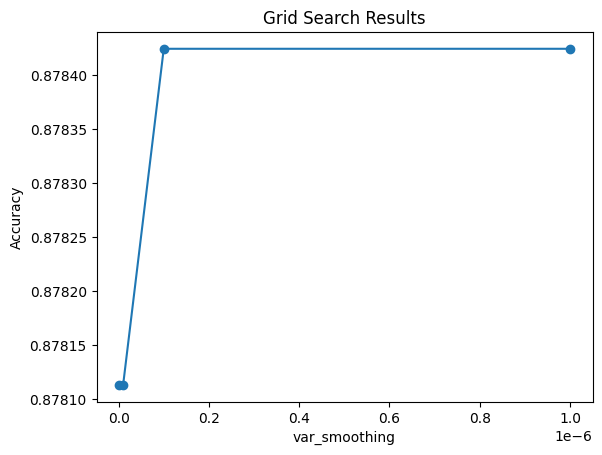

In [246]:
# 3. 可视化网格搜索调参结果
param_values = [param['var_smoothing'] for param in grid_search.cv_results_['params']] # 获取超参数的值
accuracy_scores = grid_search.cv_results_['mean_test_score'] # 获取平均准确率

# 可视化调参结果
plt.plot(param_values, accuracy_scores, '-o')
plt.xlabel('var_smoothing')
plt.ylabel('Accuracy')
plt.title('Grid Search Results')
plt.show()

4. 将网格搜索所得的{'var_smoothing': 1e-07}作为参数构建贝叶斯分类器。

In [247]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 4. 使用最优参数构建朴素贝叶斯分类器并打印评估指标
nb = GaussianNB(var_smoothing=1e-07) # 创建朴素贝叶斯分类器

nb.fit(X_train, y_train) # 在训练集上进行拟合
y_pred = nb.predict(X_test) # 在测试集上进行预测

print(classification_report(y_test, y_pred)) # 打印评估指标
print("Accuracy:", accuracy_score(y_test, y_pred)) # 计算并打印accuracy
print("Precision:", precision_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印precision
print("Recall:", recall_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印recall
print("F1-score:", f1_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印F1-score

                       precision    recall  f1-score   support

benign breast disease       0.00      0.00      0.00        12
        breast cancer       0.78      0.89      0.83       273
           non-cancer       0.93      0.88      0.90       496
     prostate disease       1.00      1.00      1.00        22

             accuracy                           0.87       803
            macro avg       0.68      0.69      0.68       803
         weighted avg       0.87      0.87      0.87       803

Accuracy: 0.8729763387297634
Precision: 0.678239688769538
Recall: 0.6918738183859152
F1-score: 0.6840942562592047


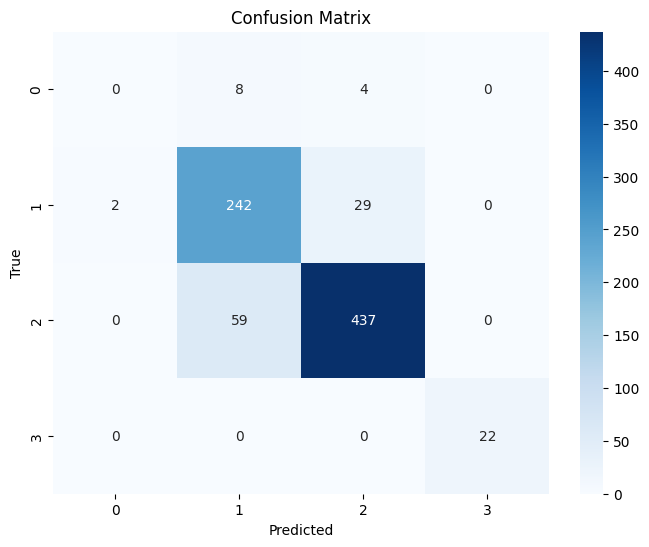

In [248]:
# 5. 可视化分类结果的混淆矩阵
cm = confusion_matrix(y_test, y_pred) # 计算混淆矩阵
# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


### 7.3 LDA降维处理后的GSE73002数据集

1. 提取数据集中的特征和标签，创建朴素贝叶斯分类器

In [249]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 提取数据集中的特征和标签，创建朴素贝叶斯分类器
X = data73002_lda
y = data73002['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb = GaussianNB() # 创建朴素贝叶斯分类器

2. 调参
- 网格搜索

In [250]:
# 2. 使用网格搜索进行参数调优
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]} # 定义超参数的范围

grid_search = GridSearchCV(nb, param_grid, cv=5) # 创建网格搜索对象
grid_search.fit(X_train, y_train) # 使用网格搜索对象对数据进行拟合

# 打印最佳参数
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'var_smoothing': 1e-09}


3. 可视化网格搜索调参结果
- 分析结果可知：网格搜索得到的结果为：{'var_smoothing': 1e-09}

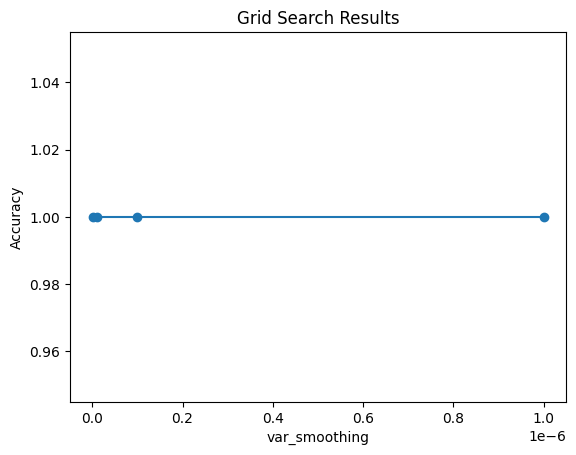

In [251]:
# 3. 可视化网格搜索调参结果
param_values = [param['var_smoothing'] for param in grid_search.cv_results_['params']] # 获取超参数的值
accuracy_scores = grid_search.cv_results_['mean_test_score'] # 获取平均准确率

# 可视化调参结果
plt.plot(param_values, accuracy_scores, '-o')
plt.xlabel('var_smoothing')
plt.ylabel('Accuracy')
plt.title('Grid Search Results')
plt.show()

4. 将网格搜索所得的{'var_smoothing': 1e-09}作为参数构建贝叶斯分类器。

In [252]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 4. 使用最优参数构建朴素贝叶斯分类器并打印评估指标
nb = GaussianNB(var_smoothing=1e-09) # 创建朴素贝叶斯分类器

nb.fit(X_train, y_train) # 在训练集上进行拟合
y_pred = nb.predict(X_test) # 在测试集上进行预测

print(classification_report(y_test, y_pred)) # 打印评估指标
print("Accuracy:", accuracy_score(y_test, y_pred)) # 计算并打印accuracy
print("Precision:", precision_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印precision
print("Recall:", recall_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印recall
print("F1-score:", f1_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印F1-score

                       precision    recall  f1-score   support

benign breast disease       1.00      1.00      1.00        12
        breast cancer       1.00      1.00      1.00       273
           non-cancer       1.00      1.00      1.00       496
     prostate disease       1.00      1.00      1.00        22

             accuracy                           1.00       803
            macro avg       1.00      1.00      1.00       803
         weighted avg       1.00      1.00      1.00       803

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


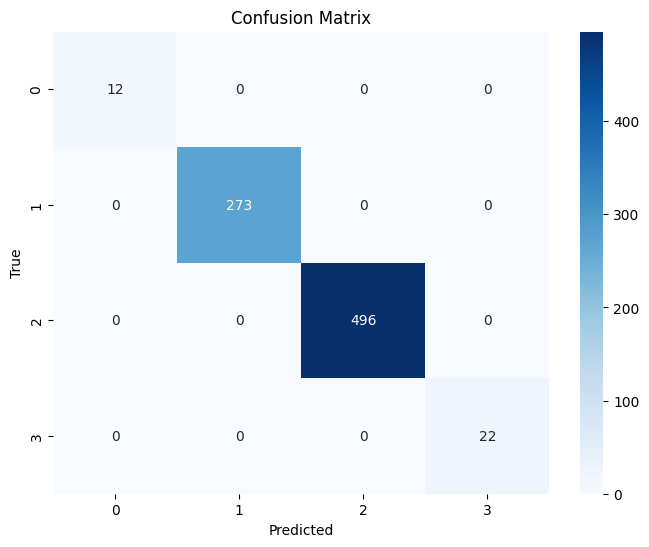

In [253]:
# 5. 可视化分类结果的混淆矩阵
cm = confusion_matrix(y_test, y_pred) # 计算混淆矩阵
# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### 7.4 PCA降维处理后的GSE137140数据集

1. 提取数据集中的特征和标签，创建朴素贝叶斯分类器

In [254]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 提取数据集中的特征和标签，创建朴素贝叶斯分类器
X = data137140_pca
y = data137140['disease state']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb = GaussianNB() # 创建朴素贝叶斯分类器

2. 调参
- 网格搜索

In [255]:
# 2. 使用网格搜索进行参数调优
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]} # 定义超参数的范围

grid_search = GridSearchCV(nb, param_grid, cv=5) # 创建网格搜索对象
grid_search.fit(X_train, y_train) # 使用网格搜索对象对数据进行拟合

# 打印最佳参数
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'var_smoothing': 1e-09}


3. 可视化网格搜索调参结果
- 分析结果可知：网格搜索得到的结果为：{'var_smoothing': 1e-09}

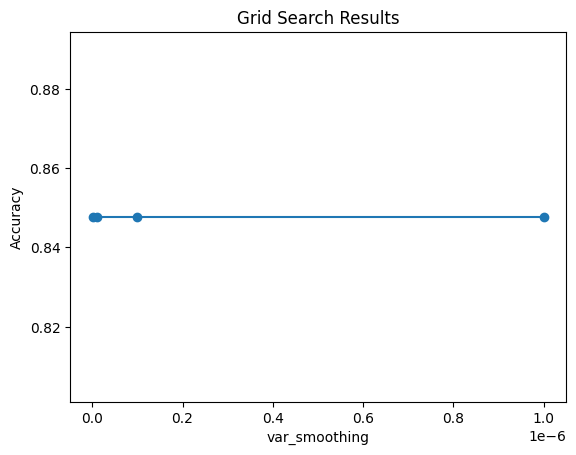

In [256]:
# 3. 可视化网格搜索调参结果
param_values = [param['var_smoothing'] for param in grid_search.cv_results_['params']] # 获取超参数的值
accuracy_scores = grid_search.cv_results_['mean_test_score'] # 获取平均准确率

# 可视化调参结果
plt.plot(param_values, accuracy_scores, '-o')
plt.xlabel('var_smoothing')
plt.ylabel('Accuracy')
plt.title('Grid Search Results')
plt.show()

4. 将网格搜索所得的{'var_smoothing': 1e-09}作为参数构建贝叶斯分类器。

In [257]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 4. 使用最优参数构建朴素贝叶斯分类器并打印评估指标
nb = GaussianNB(var_smoothing=1e-06) # 创建朴素贝叶斯分类器

nb.fit(X_train, y_train) # 在训练集上进行拟合
y_pred = nb.predict(X_test) # 在测试集上进行预测

print(classification_report(y_test, y_pred)) # 打印评估指标
print("Accuracy:", accuracy_score(y_test, y_pred)) # 计算并打印accuracy
print("Precision:", precision_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印precision
print("Recall:", recall_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印recall
print("F1-score:", f1_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印F1-score

                             precision    recall  f1-score   support

Lung cancer, post-operation       1.00      0.95      0.97        38
 Lung cancer, pre-operation       0.80      0.82      0.81       315
         Non-cancer control       0.87      0.86      0.86       432

                   accuracy                           0.85       785
                  macro avg       0.89      0.87      0.88       785
               weighted avg       0.85      0.85      0.85       785

Accuracy: 0.845859872611465
Precision: 0.8892509248888437
Recall: 0.8742991738605773
F1-score: 0.8814956302067561


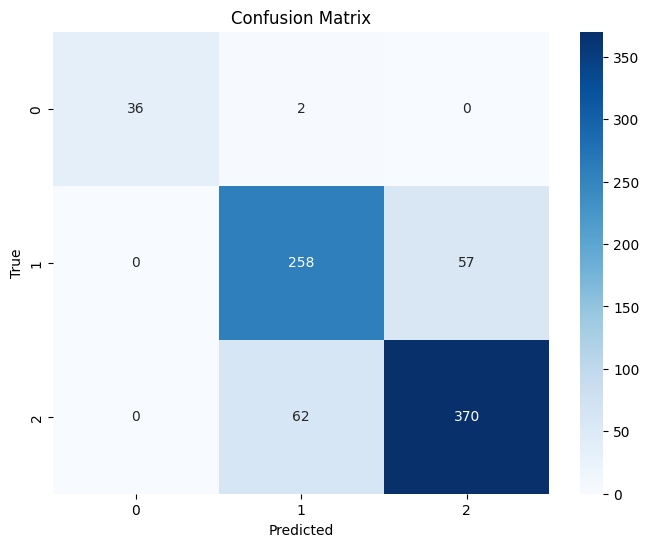

In [258]:
# 5. 可视化分类结果的混淆矩阵
cm = confusion_matrix(y_test, y_pred) # 计算混淆矩阵
# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### 7.5 LDA降维处理后的GSE137140数据集

1. 提取数据集中的特征和标签，创建朴素贝叶斯分类器

In [259]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 提取数据集中的特征和标签，创建朴素贝叶斯分类器
X = data137140_lda
y = data137140['disease state']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb = GaussianNB() # 创建朴素贝叶斯分类器

2. 调参
- 网格搜索

In [260]:
# 2. 使用网格搜索进行参数调优
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]} # 定义超参数的范围

grid_search = GridSearchCV(nb, param_grid, cv=5) # 创建网格搜索对象
grid_search.fit(X_train, y_train) # 使用网格搜索对象对数据进行拟合

# 打印最佳参数
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'var_smoothing': 1e-09}


3. 可视化网格搜索调参结果
- 分析结果可知：网格搜索得到的结果为：{'var_smoothing': 1e-09}

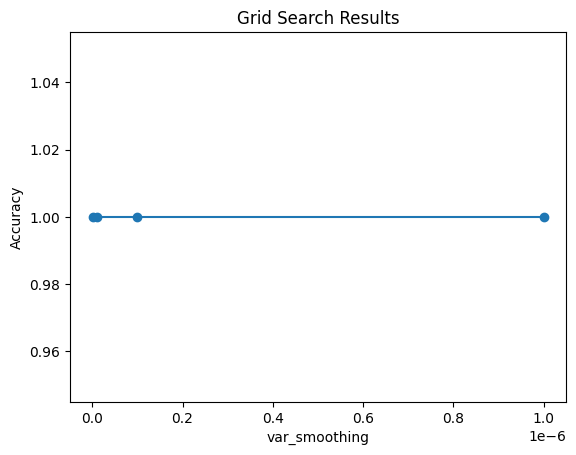

In [261]:
# 3. 可视化网格搜索调参结果
param_values = [param['var_smoothing'] for param in grid_search.cv_results_['params']] # 获取超参数的值
accuracy_scores = grid_search.cv_results_['mean_test_score'] # 获取平均准确率

# 可视化调参结果
plt.plot(param_values, accuracy_scores, '-o')
plt.xlabel('var_smoothing')
plt.ylabel('Accuracy')
plt.title('Grid Search Results')
plt.show()

4. 将网格搜索所得的{'var_smoothing': 1e-09}作为参数构建贝叶斯分类器。

In [262]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 4. 使用最优参数构建朴素贝叶斯分类器并打印评估指标
nb = GaussianNB(var_smoothing=1e-09) # 创建朴素贝叶斯分类器

nb.fit(X_train, y_train) # 在训练集上进行拟合
y_pred = nb.predict(X_test) # 在测试集上进行预测

print(classification_report(y_test, y_pred)) # 打印评估指标
print("Accuracy:", accuracy_score(y_test, y_pred)) # 计算并打印accuracy
print("Precision:", precision_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印precision
print("Recall:", recall_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印recall
print("F1-score:", f1_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印F1-score

                             precision    recall  f1-score   support

Lung cancer, post-operation       1.00      1.00      1.00        38
 Lung cancer, pre-operation       1.00      1.00      1.00       315
         Non-cancer control       1.00      1.00      1.00       432

                   accuracy                           1.00       785
                  macro avg       1.00      1.00      1.00       785
               weighted avg       1.00      1.00      1.00       785

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


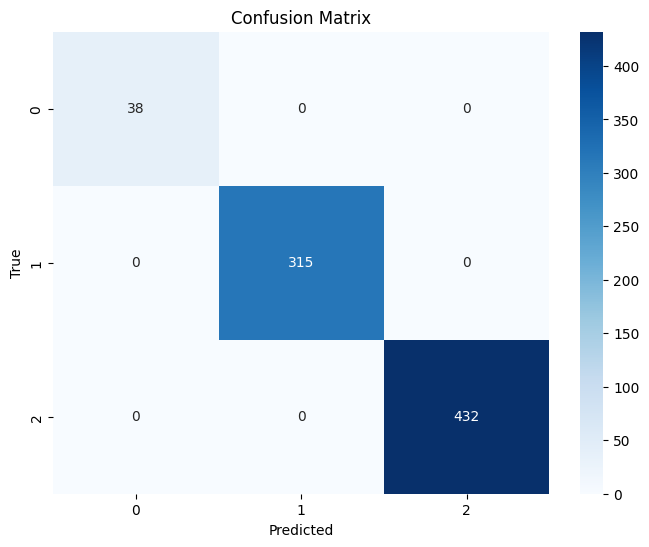

In [263]:
# 5. 可视化分类结果的混淆矩阵
cm = confusion_matrix(y_test, y_pred) # 计算混淆矩阵
# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### 7.6 朴素贝叶斯算法总结

- 朴素贝叶斯算法对特征之间的条件独立性假设较强，因此在处理存在强相关性的特征时，其性能会受到影响。

- 适用于高维数据：朴素贝叶斯算法在处理高维数据时表现良好。由于假设特征之间相互独立，它可以处理大量的特征变量而不会受到维度灾难的影响。

- 处理缺失数据：朴素贝叶斯算法可以处理缺失数据。由于特征之间的独立性假设，即使某个特征的值缺失，仍然可以使用其他特征的信息进行分类。

## 八、逻辑回归分类算法
### 8.1 逻辑回归算法基础
- 概念:逻辑回归是一种用于解决二分类问题的统计学习方法，它通过建立一个逻辑回归模型来预测样本属于某一类的概率。逻辑回归模型基于线性回归模型的基础上，经过一个逻辑函数（如sigmoid函数）进行转换，将线性模型的输出映射到[0, 1]之间的概率值。

- 原理:逻辑回归模型基于以下假设：给定输入特征 x，计算其线性组合与截距 b 的加权和 z = wx + b，然后将 z 通过一个逻辑函数（如 sigmoid 函数）进行映射，将线性输出转化为概率值 y_hat = sigmoid(z)。最后，根据概率值 y_hat 的阈值进行分类，通常取 0.5 作为阈值。

- 步骤:
    - 特征选择：根据具体问题选择合适的特征作为输入。
    - 数据预处理：对数据进行清洗、处理缺失值、归一化等操作。
    - 定义假设函数：假设逻辑回归模型为 y = sigmoid(wx + b)，其中 w 和 b 是待学习的参数。
    - 损失函数定义：选择合适的损失函数，常用的是对数似然损失函数。
    - 参数优化：使用优化算法（如梯度下降法）对损失函数进行最小化，找到最优的参数 w 和 b。
    - 预测和分类：根据学习得到的参数，对新样本进行预测和分类。

### 8.2 PCA降维处理后的GSE73002数据集

1. 提取数据集中的特征和标签，创建逻辑回归分类器

In [264]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# 1. 提取数据集中的特征和标签，创建逻辑回归分类器
X = data73002_pca
y = data73002['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter=10000) # 创建逻辑回归分类器

2. 调参
- 网格搜索

In [265]:
# 2. 使用网格搜索进行参数调优
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear', 'saga']}

grid_search = GridSearchCV(logreg, param_grid, cv=5) # 创建网格搜索对象
grid_search.fit(X_train, y_train) # 使用网格搜索对象对数据进行拟合

print("Best parameters:", grid_search.best_params_) # 打印最佳参数

Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


3. 可视化网格搜索调参结果
- 分析结果可知：网格搜索得到的结果为：{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

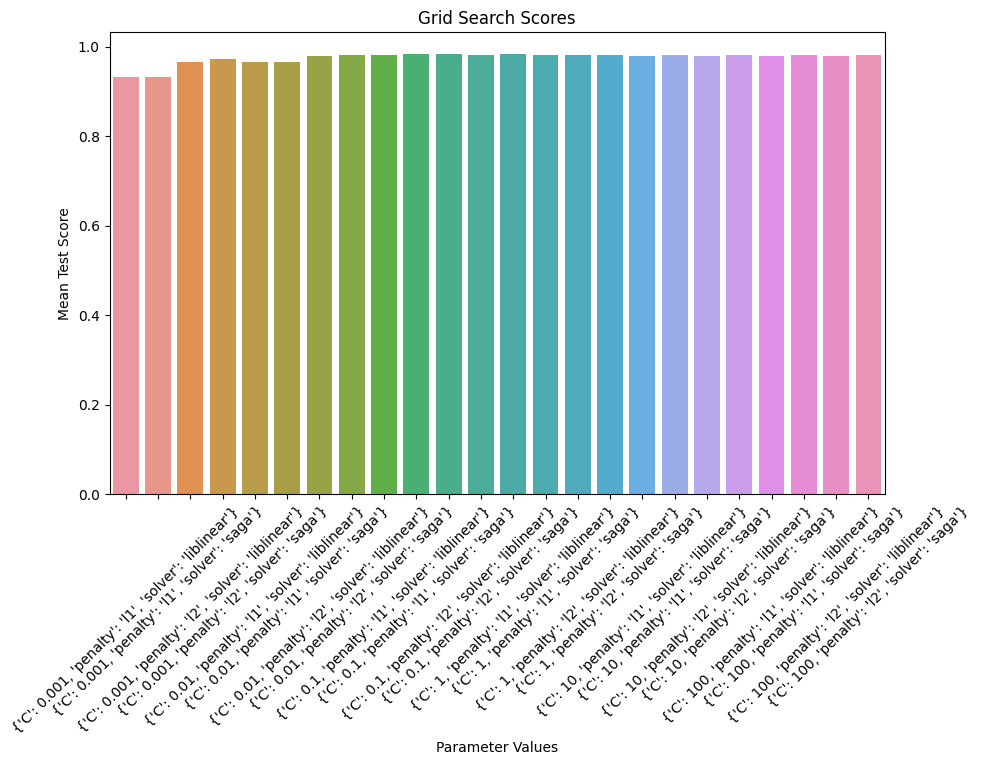

In [269]:
# 3. 可视化网格搜索调参结果
# 绘制调参结果可视化
grid_scores = grid_search.cv_results_['mean_test_score']
param_values = [str(p) for p in grid_search.cv_results_['params']]
plt.figure(figsize=(10, 6))
sns.barplot(x=param_values, y=grid_scores)
plt.title('Grid Search Scores')
plt.xlabel('Parameter Values')
plt.ylabel('Mean Test Score')
plt.xticks(rotation=45)
plt.show()

4. 将网格搜索所得的{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}作为参数构建逻辑回归分类器。

In [270]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 4. 使用最优参数构建逻辑回归分类器并打印评估指标
lr = LogisticRegression(C=1, penalty='l2', solver='liblinear') # 创建逻辑回归分类器
lr.fit(X_train, y_train) # 在训练集上进行拟合
y_pred = lr.predict(X_test) # 在测试集上进行预测

print(classification_report(y_test, y_pred, zero_division=1)) # 打印评估指标
print("Accuracy:", accuracy_score(y_test, y_pred)) # 计算并打印accuracy
print("Precision:", precision_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印precision
print("Recall:", recall_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印recall
print("F1-score:", f1_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印F1-score

                       precision    recall  f1-score   support

benign breast disease       1.00      0.00      0.00        12
        breast cancer       0.95      0.99      0.97       273
           non-cancer       1.00      1.00      1.00       496
     prostate disease       1.00      1.00      1.00        22

             accuracy                           0.98       803
            macro avg       0.99      0.75      0.74       803
         weighted avg       0.98      0.98      0.97       803

Accuracy: 0.9800747198007472
Precision: 0.986711233729485
Recall: 0.7471604336523692
F1-score: 0.7418234767025089


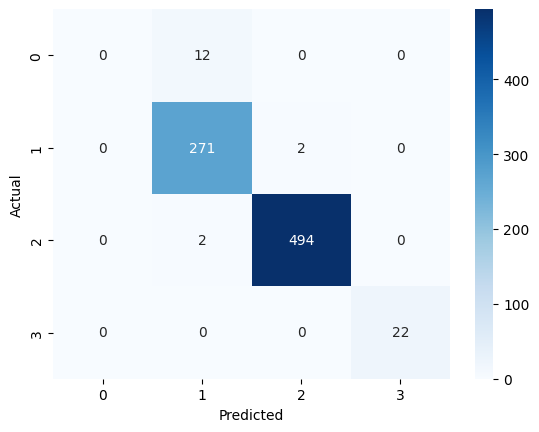

In [271]:
# 5. 绘制混淆矩阵热力图
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### 8.3 LDA降维处理后的GSE73002数据集

1. 提取数据集中的特征和标签，创建逻辑回归分类器

In [272]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# 1. 提取数据集中的特征和标签，创建逻辑回归分类器
X = data73002_lda
y = data73002['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter=10000) # 创建逻辑回归分类器

2. 调参
- 网格搜索

In [273]:
# 2. 使用网格搜索进行参数调优
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear', 'saga']}

grid_search = GridSearchCV(logreg, param_grid, cv=5) # 创建网格搜索对象
grid_search.fit(X_train, y_train) # 使用网格搜索对象对数据进行拟合

print("Best parameters:", grid_search.best_params_) # 打印最佳参数

Best parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}


3. 可视化网格搜索调参结果
- 分析结果可知：网格搜索得到的结果为：{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}

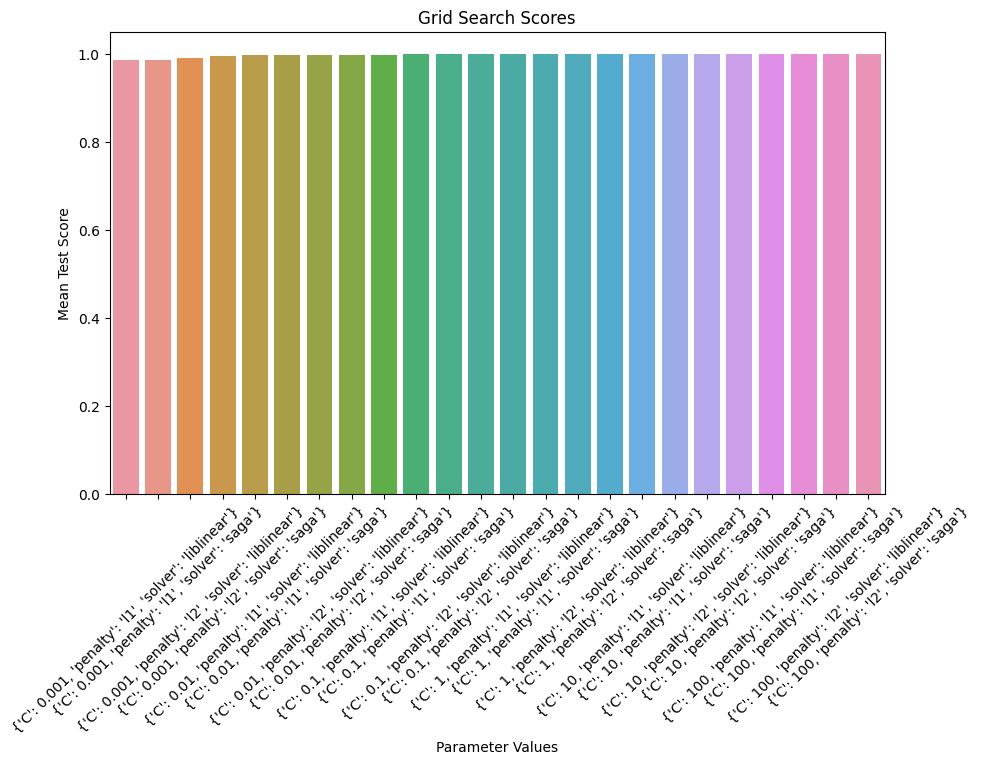

In [274]:
# 3. 可视化网格搜索调参结果
# 绘制调参结果可视化
grid_scores = grid_search.cv_results_['mean_test_score']
param_values = [str(p) for p in grid_search.cv_results_['params']]
plt.figure(figsize=(10, 6))
sns.barplot(x=param_values, y=grid_scores)
plt.title('Grid Search Scores')
plt.xlabel('Parameter Values')
plt.ylabel('Mean Test Score')
plt.xticks(rotation=45)
plt.show()

4. 将网格搜索所得的{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}作为参数构建逻辑回归分类器。

In [275]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 4. 使用最优参数构建逻辑回归分类器并打印评估指标
lr = LogisticRegression(C=0.1, penalty='l1', solver='saga') # 创建逻辑回归分类器
lr.fit(X_train, y_train) # 在训练集上进行拟合
y_pred = lr.predict(X_test) # 在测试集上进行预测

print(classification_report(y_test, y_pred, zero_division=1)) # 打印评估指标
print("Accuracy:", accuracy_score(y_test, y_pred)) # 计算并打印accuracy
print("Precision:", precision_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印precision
print("Recall:", recall_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印recall
print("F1-score:", f1_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印F1-score

                       precision    recall  f1-score   support

benign breast disease       1.00      1.00      1.00        12
        breast cancer       1.00      1.00      1.00       273
           non-cancer       1.00      1.00      1.00       496
     prostate disease       1.00      1.00      1.00        22

             accuracy                           1.00       803
            macro avg       1.00      1.00      1.00       803
         weighted avg       1.00      1.00      1.00       803

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


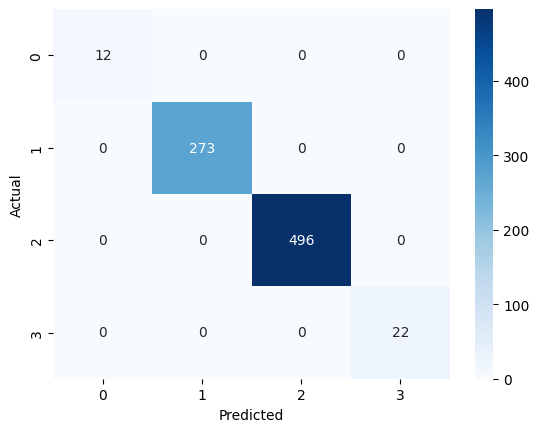

In [276]:
# 5. 绘制混淆矩阵热力图
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### 8.4 PCA降维处理后的GSE137140数据集

1. 提取数据集中的特征和标签，创建逻辑回归分类器

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# 1. 提取数据集中的特征和标签，创建逻辑回归分类器
X = data137140_pca
y = data137140['disease state']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter=10000) # 创建逻辑回归分类器

2. 调参
- 网格搜索

In [71]:
# 2. 使用网格搜索进行参数调优
param_grid = {'C': [0.1, 1, 10],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear', 'saga']}

grid_search = GridSearchCV(logreg, param_grid, cv=5) # 创建网格搜索对象
grid_search.fit(X_train, y_train) # 使用网格搜索对象对数据进行拟合

print("Best parameters:", grid_search.best_params_) # 打印最佳参数

Best parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


3. 可视化网格搜索调参结果
- 分析结果可知：网格搜索得到的结果为：{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

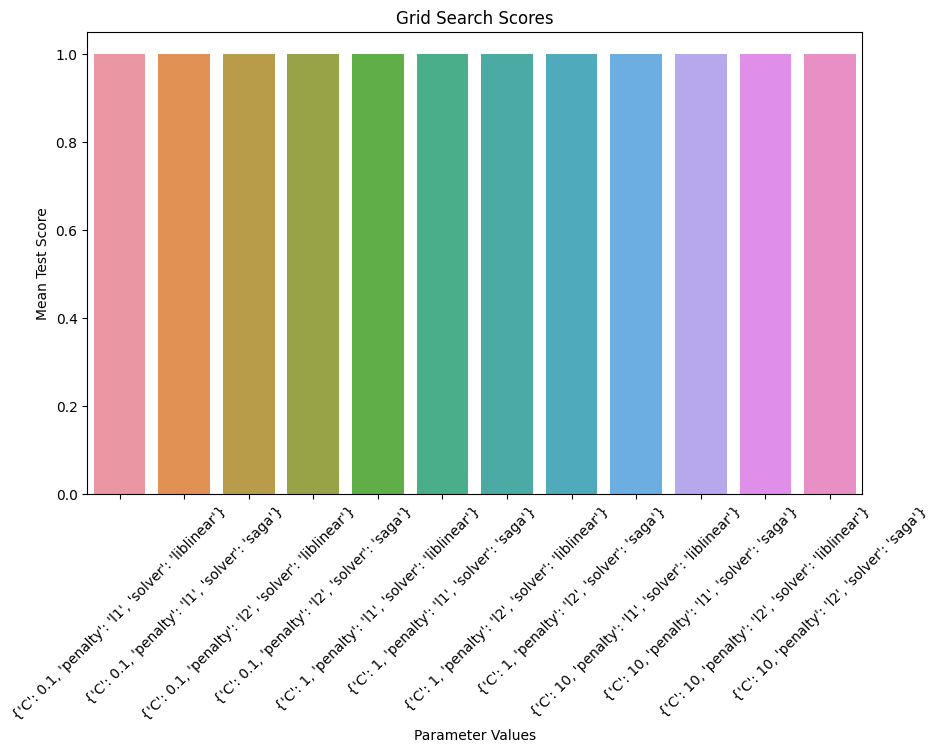

In [72]:
# 3. 可视化网格搜索调参结果
# 绘制调参结果可视化
grid_scores = grid_search.cv_results_['mean_test_score']
param_values = [str(p) for p in grid_search.cv_results_['params']]
plt.figure(figsize=(10, 6))
sns.barplot(x=param_values, y=grid_scores)
plt.title('Grid Search Scores')
plt.xlabel('Parameter Values')
plt.ylabel('Mean Test Score')
plt.xticks(rotation=45)
plt.show()

4. 将网格搜索所得的{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}作为参数构建逻辑回归分类器。

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 4. 使用最优参数构建逻辑回归分类器并打印评估指标
lr = LogisticRegression(C=0.1, penalty='l1', solver='liblinear') # 创建逻辑回归分类器
lr.fit(X_train, y_train) # 在训练集上进行拟合
y_pred = lr.predict(X_test) # 在测试集上进行预测

print(classification_report(y_test, y_pred, zero_division=1)) # 打印评估指标
print("Accuracy:", accuracy_score(y_test, y_pred)) # 计算并打印accuracy
print("Precision:", precision_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印precision
print("Recall:", recall_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印recall
print("F1-score:", f1_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印F1-score

                             precision    recall  f1-score   support

Lung cancer, post-operation       1.00      1.00      1.00        38
 Lung cancer, pre-operation       1.00      1.00      1.00       315
         Non-cancer control       1.00      1.00      1.00       432

                   accuracy                           1.00       785
                  macro avg       1.00      1.00      1.00       785
               weighted avg       1.00      1.00      1.00       785

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


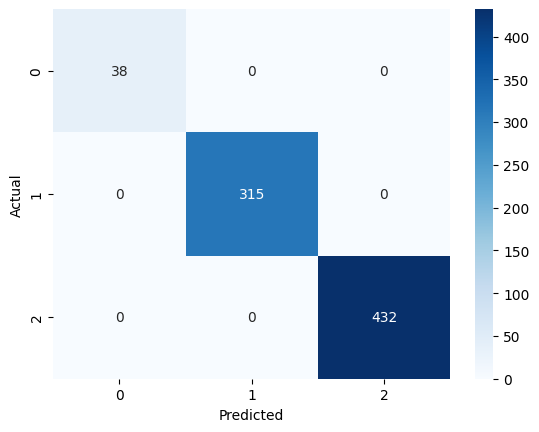

In [74]:
# 5. 绘制混淆矩阵热力图
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### 8.5 LDA降维处理后的GSE137140数据集

1. 提取数据集中的特征和标签，创建逻辑回归分类器

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# 1. 提取数据集中的特征和标签，创建逻辑回归分类器
X = data137140_lda
y = data137140['disease state']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter=10000) # 创建逻辑回归分类器

2. 调参
- 网格搜索

In [76]:
# 2. 使用网格搜索进行参数调优
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear', 'saga']}

grid_search = GridSearchCV(logreg, param_grid, cv=5) # 创建网格搜索对象
grid_search.fit(X_train, y_train) # 使用网格搜索对象对数据进行拟合


print("Best parameters:", grid_search.best_params_) # 打印最佳参数

Best parameters: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}


3. 可视化网格搜索调参结果
- 分析结果可知：网格搜索得到的结果为：{'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}

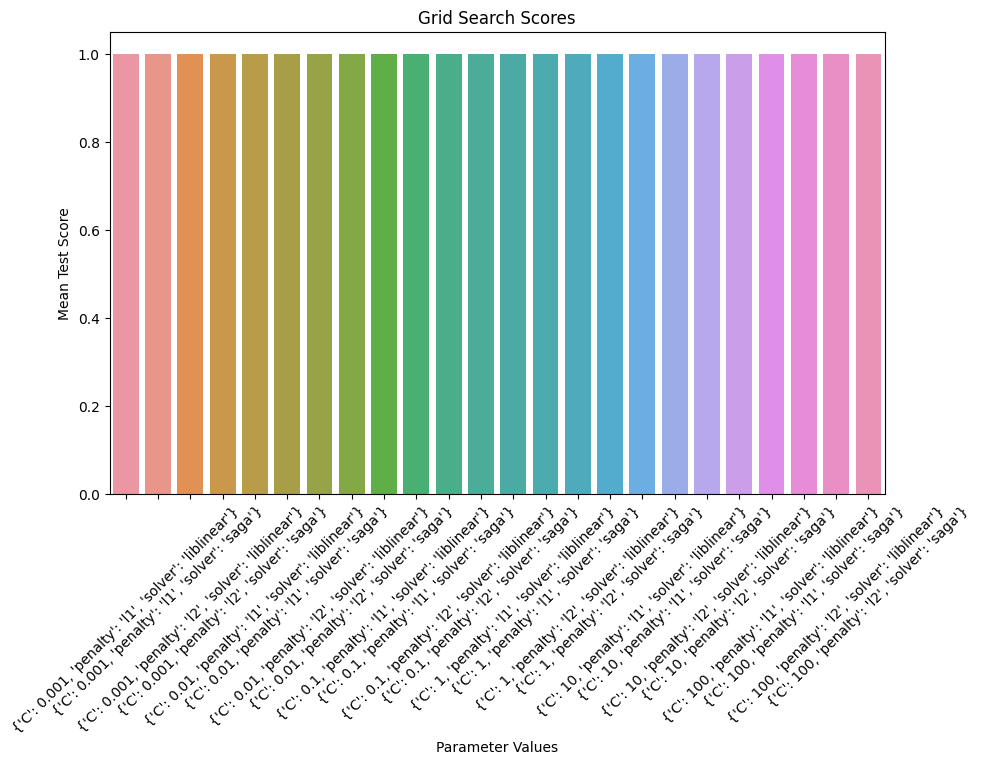

In [77]:
# 3. 可视化网格搜索调参结果
import seaborn as sns
# 绘制调参结果可视化
grid_scores = grid_search.cv_results_['mean_test_score']
param_values = [str(p) for p in grid_search.cv_results_['params']]
plt.figure(figsize=(10, 6))
sns.barplot(x=param_values, y=grid_scores)
plt.title('Grid Search Scores')
plt.xlabel('Parameter Values')
plt.ylabel('Mean Test Score')
plt.xticks(rotation=45)
plt.show()

4. 将网格搜索所得的{'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}作为参数构建逻辑回归分类器。

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

# 4. 使用最优参数构建逻辑回归分类器并打印评估指标
lr = LogisticRegression(C=0.001, penalty='l1', solver='liblinear') # 创建逻辑回归分类器
lr.fit(X_train, y_train) # 在训练集上进行拟合
y_pred = lr.predict(X_test) # 在测试集上进行预测

print(classification_report(y_test, y_pred, zero_division=1)) # 打印评估指标
print("Accuracy:", accuracy_score(y_test, y_pred)) # 计算并打印accuracy
print("Precision:", precision_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印precision
print("Recall:", recall_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印recall
print("F1-score:", f1_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印F1-score

                             precision    recall  f1-score   support

Lung cancer, post-operation       1.00      1.00      1.00        38
 Lung cancer, pre-operation       1.00      1.00      1.00       315
         Non-cancer control       1.00      1.00      1.00       432

                   accuracy                           1.00       785
                  macro avg       1.00      1.00      1.00       785
               weighted avg       1.00      1.00      1.00       785

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


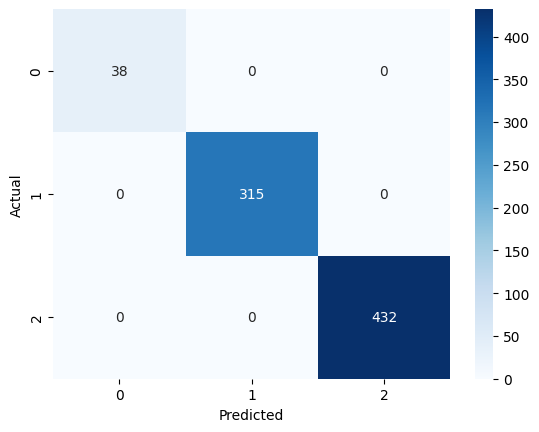

In [79]:
# 5. 绘制混淆矩阵热力图
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### 8.6 逻辑回归算法总结
- 在迭代过程中，容易存在模型的参数（coef_）没有收敛的情况，即模型无法找到使目标函数收敛的最优参数。这可能是由于多种原因造成的，如学习率过大或过小、数据特征之间存在较大的共线性、数据中存在异常值等。
为了解决这个问题，上文中增加了max_iter的值为1000（默认情况下，逻辑回归模型的max_iter参数设置为100），让模型有更多的迭代次数来尝试收敛。


简单快速：逻辑回归算法计算简单且速度较快，适用于大规模数据集。
解释性强：逻辑回归模型的参数具有一定的解释性，可以了解各个特征对分类结果的影响程度。
可以处理线性可分和线性不可分问题：逻辑回归可以处理线性可分问题，同时通过引入非线性特征工程可以应对部分线性不可分问题。
可以处理多类分类问题：逻辑回归可以通过拓展为多类别问题进行多类分类。
容易受到特征相关性的影响：逻辑回归假设特征之间是线性独立的，当特征之间存在相关性时，模型可能受到影响。
对异常值敏感：逻辑回归对异常值敏感，异常值的存在可能会对模型的性能产生不良影响。
需要注意的是，逻辑回归是一个线性分类模型，对于非线性问题的分类可能效果较差。在面对非线性问题时，可以考虑使用其他更复杂的分类算法或者使用逻辑回归与非线性特征工程的结合。

## 九、随机森林分类算法
### 9.1 随机森林算法基础
- 概念：随机森林是一种集成学习方法，通过构建多个决策树并集成它们的预测结果来进行分类。每个决策树是通过对训练数据的随机采样和特征的随机选择进行构建的。最终的分类结果由所有决策树的投票或平均预测得到。

- 原理:
    - 随机采样：从训练集中随机选择一定数量的样本（有放回地抽样），构成每棵决策树的训练集。这样可以通过引入随机性来增加模型的多样性。
    - 随机选择特征：对于每棵决策树的每个节点，在节点的特征集中随机选择一部分特征进行评估，并选择最佳的特征用于节点的划分。
    - 基于决策树的集成：构建多棵决策树，并通过投票或平均预测结果来得到最终的分类结果。

- 步骤:
    - 数据准备：将数据集分为训练集和测试集。
    - 随机森林构建：
        - 对于每棵决策树：
            - 随机采样训练集数据。
            - 随机选择特征子集。
            - 构建决策树，直到满足停止条件（如达到最大深度、节点中的样本数小于阈值等）。
    - 预测：
        - 对于每个测试样本，通过每棵决策树进行分类预测。
        - 根据投票或平均预测结果，确定最终的分类结果。

### 9.2 PCA降维处理后的GSE73002数据集

1. 提取数据集中的特征和标签，创建随机森林分类器

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 提取数据集中的特征和标签，创建随机森林分类器
X = data73002_pca
y = data73002['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建随机森林分类器
rf = RandomForestClassifier()

2. 调参
- 网格搜索

In [51]:
# 2. 使用网格搜索进行参数调优
# 设置参数网格
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(rf, param_grid, cv=5) # 创建网格搜索对象
grid_search.fit(X_train, y_train) # 使用网格搜索对象对数据进行拟合
print("Best parameters:", grid_search.best_params_) # 打印最佳参数

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


3. 可视化网格搜索调参结果
- 分析结果可知：网格搜索得到的结果为：{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

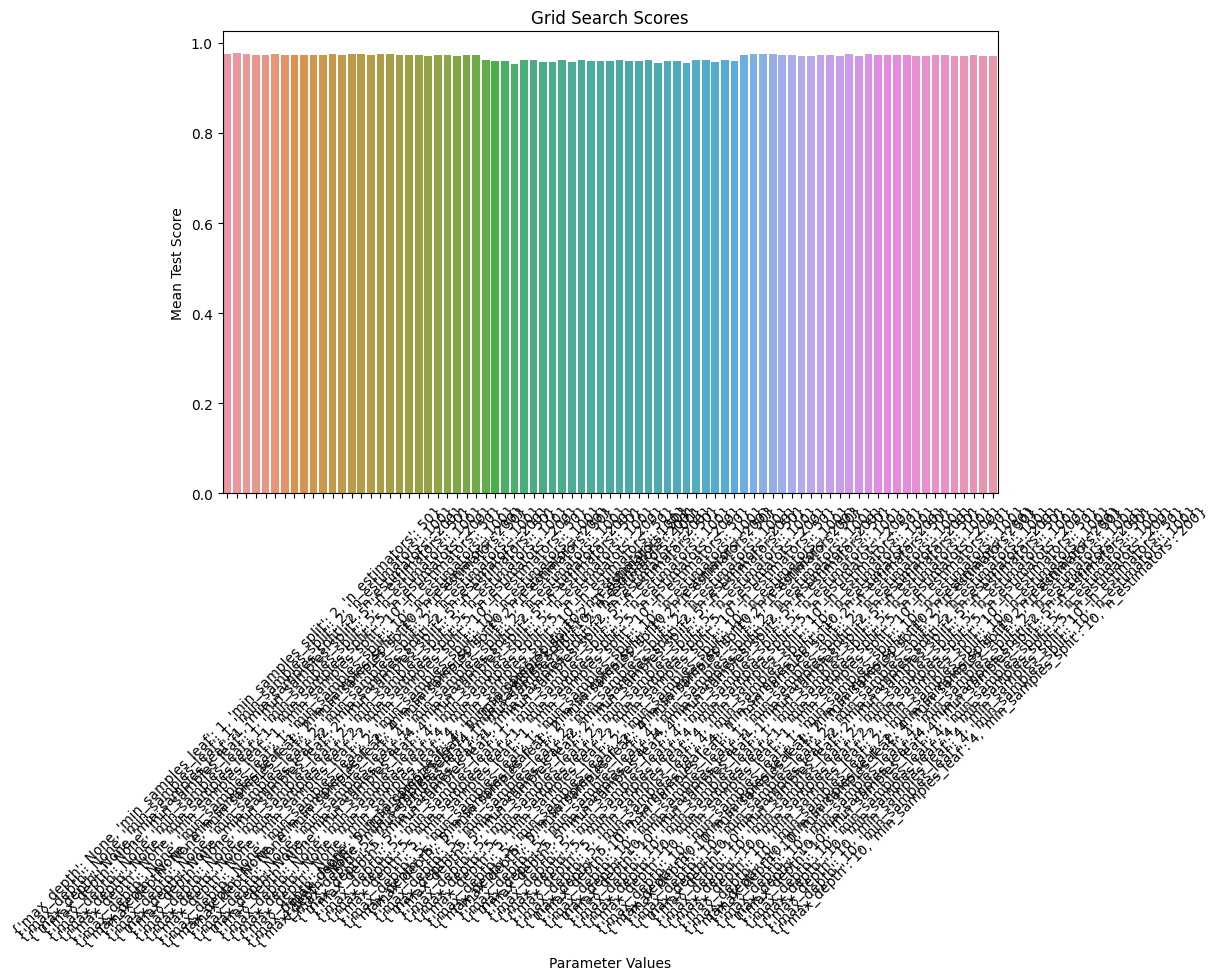

In [52]:
# 3. 可视化网格搜索调参结果
best_rf = grid_search.best_estimator_ # 获取最佳模型
y_pred = best_rf.predict(X_test) # 使用最佳模型对测试集进行预测

grid_scores = grid_search.cv_results_['mean_test_score'] # 获取平均准确率
param_values = [str(p) for p in grid_search.cv_results_['params']] # 获取参数
# 可视化调参结果
plt.figure(figsize=(10, 6))
sns.barplot(x=param_values, y=grid_scores)
plt.title('Grid Search Scores')
plt.xlabel('Parameter Values')
plt.ylabel('Mean Test Score')
plt.xticks(rotation=45)
plt.show()

4. 将网格搜索所得的{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}作为参数构建随机森林分类器

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 4. 使用最优参数构建随机森林分类器并打印评估指标
rf = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100) # 创建随机森林分类器

rf.fit(X_train, y_train) # 在训练集上进行拟合
y_pred = rf.predict(X_test) # 在测试集上进行预测

print(classification_report(y_test, y_pred, zero_division=1)) # 打印评估指标
print("Accuracy:", accuracy_score(y_test, y_pred)) # 计算并打印accuracy
print("Precision:", precision_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印precision
print("Recall:", recall_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印recall
print("F1-score:", f1_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印F1-score

                       precision    recall  f1-score   support

benign breast disease       1.00      0.00      0.00        12
        breast cancer       0.94      0.97      0.96       273
           non-cancer       0.98      0.99      0.99       496
     prostate disease       1.00      1.00      1.00        22

             accuracy                           0.97       803
            macro avg       0.98      0.74      0.74       803
         weighted avg       0.97      0.97      0.96       803

Accuracy: 0.9701120797011208
Precision: 0.9817651245551602
Recall: 0.7406578636417346
F1-score: 0.7361576268974817


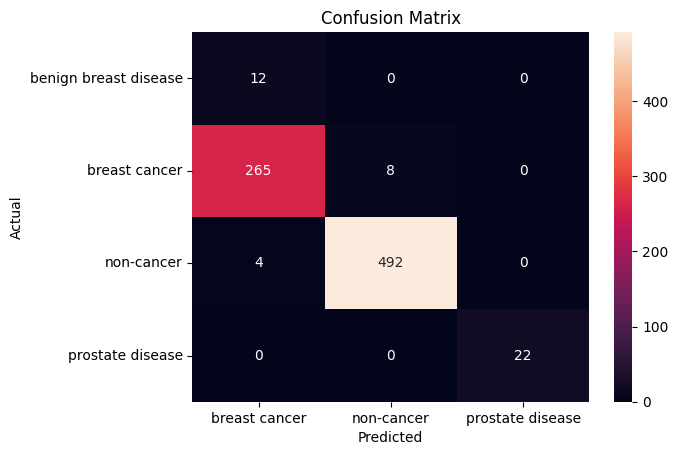

In [54]:
# 5. 绘制混淆矩阵热力图
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

### 9.3 LDA降维处理后的GSE73002数据集

1. 提取数据集中的特征和标签，创建随机森林分类器

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 提取数据集中的特征和标签，创建随机森林分类器
X = data73002_lda
y = data73002['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建随机森林分类器
rf = RandomForestClassifier()

2. 调参
- 网格搜索

In [56]:
# 2. 使用网格搜索进行参数调优
# 设置参数网格
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(rf, param_grid, cv=5) # 创建网格搜索对象
grid_search.fit(X_train, y_train) # 使用网格搜索对象对数据进行拟合
print("Best parameters:", grid_search.best_params_) # 打印最佳参数

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


3. 可视化网格搜索调参结果
- 分析结果可知：网格搜索得到的结果为：{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

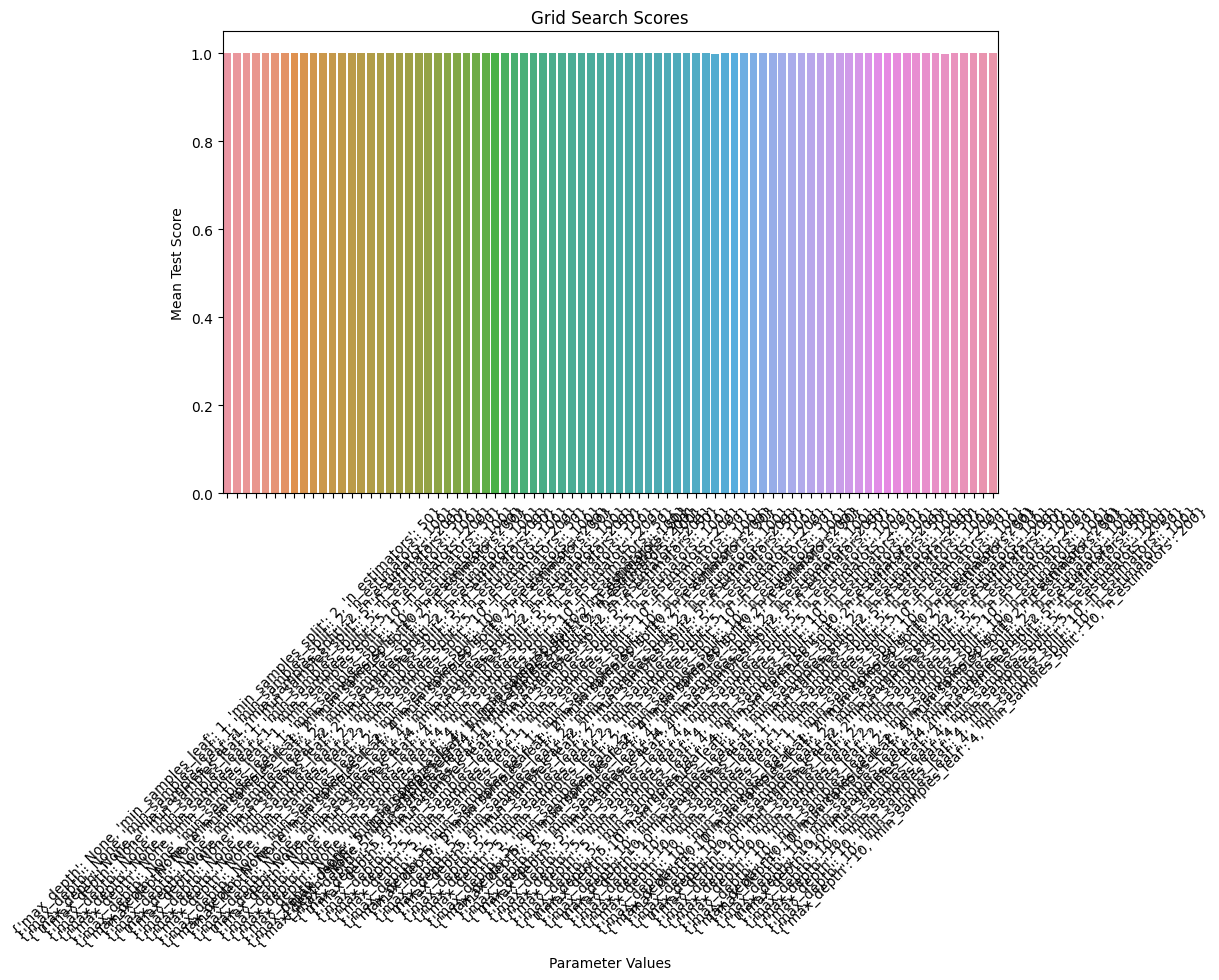

In [57]:
# 3. 可视化网格搜索调参结果
best_rf = grid_search.best_estimator_ # 获取最佳模型
y_pred = best_rf.predict(X_test) # 使用最佳模型对测试集进行预测

grid_scores = grid_search.cv_results_['mean_test_score'] # 获取平均准确率
param_values = [str(p) for p in grid_search.cv_results_['params']] # 获取参数
# 可视化调参结果
plt.figure(figsize=(10, 6))
sns.barplot(x=param_values, y=grid_scores)
plt.title('Grid Search Scores')
plt.xlabel('Parameter Values')
plt.ylabel('Mean Test Score')
plt.xticks(rotation=45)
plt.show()

4. 将网格搜索所得的{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}作为参数构建随机森林分类器

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 4. 使用最优参数构建随机森林分类器并打印评估指标
rf = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50) # 创建随机森林分类器

rf.fit(X_train, y_train) # 在训练集上进行拟合
y_pred = rf.predict(X_test) # 在测试集上进行预测

print(classification_report(y_test, y_pred, zero_division=1)) # 打印评估指标
print("Accuracy:", accuracy_score(y_test, y_pred)) # 计算并打印accuracy
print("Precision:", precision_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印precision
print("Recall:", recall_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印recall
print("F1-score:", f1_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印F1-score

                       precision    recall  f1-score   support

benign breast disease       1.00      1.00      1.00        12
        breast cancer       1.00      1.00      1.00       273
           non-cancer       1.00      1.00      1.00       496
     prostate disease       1.00      1.00      1.00        22

             accuracy                           1.00       803
            macro avg       1.00      1.00      1.00       803
         weighted avg       1.00      1.00      1.00       803

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


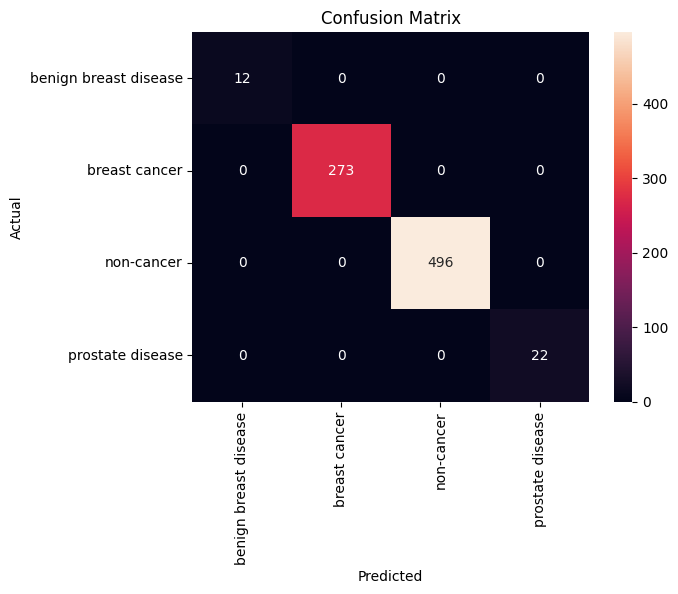

In [59]:
# 5. 绘制混淆矩阵热力图
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

### 9.4 PCA降维处理后的GSE137140数据集

1. 提取数据集中的特征和标签，创建随机森林分类器

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 提取数据集中的特征和标签，创建随机森林分类器
X = data137140_pca
y = data137140['disease state']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建随机森林分类器
rf = RandomForestClassifier()

2. 调参
- 网格搜索

In [61]:
# 2. 使用网格搜索进行参数调优
# 设置参数网格
param_grid = {
    'n_estimators': [50, 100, 200],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(rf, param_grid, cv=5) # 创建网格搜索对象
grid_search.fit(X_train, y_train) # 使用网格搜索对象对数据进行拟合
print("Best parameters:", grid_search.best_params_) # 打印最佳参数

Best parameters: {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


3. 可视化网格搜索调参结果
- 分析结果可知：网格搜索得到的结果为：{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

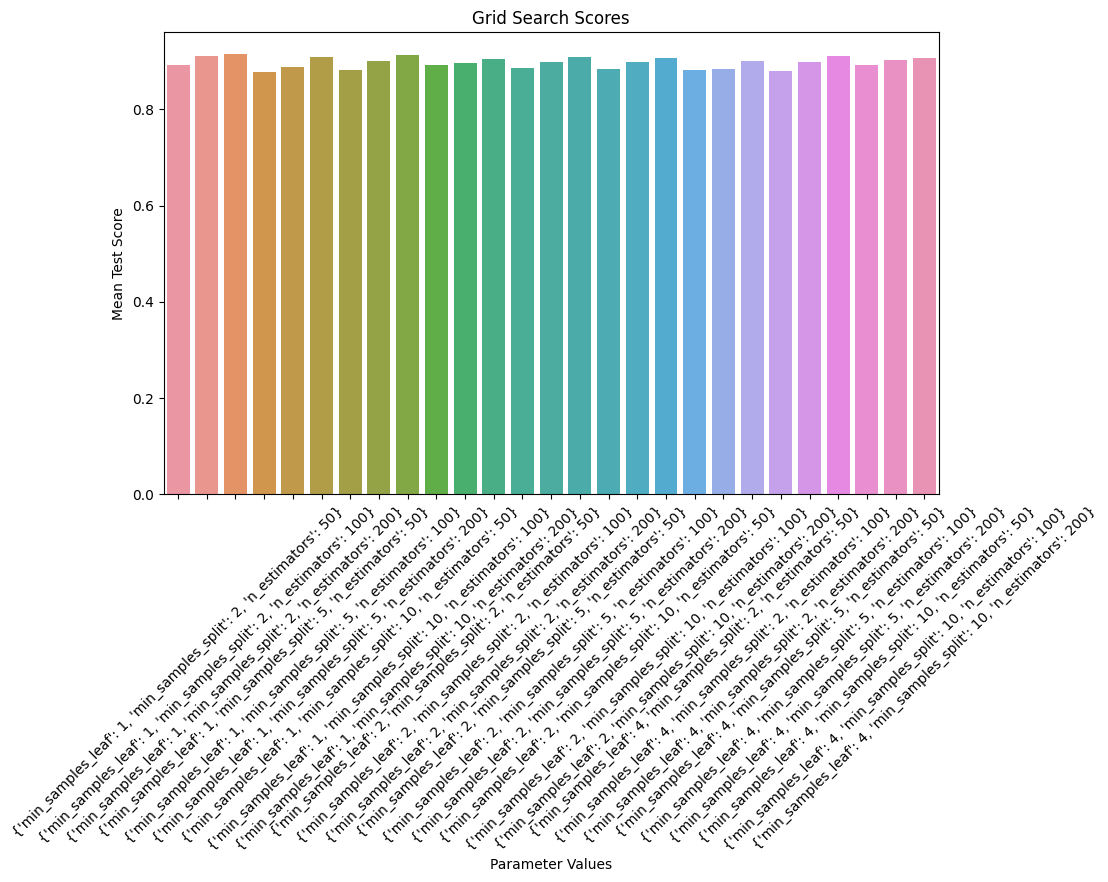

In [62]:
# 3. 可视化网格搜索调参结果
best_rf = grid_search.best_estimator_ # 获取最佳模型
y_pred = best_rf.predict(X_test) # 使用最佳模型对测试集进行预测

grid_scores = grid_search.cv_results_['mean_test_score'] # 获取平均准确率
param_values = [str(p) for p in grid_search.cv_results_['params']] # 获取参数
# 可视化调参结果
plt.figure(figsize=(10, 6))
sns.barplot(x=param_values, y=grid_scores)
plt.title('Grid Search Scores')
plt.xlabel('Parameter Values')
plt.ylabel('Mean Test Score')
plt.xticks(rotation=45)
plt.show()

4. 将网格搜索所得的{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}作为参数构建随机森林分类器

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 4. 使用最优参数构建随机森林分类器并打印评估指标
rf = RandomForestClassifier(min_samples_leaf=1, min_samples_split=2, n_estimators=200) # 创建随机森林分类器

rf.fit(X_train, y_train) # 在训练集上进行拟合
y_pred = rf.predict(X_test) # 在测试集上进行预测

print(classification_report(y_test, y_pred, zero_division=1)) # 打印评估指标
print("Accuracy:", accuracy_score(y_test, y_pred)) # 计算并打印accuracy
print("Precision:", precision_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印precision
print("Recall:", recall_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印recall
print("F1-score:", f1_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印F1-score

                             precision    recall  f1-score   support

Lung cancer, post-operation       1.00      0.95      0.97        38
 Lung cancer, pre-operation       0.96      0.84      0.90       315
         Non-cancer control       0.89      0.98      0.93       432

                   accuracy                           0.92       785
                  macro avg       0.95      0.92      0.93       785
               weighted avg       0.93      0.92      0.92       785

Accuracy: 0.9210191082802548
Precision: 0.9513105740953843
Recall: 0.9218300380581083
F1-score: 0.934281795545686


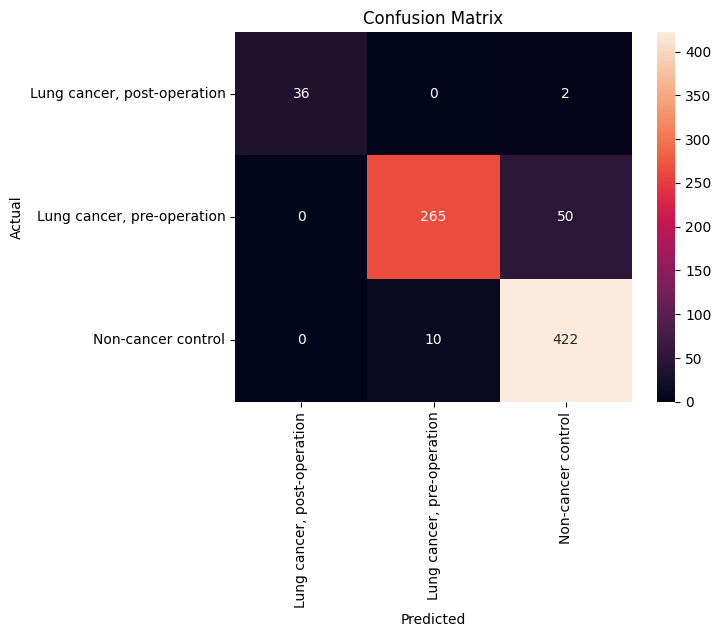

In [64]:
# 5. 绘制混淆矩阵热力图
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

### 9.5 LDA降维处理后的GSE137140数据集

1. 提取数据集中的特征和标签，创建随机森林分类器

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 提取数据集中的特征和标签，创建随机森林分类器
X = data137140_lda
y = data137140['disease state']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建随机森林分类器
rf = RandomForestClassifier()

2. 调参
- 网格搜索

In [66]:
# 2. 使用网格搜索进行参数调优
# 设置参数网格
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(rf, param_grid, cv=5) # 创建网格搜索对象
grid_search.fit(X_train, y_train) # 使用网格搜索对象对数据进行拟合
print("Best parameters:", grid_search.best_params_) # 打印最佳参数

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


3. 可视化网格搜索调参结果
- 分析结果可知：网格搜索得到的结果为：{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

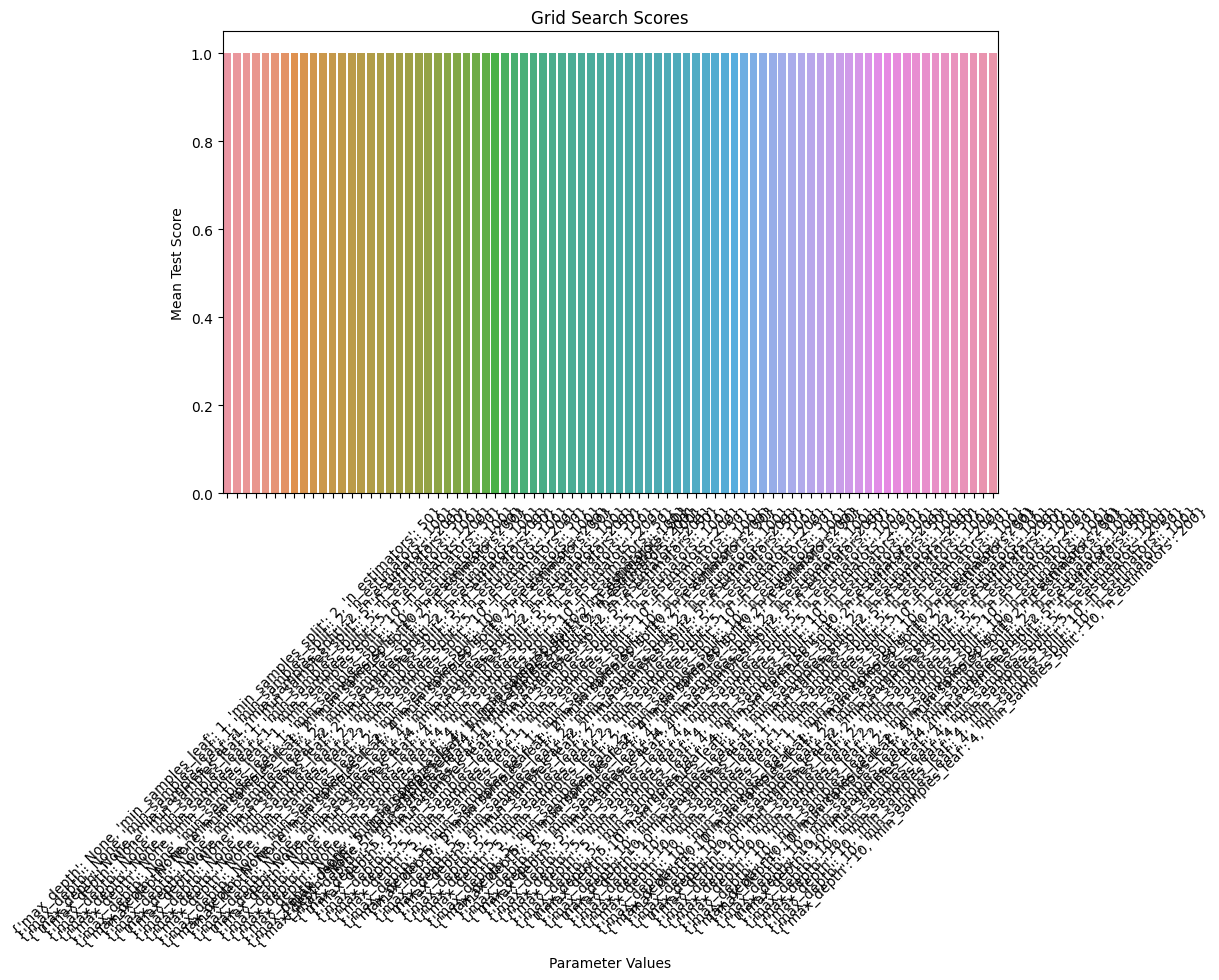

In [67]:
# 3. 可视化网格搜索调参结果
best_rf = grid_search.best_estimator_ # 获取最佳模型
y_pred = best_rf.predict(X_test) # 使用最佳模型对测试集进行预测

grid_scores = grid_search.cv_results_['mean_test_score'] # 获取平均准确率
param_values = [str(p) for p in grid_search.cv_results_['params']] # 获取参数
# 可视化调参结果
plt.figure(figsize=(10, 6))
sns.barplot(x=param_values, y=grid_scores)
plt.title('Grid Search Scores')
plt.xlabel('Parameter Values')
plt.ylabel('Mean Test Score')
plt.xticks(rotation=45)
plt.show()

4. 将网格搜索所得的{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}作为参数构建随机森林分类器

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 4. 使用最优参数构建随机森林分类器并打印评估指标
rf = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50) # 创建随机森林分类器

rf.fit(X_train, y_train) # 在训练集上进行拟合
y_pred = rf.predict(X_test) # 在测试集上进行预测

print(classification_report(y_test, y_pred, zero_division=1)) # 打印评估指标
print("Accuracy:", accuracy_score(y_test, y_pred)) # 计算并打印accuracy
print("Precision:", precision_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印precision
print("Recall:", recall_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印recall
print("F1-score:", f1_score(y_test, y_pred, average='macro', zero_division=1)) # 计算并打印F1-score

                             precision    recall  f1-score   support

Lung cancer, post-operation       1.00      1.00      1.00        38
 Lung cancer, pre-operation       1.00      1.00      1.00       315
         Non-cancer control       1.00      1.00      1.00       432

                   accuracy                           1.00       785
                  macro avg       1.00      1.00      1.00       785
               weighted avg       1.00      1.00      1.00       785

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


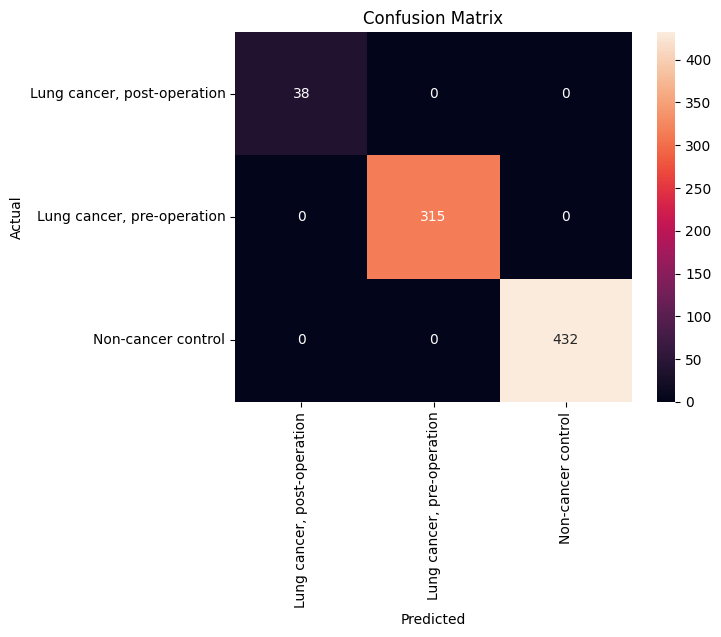

In [69]:
# 5. 绘制混淆矩阵热力图
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

### 9.6 随机森林算法总结
随机性：随机森林引入了随机性，通过对数据和特征的随机采样，增加模型的多样性，减少过拟合的风险。
高准确性：随机森林由多棵决策树组成，通过投票或平均预测结果来获得最终分类结果，因此具有较高的准确性。
可解释性：随机森林可以提供特征的重要性排序，用于解释模型的决策过程。
能处理大规模数据：随机森林能够有效处理大规模数据集，具有较高的计算效率。
能处理高维特征：随机森林能够处理高维特征空间，并且对特征的重要性有一定的评估。
鲁棒性：随机森林对于噪声数据和缺失数据有较好的鲁棒性，不易受异常值的影响。

## 十、分类算法对比

### 10.1 PCA降维处理后的GSE73002数据集

KNN在准确率和F1 Score方面表现较好，但精确率和召回率较低。SVM在准确率方面表现较好，但精确率和召回率相对较低。Decision Tree和Random Forest在准确率和召回率方面表现较好，但精确率较低。Naive Bayes在所有评估指标中表现相对较低。Logistic Regression在精确率、召回率和F1 Score方面表现较好。综合考虑各个指标，可以选择Logistic Regression、Decision Tree或Random Forest作为最佳算法。

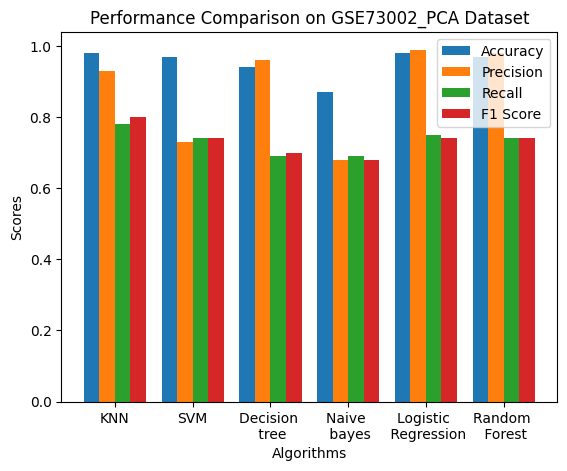

In [90]:
import matplotlib.pyplot as plt
import numpy as np

# 分类算法的名称
labels = ['KNN', 'SVM', 'Decision \n tree', 'Naive \n bayes', 'Logistic \n Regression', 'Random \n Forest']
# 分类算法的评估指标结果
accuracy_1p = [0.98, 0.97, 0.94, 0.87, 0.98, 0.97]
precision_1p = [0.93, 0.73, 0.96, 0.68, 0.99, 0.98]
recall_1p = [0.78, 0.74, 0.69, 0.69, 0.75, 0.74]
f1_score_1p = [0.80, 0.74, 0.70, 0.68, 0.74, 0.74]

# 设置柱状图的宽度
bar_width = 0.2

# 设置x轴坐标位置
x = np.arange(len(labels))

# 绘制accuracy柱状图
plt.bar(x, accuracy_1p, width=bar_width, label='Accuracy')
# 绘制precision柱状图
plt.bar(x + bar_width, precision_1p, width=bar_width, label='Precision')
# 绘制recall柱状图
plt.bar(x + 2 * bar_width, recall_1p, width=bar_width, label='Recall')
# 绘制f1_score柱状图
plt.bar(x + 3 * bar_width, f1_score_1p, width=bar_width, label='F1 Score')

# 设置x轴标签和标题
plt.xlabel('Algorithms')
plt.ylabel('Scores')
plt.title('Performance Comparison on GSE73002_PCA Dataset')

# 设置x轴刻度标签
plt.xticks(x + 1.5 * bar_width, labels)

# 添加图例
plt.legend()

# 展示图形
plt.show()

### 10.2 PCA降维处理后的GSE137140数据集

SVM、Decision Tree和Random Forest算法在准确率、精确率、召回率和F1 Score上表现较好，具有较高的综合性能。Naive Bayes算法在大部分指标上表现一般，KNN算法在准确率和F1 Score上相对较低。Logistic Regression算法在各个评估指标上表现良好，但在召回率上略低于其他算法。根据这些数据分析结果，我们可以选择SVM、Decision Tree、Random Forest或Logistic Regression算法作为首选算法。

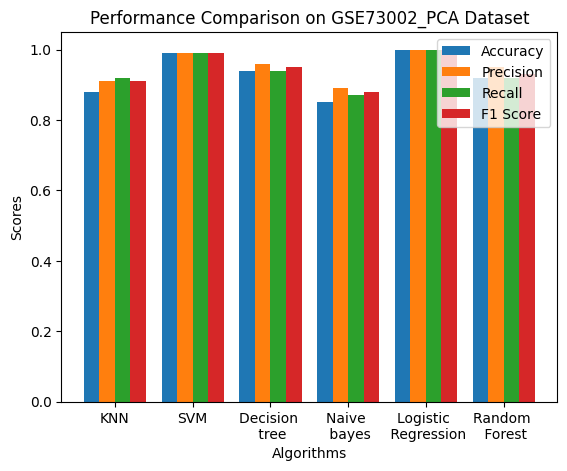

In [91]:
import matplotlib.pyplot as plt
import numpy as np

# 分类算法的名称
labels = ['KNN', 'SVM', 'Decision \n tree', 'Naive \n bayes', 'Logistic \n Regression', 'Random \n Forest']
# 分类算法的评估指标结果
accuracy_2p = [0.88, 0.99, 0.94, 0.85, 1, 0.92]
precision_2p = [0.91, 0.99, 0.96, 0.89,1, 0.95]
recall_2p = [0.92, 0.99, 0.94, 0.87, 1, 0.92]
f1_score_2p = [0.91, 0.99, 0.95, 0.88, 1, 0.93]

# 设置柱状图的宽度
bar_width = 0.2

# 设置x轴坐标位置
x = np.arange(len(labels))

# 绘制accuracy柱状图
plt.bar(x, accuracy_2p, width=bar_width, label='Accuracy')
# 绘制precision柱状图
plt.bar(x + bar_width, precision_2p, width=bar_width, label='Precision')
# 绘制recall柱状图
plt.bar(x + 2 * bar_width, recall_2p, width=bar_width, label='Recall')
# 绘制f1_score柱状图
plt.bar(x + 3 * bar_width, f1_score_2p, width=bar_width, label='F1 Score')

# 设置x轴标签和标题
plt.xlabel('Algorithms')
plt.ylabel('Scores')
plt.title('Performance Comparison on GSE137140_PCA Dataset')

# 设置x轴刻度标签
plt.xticks(x + 1.5 * bar_width, labels)

# 添加图例
plt.legend()

# 展示图形
plt.show()

### 10.3 LDA降维处理后的GSE73002数据集

LDA降维可能导致数据集的维度减少，丢失了部分信息，从而使分类算法在降维后的数据上表现得非常好。

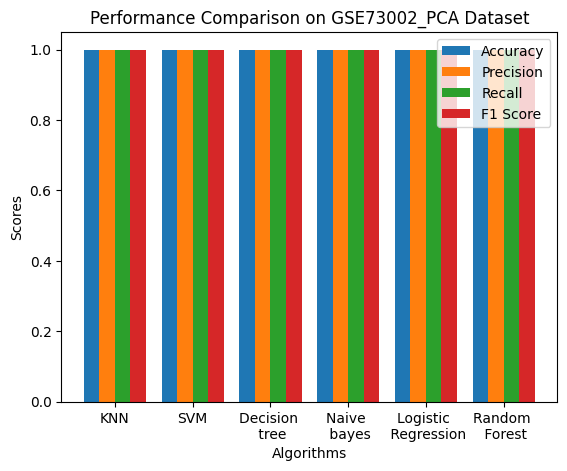

In [92]:
import matplotlib.pyplot as plt
import numpy as np

# 分类算法的名称
labels = ['KNN', 'SVM', 'Decision \n tree', 'Naive \n bayes', 'Logistic \n Regression', 'Random \n Forest']
# 分类算法的评估指标结果
accuracy_1l = [1, 1, 1, 1, 1, 1]
precision_1l = [1, 1, 1, 1, 1, 1]
recall_1l = [1, 1, 1, 1, 1, 1]
f1_score_1l = [1, 1, 1, 1, 1, 1]

# 设置柱状图的宽度
bar_width = 0.2

# 设置x轴坐标位置
x = np.arange(len(labels))

# 绘制accuracy柱状图
plt.bar(x, accuracy_1l, width=bar_width, label='Accuracy')
# 绘制precision柱状图
plt.bar(x + bar_width, precision_1l, width=bar_width, label='Precision')
# 绘制recall柱状图
plt.bar(x + 2 * bar_width, recall_1l, width=bar_width, label='Recall')
# 绘制f1_score柱状图
plt.bar(x + 3 * bar_width, f1_score_1l, width=bar_width, label='F1 Score')

# 设置x轴标签和标题
plt.xlabel('Algorithms')
plt.ylabel('Scores')
plt.title('Performance Comparison on GSE73002_LDA Dataset')

# 设置x轴刻度标签
plt.xticks(x + 1.5 * bar_width, labels)

# 添加图例
plt.legend()

# 展示图形
plt.show()

### 10.4 LDA降维处理后的GSE137140数据集

LDA降维可能导致数据集的维度减少，丢失了部分信息，从而使分类算法在降维后的数据上表现得非常好。

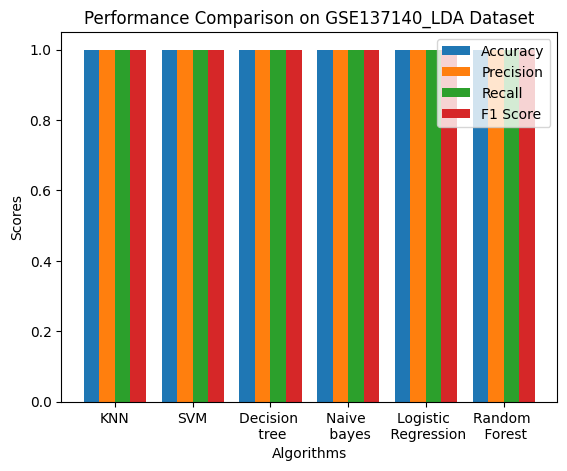

In [93]:
import matplotlib.pyplot as plt
import numpy as np

# 分类算法的名称
labels = ['KNN', 'SVM', 'Decision \n tree', 'Naive \n bayes', 'Logistic \n Regression', 'Random \n Forest']
# 分类算法的评估指标结果
accuracy_2l = [1, 1, 1, 1, 1, 1]
precision_2l = [1, 1, 1, 1, 1, 1]
recall_2l = [1, 1, 1, 1, 1, 1]
f1_score_2l = [1, 1, 1, 1, 1, 1]

# 设置柱状图的宽度
bar_width = 0.2

# 设置x轴坐标位置
x = np.arange(len(labels))

# 绘制accuracy柱状图
plt.bar(x, accuracy_2l, width=bar_width, label='Accuracy')
# 绘制precision柱状图
plt.bar(x + bar_width, precision_2l, width=bar_width, label='Precision')
# 绘制recall柱状图
plt.bar(x + 2 * bar_width, recall_2l, width=bar_width, label='Recall')
# 绘制f1_score柱状图
plt.bar(x + 3 * bar_width, f1_score_2l, width=bar_width, label='F1 Score')

# 设置x轴标签和标题
plt.xlabel('Algorithms')
plt.ylabel('Scores')
plt.title('Performance Comparison on GSE137140_LDA Dataset')

# 设置x轴刻度标签
plt.xticks(x + 1.5 * bar_width, labels)

# 添加图例
plt.legend()

# 展示图形
plt.show()